In [1]:
import pandas as pd
import xlrd
import gensim
import re

# 1. Organizing Data

In [3]:
life_app = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/life_app_store_reviews_687.xlsx')
simple_app = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/simple_app_store_reviews_781.xlsx')
bodyfast_app = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/bodyfast_app_store_reviews_615.xlsx')
dofasting_app = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/dofasting_app_store_reviews_12903.xlsx')
myfast_app = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/myfast_app_store_reviews_96.xlsx')
if_app_store_df = pd.concat([life_app, simple_app, bodyfast_app, dofasting_app, myfast_app])
if_app_store_df = if_app_store_df.reset_index(drop = True)
if_app_store_df['ratings'] = if_app_store_df["ratings"].str.replace(" out of 5", "")
if_app_store_df["dev_responses"] = if_app_store_df["dev_responses"].str.replace('</p>]', "")
if_app_store_df["dates"] = pd.to_datetime(if_app_store_df.dates)
if_app_store_df["source"] = "appstore"
if_app_store_df["ratings"] = if_app_store_df["ratings"].astype(int)

life_play = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/LifeFasting_ps_reviews.xlsx')
life_play['app_name'] = 'life'
simple_play = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/Simple_ps_reviews.xlsx')
simple_play['app_name'] = 'simple'
bodyfast_play = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/BodyFast_ps_reviews.xlsx')
bodyfast_play['app_name'] = 'bodyfast'
dofasting_play = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/DoFasting_ps_reviews.xlsx')
dofasting_play['app_name'] = 'dofasting'
myfast_play = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/Data/MyFast_ps_reviews.xlsx')
myfast_play['app_name'] = 'myfast'
if_playstore_df = pd.concat([life_play, simple_play, bodyfast_play, dofasting_play, myfast_play])
if_playstore_df = if_playstore_df.reset_index(drop = True)
if_playstore_df["dates"] = pd.to_datetime(if_playstore_df.dates)
if_playstore_df["source"] = "playstore"

In [5]:
if_playstore_df

,dates,reviews,ratings,app_name,source
0,2020-09-20,Bestest app for intermittent fasting,5,life,playstore
1,2020-09-20,This is a really useful app. I've enjoyed it....,4,life,playstore
2,2020-09-19,Great app! I gave it 3 stars because when ent...,3,life,playstore
3,2020-09-19,"It has network issues, hanging",3,life,playstore
4,2020-09-18,Horrible UI after the latest update. Still fu...,1,life,playstore
...,...,...,...,...,...
34881,2017-05-01,Needs a widget,4,myfast,playstore
34882,2017-04-30,Simple and effective. Seems to have difficult...,4,myfast,playstore
34883,2017-04-30,Simple and user friendly.,4,myfast,playstore
34884,2017-04-29,"Be awesome if it had a widget too, showing ti...",4,myfast,playstore


In [8]:
if_app_store_df["REVIEWS"] = if_app_store_df["titles"] + " "+ if_app_store_df["reviews"]

df = pd.DataFrame()
df["dates"] = if_app_store_df["dates"].to_list() + if_playstore_df["dates"].to_list()
df["reviews"] = if_app_store_df["REVIEWS"].to_list() + if_playstore_df["reviews"].to_list()
df["ratings"] = if_app_store_df["ratings"].to_list() + if_playstore_df["ratings"].to_list()
df["app_name"] = if_app_store_df["app_name"].to_list() + if_playstore_df["app_name"].to_list()
df["source"] = if_app_store_df["source"].to_list() + if_playstore_df["source"].to_list()

In [9]:
df

,dates,reviews,ratings,app_name,source
0,2019-04-03,Weight watchers and Fasting!!! I absolutely lo...,5,life,appstore
1,2019-01-16,"Pretty good, but could be awesome I just start...",4,life,appstore
2,2019-03-07,Basic Fast Tracking App Been fasting every day...,3,life,appstore
3,2020-07-18,Not For Me This is a nice basic app with some ...,3,life,appstore
4,2020-07-29,Great until Awful This app was wonderful for t...,3,life,appstore
...,...,...,...,...,...
49963,2017-05-01,Needs a widget,4,myfast,playstore
49964,2017-04-30,Simple and effective. Seems to have difficult...,4,myfast,playstore
49965,2017-04-30,Simple and user friendly.,4,myfast,playstore
49966,2017-04-29,"Be awesome if it had a widget too, showing ti...",4,myfast,playstore


In [10]:
df[df.reviews.str.len() < 50]

,dates,reviews,ratings,app_name,source
26,2020-09-15,Pretty good app This is a pretty good app.,4,life,appstore
153,2019-03-15,Great App Great App!,4,life,appstore
396,2020-05-07,User friendly Love how user friendly it is.,5,life,appstore
413,2019-04-03,Pretty helpful I like the articles!,4,life,appstore
452,2019-03-25,Easy and clear! Easy and clear!,5,life,appstore
...,...,...,...,...,...
49959,2017-05-09,Great accountability and stay on track tool,5,myfast,playstore
49962,2017-05-07,Great app,5,myfast,playstore
49963,2017-05-01,Needs a widget,4,myfast,playstore
49965,2017-04-30,Simple and user friendly.,4,myfast,playstore


In [ ]:
df.to_excel("IF_review_data.xlsx")

# 2. Topic Modeling

## (1) Data Cleaning

In [6]:
# import data
df = pd.read_excel('/Users/SeoyeonHong/Desktop/if_app_study/IF_review_data.xlsx')
df = df[df.reviews.str.len() > 50] # Dropping reviews that are too short for analysis
reviews = df.reviews.to_list()

In [7]:
len(reviews)

38083

In [4]:
# for unigram

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english')) + ['kg', 'dont', 'im', 'bp', 'hr', 'lb', 'ya', 'thanks', 'x', 'use', 'something', 'lot', 'please', 'bc', 'rn', 'app', 'life', 'bodyfast', 'dofasting', 'myfast', 've', 'doesn', 'didn', 'isn', 'don', 'io']

lemmatizer = WordNetLemmatizer()

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


input_words = []

for review in reviews:
    review = review.lower() # converting to lowercase
    review = re.sub(" \d+", " ", review) # removing numbers
    review = emoji_pattern.sub(r'', review) # removing emoji
    review = re.sub(r'[^\w\s]',' ',review) # removing punctuation
    tokenized = nltk.word_tokenize(review)
    stopwords_filtered = [word for word in tokenized if not word in stop_words] 
    nouns = [lemmatizer.lemmatize(word, "n") for (word, pos) in nltk.pos_tag(stopwords_filtered) if (pos[:2] == 'NN') and len(word) != 1] # removing "i" from list
    print(nouns)
    input_words.append(nouns)

['weight', 'watcher', 'review', 'anything', 'people', 'apps', 'weight', 'watcher', 'member', 'month', 'article', 'weight', 'watcher', 'track', 'part', 'graphic', 'burning', 'mode', 'body', 'facebook', 'group', 'member', 'google', 'information']
['week', 'track', 'fasting', 'time', 'time', 'watch', 'window', 'reason', 'others', 'show', 'body', 'thing', 'think']
['fast', 'day', 'year', 'year', 'become', 'see', 'others', 'goal', 'hour', 'health', 'feature', 'existent']
['fun', 'side', 'feature', 'hour', 'kind', 'track', 'track', 'hour', 'end', 'hour', 'begin', 'meal', 'day', 'eating', 'window']
['week', 'difference', 'journey', 'time', 'communication', 'stranger', 'people', 'kind', 'bullying', 'newcomer', 'circle', 'house', 'bunch', 'stuff', 'people', 'moment', 'moderator', 'creator', 'circle', 'etcetcetc', 'everything', 'notification', 'notification', 'communication', 'kind', 'anything', 'alone', 'pay', 'look']
['start', 'week', 'thing', 'track', 'fasting', 'time', 'clock', 'count', 'but

['tracker', 'fasting', 'apps', 'week', 'success', 'allows', 'edit', 'fast', 'interface', 'simple', 'link', 'fast', 'functionality']
['apple', 'watch', 'make', 'circle', 'support', 'love', 'tell', 'zone']
['accurate', 'schedule', 'article', 'blog', 'think', 'food', 'log', 'calorie', 'counter', 'calorie']
['suggestion', 'meet', 'tracker', 'feature', 'option', 'hour', 'time', 'see', 'road', 'glad']
['accountability', 'tool', 'others', 'window', 'alarm', 'alert', 'time', 'time', 'tool', 'people', 'fun']
['love', 'love', 'apple', 'watch', 'complication', 'notification', 'end', 'wish', 'watch']
['love', 'addition', 'thing', 'others', 'download', 'fasting', 'goal', 'love', 'thing']
['love', 'display', 'time', 'reaction', 'mood', 'choose', 'get', 'patch', 'someone', 'refers', 'time', 'idea', 'thing', 'help']
['thing', 'motion', 'watch', 'body', 'motivator', 'push', 'part', 'group', 'video', 'article']
['fix', 'allow', 'edit', 'start', 'finish', 'time']
['time', 'date', 'edit', 'instance', 'cha

['love', 'change', 'post']
['zero']
['stats', 'month', 'stats', 'look', 'week', 'month', 'year', 'learn', 'average', 'trend']
['design', 'usage', 'ability', 'friend', 'join']
['helpful', 'fast', 'feature']
['awesome', 'notification', 'people', 'status', 'update', 'people']
['perfect', 'apple', 'watch', 'progress']
['love', 'thing', 'circle', 'people']
['love', 'challenge', 'love', 'part', 'group']
['fun', 'friend', 'others', 'medium', 'create', 'join', 'group', 'drop', 'encouraging', 'word', 'cheer']
['apple', 'watch', 'thing', 'apple', 'watch']
['track', 'time', 'time', 'motivation']
['journey', 'fun', 'way', 'success', 'group', 'people', 'goal']
['look', 'work', 'team', 'schedule', 'post', 'team', 'feeling']
['intermittent', 'track', 'fasting', 'time', 'fasting', 'period']
[]
['resource', 'circumference', 'goal', 'ketone', 'tracker', 'show', 'data']
['adjustment', 'know', 'add', 'option', 'enter', 'weight', 'today']
['edit', 'date', 'time']
['clunky', 'edit', 'data', 'point', 'add', 

['enter', 'view', 'progress', 'effect', 'day']
['era', 'data', 'hour', 'try', 'version', 'trick', 'hour', 'data', 'pay']
['wheel', 'feature', 'wheel', 'feature', 'crowd', 'perfect']
['need', 'day', 'version', 'star', 'upgrade']
['advise', 'goal']
['month', 'log', 'connection', 'connection']
['enter', 'weight', 'number', 'helpful', 'info', 'enter', 'weight', 'round']
['coach', 'weight', 'excersize', 'goal']
['notification', 'setting', 'notification', 'fast', 'lot', 'notification', 'socializing', 'service']
['work', 'apple', 'watch', 'fast', 'apple', 'watch']
['track']
['apple']
['wish', 'star', 'apple', 'watch']
['wish', 'time', 'change', 'time', 'offer']
['time', 'time', 'fast']
['find']
['wish', 'apple', 'watch', 'statue']
['interface', 'track', 'information', 'stats']
['track', 'edit', 'time']
['structure', 'number', 'thank', 'love']
['kind', 'learn', 'fasting', 'love']
['thing', 'thing', 'track', 'window', 'eating', 'time']
['emojis', 'emojis', 'cycle', 'look']
['keep', 'need', 'ver

['password', 'log', 'day', 'password', 'track', 'eating']
['need', 'apple', 'watch', 'fix', 'star']
['hate', 'chart', 'chart', 'bar', 'chart', 'period']
['edit', 'fasting', 'time', 'end', 'update', 'pencil', 'edit', 'time']
['anorexic', 'people', 'people', 'water', 'month']
['share', 'fasting']
[]
['keep', 'fasting', 'hour']
['work', 'internet', 'terrible', 'work', 'buggy', 'heck', 'fix']
['love', 'stage', 'symbol', 'motivating']
['end', 'date', 'end', 'date', 'time', 'fast']
['glitchy', 'update', 'today', 'end', 'time']
['sign', 'everytime', 'form', 'anything', 'let', 'sign']
['help', 'planning', 'thank']
['apple', 'watch', 'apple', 'watch']
['accountability']
['account', 'warning', 'log']
['hour', 'fast', 'degree']
['confirmation', 'link', 'yes', 'folder']
['fasting', 'intermittent', 'fasting']
['motivator', 'track', 'fasting', 'hour']
['keep', 'star', 'fix']
['fasting', 'time', 'day']
['love', 'fasting', 'goal']
['friend', 'friend', 'see', 'lame']
['keep', 'error', 'message']
['moti

['advertising', 'minor', 'week', 'friend', 'advertisement', 'minor', 'apps', 'kind', 'minor', 'people', 'feel', 'pressure', 'insecure', 'body', 'habit', 'nutrition', 'need', 'development', 'disorder', 'people', 'time', 'addition', 'advertising', 'promotes', 'eating', 'disorder', 'age', 'cause', 'someone', 'relapse', 'habit', 'support', 'advertising', 'minor']
['day', 'enjoy', 'information', 'stage', 'body', 'logging', 'food', 'drink', 'experience', 'option', 'sync', 'apple', 'watch', 'step', 'hour', 'tracker', 'fasting', 'hour', 'day']
['version', 'day', 'weight', 'temptation', 'get', 'deal', 'track', 'progress', 'fasting', 'plan', 'day', 'pound', 'timing', 'afternoon', 'snack', 'schedule', 'love']
['simple', 'time', 'tool', 'track', 'type', 'food', 'motivates', 'choice', 'task', 'fun', 'way', 'everything', 'weight', 'food', 'drink', 'activity', 'feel', 'love']
['living', 'simple', 'interface', 'success', 'offer', 'weight', 'mood', 'snack', 'feature', 'fun', 'food', 'choice', 'living',

['master', 'water', 'meal', 'activity', 'super', 'convenient', 'habit', 'get', 'pay']
['body', 'try', 'reminds', 'goal', 'feel', 'feel']
['nothing', 'recommend', 'trial', 'offering', 'information', 'track', 'meal', 'track', 'food', 'vague', 'loss', 'apps', 'money']
['couple', 'year', 'experience', 'intermittent', 'everything', 'responsibility', 'time', 'task']
['time', 'sure', 'thing', 'health', 'fitbit', 'day', 'health', 'job']
['self', 'awareness', 'love', 'structure', 'timeline', 'fun', 'log', 'meal', 'tip', 'habit', 'week', 'reach', 'snack', 'place', 'emotion', 'v', 'hunger']
['pay', 'people', 'pay', 'time', 'frame', 'log', 'meal', 'track', 'update', 'week']
['inteface', 'improvement', 'option', 'example', 'coffee', 'almond', 'almond', 'option', 'pannel', 'calorie', 'food', 'intake', 'love', 'section', 'insight', 'fasting']
['love', 'update', 'icon', 'phone', 'hand', 'bottom']
['tracker', 'apps', 'feature', 'information', 'insight', 'tile', 'journal', 'get', 'edit', 'view', 'hour',

['need', 'edit', 'time', 'time', 'thing', 'correct', 'time']
['bug', 'fix', 'work', 'fix', 'bug', 'time', 'time', 'star']
['keep', 'keep', 'portion', 'food', 'calorie', 'count', 'tip', 'explanation', 'cycle', 'reminder', 'eat']
['love', 'ounce', 'option', 'juice', 'mix', 'water', 'thought', 'track', 'everything', 'eat']
['help', 'type', 'fitbit', 'keyboard', 'cut', 'get', 'letter', 'hope', 'weight']
['fasting', 'option', 'track', 'thing', 'feel', 'ketone', 'indication', 'success', 'fast']
['water', 'health', 'water', 'health', 'water', 'intake', 'share', 'data', 'health']
['food', 'option', 'food', 'option', 'option', 'one', 'youuuu']
['fasting', 'everything', 'health', 'meal', 'water', 'activity', 'weight']
['track', 'calorie', 'enter', 'meal', 'help', 'feature']
['nice', 'start', 'stop', 'time', 'edit', 'couple', 'fast', 'hour', 'show', 'hour']
['data', 'inability', 'edit', 'ask', 'hour', 'eat', 'way', 'data', 'ketosis', 'everyone', 'body', 'waste']
['pound', 'week', 'thing', 'add', 

['calculation', 'calculation', 'coffee', 'oz', 'try', 'calculation', 'program', 'production']
[]
['fitbit', 'integration', 'device', 'bit', 'bit', 'data', 'year', 'subscription', 'feature']
['wooh', 'food', 'effect', 'cause', 'eat']
['need', 'logging', 'meal', 'eating']
['weight', 'loss', 'weight', 'program']
['fasting', 'guess', 'work']
['pay', 'month', 'subscription', 'stuff']
['need', 'option', 'food', 'log', 'need', 'option', 'type', 'food']
['simple', 'review', 'track', 'day', 'accurate']
['information', 'feature', 'consumption', 'time', 'someone', 'ketosis', 'hour', 'information', 'charge', 'people', 'crook', 'thief']
['cancel', 'day', 'trial', 'end', 'trial', 'day', 'year', 'subscription', 'day', 'fasting', 'eat', 'hour', 'hour']
['ad', 'enter', 'info', 'anything', 'option', 'month']
['calorie', 'calorie', 'calorie', 'fitness']
['look', 'journey', 'survey', 'part', 'anything', 'question', 'reach', 'goal', 'time', 'thing', 'click', 'anything', 'thank']
['feel', 'make', 'informati

['hoax', 'question', 'month', 'front']
['help', 'track', 'intermittent', 'keep']
['food', 'meal', 'calorie', 'log']
[]
[]
['rate', 'help', 'money', 'wan', 'person']
['fee', 'figure', 'stop', 'way', 'stop']
['data', 'mining', 'trial', 'want', 'data', 'trial', 'reset', 'year', 'af', 'trust']
['wow', 'love', 'everything']
['apps', 'apps', 'intermittent', 'meal', 'fun']
['love']
['calorie', 'tracker', 'winner']
['wish', 'money']
['simple', 'support', 'keto', 'accessibility', 'process']
['customer', 'service', 'day', 'guy', 'refund', 'developer']
['time', 'setting', 'pay']
['love', 'motivation']
['download', 'put', 'info']
['meal', 'enter', 'meal', 'fitbit', 'apps']
['get', 'time', 'user']
['fitness', 'watch', 'garmin', 'watch']
['intermediate']
['log', 'macro']
['year']
[]
['worth', 'cost', 'fact', 'info', 'dollar', 'apple']
['love', 'supportive']
['feature', 'year', 'resolution', 'year']
[]
['help', 'understanding', 'process']
['work', 'log', 'food', 'tell']
['entering', 'water', 'registe

['need', 'work', 'io', 'thing', 'quarter', 'version', 'io', 'reinstall', 'thing', 'issue', 'quarter', 'fill', 'screen', 'phone', 'work', 'fitness', 'sinc', 'fitbit', 'version', 'version', 'fitness', 'tracker', 'tracker', 'version', 'ease', 'reminder']
['trial', 'careful', 'yesterday', 'day', 'trial', 'see', 'time', 'cancel', 'trial']
['waste', 'glad']
['error', 'year', 'start', 'yeah']
['refund', 'ok', 'day', 'trial', 'end', 'option', 'purchase', 'option', 'time', 'try']
['charge']
['super', 'loss', 'journey', 'anything', 'change', 'log', 'meal', 'calorie', 'detail', 'asks', 'asks', 'thing', 'cause', 'schedule', 'fit', 'majority', 'fit', 'schedule', 'ease', 'enjoy', 'cost']
['crap', 'day', 'trial', 'option', 'trial', 'period', 'print', 'purchase', 'anyone', 'company', 'print', 'refund', 'help', 'hand', 'contact', 'apple', 'apple', 'refund']
['purchase', 'week', 'love', 'accountability', 'attempt', 'end', 'thought', 'thought', 'subscription', 'week', 'money', 'join', 'year', 'newcomer',

['week', 'week', 'mind', 'week', 'difficulty', 'period', 'endure', 'week', 'ease']
['interface', 'setup', 'push', 'notification', 'purchase', 'coach', 'time', 'day', 'way', 'kind', 'turn', 'notification', 'developer', 'money', 'push', 'phone', 'nonsense']
['fasting', 'week', 'today', 'break', 'start', 'venture', 'end', 'tool']
['timer', 'version', 'fasting', 'option', 'intermediate', 'option', 'access', 'option', 'coach', 'upgrade', 'fasting', 'plan']
['application', 'subscription', 'day', 'application', 'year', 'subscription', 'advantage', 'issue', 'way', 'know']
['waste', 'money', 'thing', 'atm', 'computer', 'minute', 'anyone', 'con', 'option', 'month', 'look', 'subscription', 'tab', 'month', 'option', 'buy', 'risk', 'money']
['tool', 'reminder', 'begin', 'membership', 'plan', 'option', 'week', 'lb', 'option', 'choose', 'plan', 'note', 'week']
['pound', 'week', 'problem', 'system', 'time', 'frame', 'time', 'frame', 'thing']
['support', 'feature', 'versus', 'competitor', 'type', 'fast

['accountability', 'time', 'ease', 'body', 'signal']
['keep', 'love', 'end', 'reminder']
['day', 'thing', 'time', 'success', 'pound']
['monitor', 'diet', 'intermittent', 'day', 'beginner', 'fitter']
['element', 'day', 'truly', 'timer']
['love', 'notifies', 'change', 'schedule']
['wake', 'fasting', 'plan', 'skip', 'breakfast', 'plan', 'push', 'notification', 'get', 'notification', 'remind', 'fast', 'push', 'sign', 'version']
['selection', 'intermittent', 'fasting', 'choice', 'suit', 'need']
['cool', 'track', 'time', 'time', 'progress', 'thats']
['work', 'pound', 'week', 'pound']
['get', 'fart', 'edit', 'period', 'goal', 'faster']
['reminder', 'complaint']
['ability', 'guidance', 'reminder']
['concise', 'option', 'apps', 'category']
['version', 'pop', 'see', 'clock', 'till', 'eat']
['easy']
['notification', 'reminder', 'thing']
['month', 'pound']
['time', 'reminder', 'water', 'day']
['plan', 'plan', 'trouble', 'information']
['helpful', 'month', 'tool', 'thing']
['day', 'coach', 'win']
[

['coach', 'coach', 'nothing', 'month', 'alarm', 'clock', 'person', 'developer', 'helpful', 'care', 'thing']
['waste', 'money', 'month', 'money', 'coach', 'hour', 'pointless', 'money', 'one', 'month']
['wrinkle', 'step', 'food', 'period']
['program', 'let', 'time', 'coach', 'tool', 'money', 'plenty', 'work']
['choose', 'plan', 'result']
['beginner', 'information', 'experience']
['victory', 'help', 'plan']
['user', 'help']
['coach', 'component', 'rest', 'cool']
['game', 'changer', 'tell', 'health']
['fasting', 'wish', 'food', 'log']
['lot', 'place', 'track', 'food', 'addition', 'water']
['limit', 'complaint', 'adjustment', 'fasting', 'option']
['work', 'fast', 'time']
['journey', 'journey', 'teach', 'fasting']
['love', 'day']
['right', 'work', 'weight']
['cash', 'grab', 'program', 'way', 'option', 'version', 'demo', 'model', 'unlocks']
['keep', 'time', 'water', 'intake']
['basic', 'track', 'weight', 'body', 'measurement', 'water', 'period', 'basic']
['version', 'tracking', 'fast']
['vers

['rating', 'box', 'day', 'hour']
['bomb', 'everything', 'need', 'motivation', 'encouragement', 'timer', 'love', 'girlfriend', 'yassssss']
['progression', 'purchase', 'coach', 'start', 'medium', 'page', 'rating', 'star', 'hour', 'time', 'fasting', 'schedule', 'purchase', 'coach', 'feature', 'feature', 'period', 'purchase', 'coach', 'coach', 'medium', 'coach']
['love', 'ive', 'weight', 'schedule', 'day', 'others', 'day', 'day', 'work', 'schedule', 'work', 'schedule', 'schedule', 'ive', 'week', 'pound', 'hour', 'day', 'day', 'hour', 'fast', 'feel', 'day', 'stress', 'everyone']
['keep', 'track']
['goood', 'couple', 'year', 'mirror', 'reason', 'anything', 'cause', 'job', 'time', 'habbits', 'schedule', 'anything', 'eat', 'today', 'time', 'show', 'everyone', 'company', 'cry', 'become', 'wan', 'company', 'year', 'guy', 'time', 'care', 'chance', 'find', 'time', 'pool', 'fitness', 'class', 'mine', 'hand', 'get', 'meal', 'schedule', 'break', 'truth', 'food', 'sweet', 'snack', 'course', 'mirror', 

['others', 'misrepresentation', 'scam', 'credit', 'method', 'program', 'helpful', 'guideline', 'support', 'fact', 'nothing', 'combination', 'eagerness', 'program', 'weight', 'bogus', 'review', 'others', 'cancel', 'hour', 'refund', 'case', 'misrepresentation', 'see', 'term', 'commitment', 'proof', 'get', 'scroll', 'artist', 'one']
['waste', 'money', 'nothing', 'junk', 'science', 'blog', 'post', 'tip', 'cost', 'aps', 'ive', 'nothing', 'let', 'cancel', 'time']
['watch', 'month', 'subscription', 'try', 'friend', 'anything', 'apps', 'tell', 'eat', 'hour']
['apps', 'functionality', 'beware', 'company', 'people', 'money', 'people', 'purchase', 'functionality', 'aps', 'functionality', 'min', 'facebook', 'ad', 'functionality', 'refund', 'month', 'refund', 'day', 'min', 'show', 'gal', 'customer', 'satisfaction', 'claim', 'satisfaction', 'guarantee', 'download', 'ap', 'experience', 'shame', 'shame']
['weight', 'health', 'benefit', 'motivation', 'sound', 'period', 'week', 'goal', 'count', 'time', 

['help', 'weight', 'start', 'keto', 'information', 'tv', 'approach', 'circumstance', 'bunch', 'people', 'way']
['download', 'star', 'iphone', 'add', 'calorie', 'way', 'get', 'customization', 'fitness', 'thought', 'fasting', 'track', 'refund', 'review', 'luck', 'day']
['support', 'customer', 'service', 'purchase', 'month', 'time', 'refund', 'policy', 'type', 'business', 'run', 'month', 'get', 'week', 'trial', 'purchase', 'people', 'refund', 'lol', 'waste', 'money', 'tell', 'start', 'time', 'refund', 'day', 'company']
['track', 'meal', 'iphones', 'health', 'calorie', 'loss', 'exercise', 'anything', 'menu', 'meal', 'track', 'water', 'glass', 'count', 'clock', 'need', 'article', 'suggestion', 'people', 'apps', 'upset', 'money']
['buyer', 'beware', 'help', 'intermittent', 'time', 'january', 'hundred', 'review', 'withdrawal', 'account', 'account', 'transparency', 'stop', 'account', 'place', 'subscription', 'web', 'base', 'interface', 'work', 'access', 'pay', 'payment', 'count', 'clock', 'rec

['log', 'log', 'time', 'part', 'picture', 'information', 'package', 'others', 'value']
['week', 'week', 'food', 'restaurant', 'food', 'item', 'look', 'week', 'graphic', 'goal', 'consumption', 'try']
['anyone', 'morning', 'routine', 'anyone', 'morning', 'routine', 'description', 'picture', 'understand', 'suggestion', 'movement', 'result']
['choose', 'time', 'water', 'intake', 'calorie', 'fasting', 'hour', 'water', 'intake', 'amount', 'water', 'time', 'nothing']
['norm', 'food', 'recipe', 'credit', 'food']
['time', 'time', 'drop', 'vanity', 'pound', 'idea', 'improvement', 'experience', 'user']
['community', 'share', 'information', 'challenge', 'breakdown', 'eaten', 'calorie', 'keep', 'thank']
['enter', 'food', 'program', 'track', 'food', 'exercise', 'attend', 'exercise', 'food', 'recipe', 'work', 'family', 'money', 'timer', 'customer', 'service', 'hour', 'anything', 'refund', 'shortcoming']
['word', 'describe', 'get', 'window', 'follow', 'program', 'everything', 'time', 'get', 'exception

['stay', 'undergo', 'tell', 'stay', 'unfamiliarity', 'time', 'pas', 'everything', 'body']
['versatile', 'versatile', 'visualization', 'half', 'dozen', 'apps', 'work', 'halfway', 'screen', 'notification', 'sound', 'pause', 'start', 'beginning']
['read', 'explanation', 'instruction', 'exercise', 'area', 'work', 'ability', 'routine', 'break', 'ability', 'calorie', 'track']
['program', 'thing', 'program', 'thing', 'exercise', 'time']
['exercise', 'perform', 'perform', 'pressure', 'pace', 'exercise', 'need', 'resistance', 'feel', 'instruction']
['scanner', 'start', 'content', 'ability', 'health', 'problem', 'weight', 'need', 'heart', 'attack', 'wife', 'help', 'weight']
['weight', 'tool', 'place', 'perception', 'way', 'tell', 'food', 'carbs', 'fat', 'glean', 'weight', 'tool']
['barcode', 'scanner', 'food', 'item', 'barcode', 'scanner', 'food', 'item', 'reminder', 'track', 'food', 'choice', 'food', 'decision']
['track', 'track', 'picture', 'goal', 'food', 'library', 'food', 'eat', 'barcode', 

['application', 'application', 'everything', 'need', 'practice', 'progress', 'reminder', 'pace', 'time', 'pressure', 'hurry', 'practice']
['lb', 'week', 'lb', 'week', 'week', 'year', 'support', 'success']
['love', 'accurate', 'diary', 'food', 'ability', 'track', 'body', 'trend', 'time', 'week', 'exercise']
['track', 'food', 'track', 'food', 'track', 'thing', 'sodium', 'vitamin', 'food', 'add']
['try', 'weight', 'recipe', 'time', 'people', 'weight', 'motivate', 'enough']
['anyone', 'read', 'try', 'application', 'practice', 'week', 'work', 'day', 'schedule', 'anyone', 'read', 'try', 'application']
['sham', 'trial', 'period', 'review', 'food', 'exercise', 'program', 'program', 'comply', 'food', 'allergy', 'restriction', 'device', 'customer', 'support', 'time', 'money', 'response', 'purchase', 'question', 'money', 'blow', 'star']
['loss', 'tool', 'program', 'remembers', 'food', 'choice', 'day', 'food', 'laden', 'friend', 'time']
['pointless', 'chump', 'facebook', 'quiz', 'month', 'membersh

['weight', 'loss', 'loss', 'user', 'interface', 'instruction', 'timer', 'choice', 'comfort', 'level']
['week', 'change', 'part', 'concise']
['love', 'person', 'help', 'practice', 'hour', 'people', 'someone', 'guide', 'exercise', 'everyone']
['body', 'effort', 'routine', 'day', 'vacation', 'day', 'body']
['work', 'apps', 'movement', 'muscle', 'gain', 'thirty', 'day', 'training', 'course', 'beginner', 'everything']
['food', 'find', 'log', 'food', 'control', 'weight', 'gain', 'stop', 'relationship', 'food', 'week', 'promote', 'healthier', 'lifestyle', 'food']
['calorie', 'progress', 'etc', 'track', 'lot', 'food', 'eaten', 'recipe', 'calorie', 'progress', 'etc']
['start', 'finish', 'workout', 'try', 'plan', 'rate', 'raise', 'level', 'application']
['calorie', 'apps', 'counting', 'apps', 'calorie', 'feature', 'subscription', 'interface']
['complaint', 'application', 'complaint', 'application', 'record', 'activity', 'option', 'activity', 'application', 'excellent']
['application', 'applicati

['time', 'time', 'option', 'anything', 'mind', 'setup', 'continue']
['apps', 'way', 'apps', 'way', 'variety', 'option', 'watch', 'exercise', 'video', 'bit', 'get']
['apps', 'apps', 'meet', 'goal', 'program', 'way', 'meal', 'dashboard']
['apps', 'pound', 'week', 'counter', 'appreciate', 'anyone', 'change', 'healthier', 'lifestyle']
['day', 'nothing', 'food', 'option', 'portion', 'share', 'time', 'keep', 'maintenance', 'plan', 'target']
['love', 'surgery', 'activity', 'weight', 'calorie', 'lb', 'spine', 'surgery', 'process', 'weight']
['super', 'super', 'goal', 'loss', 'tip', 'post', 'ad', 'health', 'need', 'interface', 'errorc']
['tool', 'calorie', 'way', 'day', 'food', 'database', 'food']
['weight', 'calorie', 'range', 'food', 'option', 'food', 'judgment', 'ignore', 'interaction', 'user']
['track', 'calorie', 'track', 'calorie', 'developer', 'requirement', 'enlarge', 'period', 'time', 'tracker', 'calorie', 'week', 'weight', 'week']
['track', 'calorie', 'track', 'calorie', 'goal', 'numb

['application', 'application', 'keep', 'budget', 'food', 'protein', 'eat', 'sugar', 'way', 'eat']
['day', 'day', 'day', 'calorie', 'day', 'way', 'weight', 'log']
['day', 'track', 'feel', 'promise', 'break', 'fail']
['application', 'week', 'application', 'week', 'food', 'diary', 'week', 'tracking', 'change', 'behavior']
['track', 'calorie', 'see', 'number', 'day', 'pas']
['ease', 'meal', 'ease', 'meal', 'calorie', 'day', 'eye', 'opener', 'calorie', 'food', 'data']
['input', 'detail', 'amount', 'calorie', 'detail', 'goal', 'input']
['barcode', 'scanner', 'barcode', 'scanner', 'measurement', 'food', 'data', 'bank', 'option', 'time', 'thing', 'item', 'time']
['click', 'application', 'tool', 'health', 'catalog', 'track', 'water', 'consumption', 'step', 'calorie', 'day', 'click']
['variety', 'recipe', 'plan', 'plan', 'change', 'intensity', 'everything', 'food', 'inspiration', 'exercise', 'routine']
['month', 'body', 'motivates', 'week', 'wait', 'everything']
['calorie', 'loss', 'calorie', 't

['help', 'home', 'time', 'heps', 'workout', 'day', 'day', 'friend', 'look', 'shape']
['tool', 'apps', 'month', 'time', 'eating', 'march', 'loss']
['content', 'food', 'information', 'way', 'edit', 'calorie', 'meal', 'feature', 'fitness', 'offer', 'time', 'tell', 'spent', 'anything', 'piece', 'technology', 'term', 'technology', 'watch']
['value', 'help', 'people', 'love', 'show', 'second', 'minute', 'hour', 'show']
['fast', 'tracker', 'end', 'feel', 'end', 'fast']
['year', 'tracking', 'fast', 'show', 'progress', 'ability', 'log', 'health', 'info', 'sync', 'apps']
['anyone', 'eat', 'exercise', 'track', 'nutrient', 'intermittent']
['time', 'come', 'everything', 'track', 'problem', 'outcome']
['undergone', 'month', 'holiday', 'thing', 'body', 'go']
['wfh', 'saver', 'day', 'colleague', 'team', 'camera', 'group', 'movement', 'choice', 'everyone', 'yoga', 'lover', 'lifter']
['workout', 'workout', 'point', 'get', 'way', 'shape', 'month']
['apps', 'option', 'time', 'history', 'simple']
['calorie

['blog', 'post', 'chart', 'color', 'graphic', 'record', 'nutrient', 'option', 'loss']
['miss', 'detail', 'detail', 'time', 'difference', 'exercise', 'name', 'exercise', 'training', 'record', 'music', 'control', 'everything', 'job']
['navigate', 'input', 'info', 'plan', 'tell', 'stage', 'track', 'time', 'tracker']
['application', 'application', 'tell', 'date', 'weight', 'store', 'interface', 'simple', 'beautiful', 'ad', 'time', 'thumb']
['perfect', 'claim', 'part', 'reminder', 'consider', 'time', 'user', 'see', 'result', 'chart']
['tell', 'application', 'training', 'time', 'time', 'number', 'representative', 'need']
['problem', 'diabetes', 'get', 'carbs', 'day', 'improvement', 'diet', 'food', 'update']
['chart', 'add', 'one', 'help', 'weight']
['application', 'application', 'work', 'month', 'problem', 'calorie', 'state', 'insight', 'want', 'device']
['meal', 'meal', 'program', 'thing', 'product']
['track', 'activity', 'track', 'activity', 'feature', 'ability', 'track', 'calorie', 'food'

['way', 'work', 'today', 'workout', 'pain']
['stomach', 'compliment', 'coach', 'developer', 'dream', 'work', 'way', 'day', 'result', 'walking']
['work', 'work', 'workout', 'anyone', 'ab', 'mine', 'day', 'body']
['ab', 'week', 'mother', 'ab', 'exercise', 'night', 'need']
['voice', 'training', 'body']
['body', 'dosage', 'hiccup', 'beginner', 'instruction', 'body', 'dosage']
['track', 'calorie', 'track', 'calorie', 'amount', 'carbs', 'protein', 'food', 'eat', 'day', 'information', 'need']
['track', 'calorie', 'track', 'calorie', 'number', 'feature', 'barcodes', 'search', 'variety', 'food', 'addition', 'information']
['nutrition', 'everything', 'eat', 'nutrition', 'everything', 'eat', 'control', 'nutrient', 'health', 'direction', 'quantity', 'calorie']
['calorie', 'analysis', 'calorie', 'analysis', 'way', 'way', 'star', 'everything', 'need', 'data', 'way', 'worth']
['health', 'fitness', 'health', 'fitness', 'month', 'nothing']
['year', 'thing', 'day', 'view', 'calorie', 'carbs']
['love', '

['love', 'day', 'training', 'break', 'workout', 'time', 'feel', 'love']
['month', 'weight', 'record', 'lot', 'exercise', 'body', 'training', 'etc']
['month', 'month', 'choose', 'kind']
['keep', 'calorie', 'show', 'animation', 'exercise', 'voice', 'coach', 'access', 'routine', 'cuteee']
['love', 'love', 'reminder', 'thing', 'drink', 'water', 'snack', 'drink']
['exercise', 'day', 'exercise', 'day', 'watch', 'phone', 'weight']
['information', 'food', 'weight', 'fun']
['everyone', 'experience', 'application', 'everyone', 'experience', 'application', 'choose', 'fitness', 'level']
['couple', 'day', 'body', 'week', 'change', 'body']
['help', 'loss', 'journey', 'track', 'food', 'intake', 'lot', 'food', 'product', 'database', 'count', 'calorie', 'progress']
['time', 'food', 'list', 'find']
['weight', 'tracker', 'weight', 'tracker', 'see', 'loss', 'place', 'suggestion', 'display', 'target']
['way', 'tell', 'way', 'tell', 'inspire', 'continue', 'window', 'time', 'end']
['application', 'applicatio

['someone', 'love']
['find', 'help', 'weight', 'stay', 'lot', 'review', 'appstore']
['version', 'ad', 'others', 'data']
['read']
['video', 'clip', 'exercise', 'workout', 'rest', 'time', 'function', 'water']
['day', 'quarantine', 'hundred', 'pound', 'year', 'proud']
['workout', 'session', 'variety', 'anyone', 'people', 'part', 'body']
['hate', 'company', 'yeah']
['weight', 'loss', 'time', 'calorie', 'watch', 'eat', 'exercise', 'help', 'anyone', 'weight']
['log', 'meal', 'amount', 'calorie', 'meal', 'allow', 'snack', 'lb', 'week']
['support', 'stay', 'window', 'exercise', 'period', 'health', 'wise']
['experience', 'share', 'time', 'judge', 'aspect', 'week', 'experience', 'nothing', 'preference']
['quick', 'workout', 'workout', 'test', 'feel']
['ton', 'time', 'money', 'premium', 'version']
['month', 'plan', 'change', 'body', 'tell']
['shame', 'weight', 'trip', 'month', 'hit', 'goal', 'trip']
['money', 'period', 'person', 'weight', 'month', 'pound']
['help', 'goal', 'notification', 'food',

['df', 'support', 'assistance', 'loss', 'journey', 'everyone', 'need', 'weight', 'purchase', 'program']
['glad', 'dieting', 'plan', 'help', 'body', 'health']
['money', 'work', 'out', 'money', 'apps', 'rate', 'star']
['chance', 'friend', 'month', 'plan', 'time', 'feel', 'chance', 'miracle']
['joke', 'friend', 'pound', 'joke']
['buddy', 'month', 'think', 'needing']
['applause', 'amount', 'information', 'brings', 'subscriber', 'theme']
['year', 'weight', 'plan', 'money', 'benefit', 'challenge', 'see', 'month']
['weight', 'lose', 'pound', 'month', 'exercise', 'everyone', 'weight']
['work', 'weight', 'month', 'calorie', 'food', 'imagine', 'database', 'track', 'calorie']
['weight', 'weight', 'challenge', 'addition', 'add', 'beginner', 'exercise', 'session', 'day', 'coach', 'supportive']
['exercise', 'video', 'practice', 'challenge', 'recommend']
['level', 'addition', 'video', 'instruction', 'exercise', 'learner']
['motivates', 'day', 'apps', 'cost', 'feel']
['beginner', 'intermediate', 'leve

['calorie', 'counter', 'everything', 'need', 'ease', 'food', 'brand', 'database', 'body', 'week']
['love', 'fact', 'ad', 'pay', 'feature', 'health', 'goal']
['calorie', 'height', 'weight', 'age', 'goal', 'track', 'day', 'change', 'exercise']
['stop', 'heard', 'thing', 'shot', 'calorie', 'review', 'calorie', 'others', 'calorie', 'track']
['tool', 'food', 'exercise', 'weight', 'control', 'track', 'calorie', 'pound']
['people', 'family', 'application', 'phone', 'quality', 'feature', 'dev', 'team', 'fitness']
['convenient', 'stop', 'application', 'month', 'feature']
['star', 'surprise', 'time', 'phone', 'access', 'tip', 'hydration']
['motivation', 'goal', 'fire', 'help', 'weight']
['scam', 'get', 'plan', 'log', 'website', 'address', 'timer', 'worth']
['work', 'offer', 'tip', 'weight', 'support', 'fasting']
['help', 'track', 'progress', 'help', 'track', 'progress', 'eat', 'weight', 'goal']
['keep', 'track', 'week', 'result']
['superb', 'week', 'intermittent', 'others', 'part', 'track', 'los

['perfect', 'set', 'choice', 'suit', 'amount', 'apps']
['love', 'loss', 'track', 'track', 'calorie', 'day']
['workout', 'yoga', 'struggle', 'trip', 'mum', 'twin', 'workout', 'calorie', 'yoga', 'session', 'evening', 'rosa', 'yoga', 'session', 'bonus', 'workout']
['others', 'explains', 'feel', 'work', 'body']
['fitness', 'phone', 'everything', 'need', 'friend', 'family']
['look', 'date', 'calorie', 'time', 'workout', 'day', 'step', 'count', 'calorie', 'review']
['simple', 'nothing', 'fitness', 'regime', 'beginner']
['user', 'tool', 'information', 'relative']
['month', 'everything', 'need', 'journey', 'support', 'love']
['activity', 'day', 'way', 'weight', 'everything', 'eat', 'anyone', 'weight']
['fitness', 'set', 'exercise', 'everything', 'instruction', 'video', 'step', 'step']
['money', 'thing', 'thing', 'person', 'workout', 'picture']
['determination', 'fitness', 'goal', 'level', 'level', 'fun', 'gon']
['fit', 'quarantine', 'feel', 'time', 'work', 'work']
['program', 'week', 'kinda', 

['lower', 'lower', 'people', 'losing', 'weight', 'goal', 'tell', 'calorie', 'weight']
['workout', 'workout', 'body', 'reminder', 'kid']
['exercise', 'diagram', 'anyone', 'exercise']
['exercise', 'beginner', 'month', 'exercise', 'day', 'break', 'program', 'movement', 'beginner']
['woman', 'woman', 'kid', 'work', 'housework', 'time']
['workout', 'workout', 'body', 'counting', 'show']
['way', 'calorie', 'way', 'calorie', 'store', 'data', 'calorie', 'calorie']
['simple', 'edit', 'recipe', 'match', 'version', 'auto', 'calculate', 'calorie']
['fast', 'hour', 'allows', 'plan', 'hour', 'week', 'plan', 'schedule']
['ability', 'ketone', 'time', 'place', 'information', 'site']
['day', 'others', 'experience', 'fasting', 'food', 'water', 'intake']
['track', 'calorie', 'water', 'friend']
['fasting', 'apps', 'let', 'pound', 'week']
['problem', 'application', 'problem', 'application', 'everything', 'feel', 'recommend', 'friend']
['way', 'track', 'calorie', 'intake', 'way', 'track', 'calorie', 'intake'

['fasting', 'tracker', 'review', 'blow', 'work', 'wonder', 'routine', 'right', 'instruction', 'love']
['track', 'tell']
['log', 'meal', 'calorie', 'window', 'problem', 'need', 'motivation']
['record', 'meal', 'weight', 'break', 'meal', 'carbs', 'protein', 'record', 'type', 'exercise', 'time', 'application', 'calculates', 'calorie']
['application', 'application', 'format', 'application', 'track', 'calorie', 'maintenance', 'year', 'rate', 'star']
['application', 'application', 'easy', 'converter', 'lb', 'kilogram', 'unit', 'value']
['thought', 'food', 'serving', 'associate', 'keep', 'step', 'update']
['love', 'track', 'result', 'goal', 'track', 'eat', 'eat']
['option', 'option', 'workout', 'exercise', 'tip', 'interface', 'navigate']
['application', 'application', 'pace', 'work', 'body', 'part', 'feel', 'see', 'result', 'month']
['calorie', 'counter', 'calorie', 'counter', 'complaint', 'food', 'eat', 'one', 'meal']
['month', 'month', 'meal', 'plan', 'body', 'need', 'loss']
['pound', 'poun

['week', 'plan', 'date']
['work', 'issue', 'work']
['ad', 'start', 'stop', 'export', 'intuitive']
['switch', 'apps', 'switch', 'apps', 'plan', 'way', 'application']
['application', 'application', 'fact', 'wish', 'time', 'time', 'line']
['help', 'weight', 'goal', 'interface', 'spend', 'time', 'get']
['everything', 'need', 'tracker', 'result', 'track', 'time']
['eating', 'window', 'accurate', 'compare', 'weight', 'chart', 'chart', 'application']
['advice', 'information', 'value', 'everything', 'track', 'habit', 'technology', 'product']
['timer', 'hour', 'minute', 'time', 'eat']
['food', 'item', 'food', 'item', 'track', 'calorie']
['application', 'setup', 'value', 'care', 'health']
['apps', 'couple', 'day', 'help', 'others']
['ad', 'everything', 'issue', 'feature']
['track', 'calorie', 'eat', 'healthier', 'plan', 'day', 'eat', 'exercise', 'calorie']
['way', 'track', 'eating', 'tune', 'die', 'bit', 'money', 'year']
['count', 'calorie', 'food', 'database', 'love', 'interaction', 'section', 

['interface', 'application', 'nutrient', 'database', 'food', 'item']
['love', 'way', 'track', 'eat', 'recipe', 'help', 'plan', 'week', 'menu']
['convenient', 'check', 'day', 'control', 'freak']
['pound', 'month', 'food', 'tracker', 'room', 'improvement', 'feature', 'tracker']
['weight', 'loss', 'calorie', 'consuming']
['fun', 'food', 'intake', 'manner', 'idea', 'suggestion', 'star']
['eye', 'calorie', 'let', 'vitamin', 'mineral', 'brilliant', 'health']
['weight', 'thing', 'work', 'everyone']
['tip', 'software', 'everybody', 'time', 'thing']
['application', 'feature', 'access', 'meal', 'recommendation', 'nutritionist', 'diet']
['application', 'downloads', 'feature']
['health', 'recommendation', 'day', 'look']
['choice', 'application', 'tool', 'everyone', 'visualize', 'exercise', 'posture', 'result', 'designer']
['plan', 'health', 'becomes', 'run', 'user', 'star']
['routine', 'work', 'home', 'family']
['tool', 'help', 'tool', 'help', 'recipe', 'workout', 'stick']
['interface', 'weight', 

['everything', 'application', 'think', 'weight', 'good']
['application', 'inspires', 'weight', 'fitness', 'think', 'function', 'course']
['satisfies', 'experience', 'blue', 'moon', 'feature', 'world', 'instance', 'motivation', 'boost', 'experience', 'smooth']
['feature', 'producer', 'name', 'mind']
['everybody', 'try', 'perfection', 'ability', 'plan']
['recommendation', 'everybody', 'shape', 'feature', 'download']
['keep', 'calorie', 'body', 'calorie', 'weight']
['maintain', 'lifestyle', 'weight', 'variety', 'food', 'option', 'calculation']
['result', 'application', 'result', 'application', 'pound']
['month', 'result', 'work']
['people', 'weight', 'pair', 'see', 'difference']
['thank', 'program', 'motivation', 'life']
['result', 'month', 'loss', 'regime', 'activity']
['weight', 'plan', 'incorporate', 'eat', 'workout', 'weight']
['rating', 'variety', 'food', 'product']
['thing', 'month']
['body', 'workout', 'bit', 'result', 'week']
['intermittent', 'month', 'felt', 'job', 'workout', 'me

['thank', 'time', 'fast']
['goal', 'calorie', 'feel', 'progress']
['month', 'track', 'calorie', 'weight', 'goal', 'weight']
['look', 'week', 'confidence', 'money', 'worth']
['feature', 'track', 'calorie', 'tip', 'way']
['addition', 'loss', 'plan', 'idea', 'calorie', 'way']
['food', 'eat', 'log', 'meal', 'thing', 'way']
['love', 'week', 'cardio', 'time', 'week', 'consume', 'track', 'goal']
['everything', 'accurate', 'track', 'calorie', 'food', 'store', 'meal', 'detail']
['solution', 'help', 'bit', 'suggestion', 'exercise', 'smartphone', 'minute']
['work', 'help', 'problem', 'everything', 'trust']
['function', 'kind', 'feature']
['everyone', 'need', 'health', 'interface', 'user', 'guidance']
['fitness', 'flexibility', 'meal', 'exercise', 'goal', 'course', 'star', 'hesitation', 'debate']
['download', 'feature', 'health', 'profile', 'change', 'metric', 'time', 'schedule', 'anytime']
['expectation', 'feature', 'world', 'honest', 'feel', 'progress', 'get']
['sister', 'phone', 'application', 

['feature', 'track', 'fast', 'keep', 'application', 'sure']
['everything', 'understand', 'presentation', 'assist', 'knowledge', 'body', 'interpretation', 'stage', 'emotion', 'result']
['eat', 'keto', 'track', 'way', 'calorie', 'goal', 'barcode', 'scanning', 'feature']
['fact', 'track', 'measurement', 'fact', 'track', 'measurement', 'water', 'etc', 'level']
['track', 'calorie', 'track', 'accurate']
['convenient', 'day', 'track', 'activity', 'food', 'water', 'reminder']
['simplicity', 'simplicity', 'fasting', 'hour', 'log', 'hour', 'meal']
['recipe', 'workout', 'option', 'hour', 'hour', 'way', 'hour', 'window', 'waste', 'money', 'month', 'option', 'option']
['motivation', 'motivation', 'time', 'fast']
['choice', 'food', 'tracker', 'interface', 'look', 'feature', 'number', 'food', 'item', 'food', 'item', 'bank', 'robust']
['health', 'calorie', 'database', 'easy']
['weight', 'loss', 'journey', 'calorie', 'food', 'product', 'eat', 'eat']
['show', 'calorie', 'track', 'calorie', 'week']
['foo

['measurement', 'option', 'recipe', 'plugging', 'portion']
['application', 'application', 'motivate', 'end', 'mood']
['problem', 'error', 'problem', 'error', 'loss', 'track']
['look', 'plan', 'application', 'hope', 'help', 'goal']
['training', 'day', 'calorie', 'worth']
['exercise', 'exercise', 'person', 'exercise', 'format', 'exercise', 'mode']
['superb', 'pay', 'lifetime', 'fee', 'track', 'water', 'exercise', 'recommend']
['tool', 'weight', 'pay', 'fee', 'track', 'nutrition', 'information', 'well', 'calorie']
['application', 'user', 'application', 'plan', 'food', 'calorie', 'activity', 'size', 'tracking']
['photo', 'editor', 'love', 'everything', 'change', 'energy', 'craving', 'choice', 'loss', 'work']
['product', 'calorie', 'product']
['week', 'friend', 'month']
['apps', 'weight', 'work', 'application', 'work']
['work', 'keep', 'list', 'item', 'eat', 'thing']
['work', 'intermittent', 'time', 'motivation', 'day', 'week']
['customer', 'support', 'run', 'circle', 'subscription', 'refun

['frill', 'time', 'moment', 'people', 'bit', 'ignore']
['week', 'schedule', 'period', 'eating', 'work', 'fasting', 'time']
['follow', 'perfect', 'someone', 'plan', 'change', 'hassle', 'food', 'diary', 'counting', 'calorie']
['fun', 'fun', 'weight']
['track', 'track', 'wish', 'bit', 'press', 'start']
['fasting', 'time', 'perfect']
['timer', 'application', 'timer', 'application', 'nothing', 'timer', 'record', 'ad']
['love', 'widget', 'home', 'screen', 'application']
['reminder', 'reminder', 'help', 'track', 'eat', 'stop', 'eating', 'start', 'end', 'fasting']
['serf', 'serf', 'option', 'notification', 'screen', 'home', 'screen', 'widget']
['start', 'day', 'press', 'stop', 'break', 'count', 'time', 'record']
['application', 'application', 'day', 'daughter', 'support']
['others', 'everything', 'weight', 'nutrition']
['tool', 'keep', 'list', 'food', 'food', 'list', 'track', 'calorie', 'exercise']
['food', 'everytime', 'food', 'find', 'others']
['type', 'food', 'keep', 'intake', 'work', 'hard

['application', 'application', 'information', 'benefit', 'body', 'ketosis', 'weight']
['keep', 'hour', 'state', 'body']
['option', 'everyone', 'application', 'show', 'everyone']
['application', 'application', 'felt', 'people', 'eat', 'wait', 'hour']
['summer', 'summer', 'direction', 'application', 'habit', 'application']
['planning', 'day', 'planning', 'day', 'day', 'planning']
['application', 'calorie', 'application', 'calorie', 'food', 'database', 'pair', 'picture', 'food']
['application', 'calorie', 'application', 'calorie', 'food', 'database', 'pair', 'picture', 'food']
['helpful', 'wait', 'see', 'feature', 'amazing']
['think', 'option', 'think', 'option']
['food', 'food', 'data', 'base', 'spot']
['simple', 'heart', 'attack', 'weight', 'intake']
['awesome', 'eat', 'goal', 'thank']
['track', 'food', 'meal', 'entry', 'glance', 'calorie', 'food', 'planet', 'get']
['love', 'track', 'habe', 'calorie', 'day', 'issue', 'ad', 'functionality']
['husband', 'day', 'food', 'input', 'exercise']

['way', 'recipe', 'list', 'meal', 'plan', 'food', 'shopping', 'application', 'general']
['meal', 'meal', 'list', 'number', 'day', 'food']
['work', 'information', 'variety', 'food', 'convert', 'section', 'measurement']
['food', 'food', 'number', 'diabetic', 'drop', 'menu', 'weight', 'weight']
['food', 'show', 'lot', 'calorie']
['time', 'calorie', 'goal', 'weight', 'get', 'shape', 'favor', 'day']
['make', 'slimmer', 'application', 'suit']
['exercise', 'exercise', 'goal', 'plan', 'workout', 'level', 'beat']
['coach', 'way', 'train', 'exercise', 'need', 'thing', 'love']
['practice', 'time', 'work', 'day', 'work', 'thank']
['apps', 'apps', 'food', 'macro']
['experience', 'experience', 'problem', 'application', 'accuracy', 'df']
['offload', 'offload', 'list', 'grocery', 'store', 'guessing']
['variety', 'diet', 'list', 'meal', 'plan', 'choice', 'reminder', 'snack']
['application', 'application', 'idea', 'motivation', 'meal', 'plan']
['help', 'eat', 'eat', 'food', 'list', 'food', 'weight', 'lo

['love', 'easy', 'week', 'fasting', 'window', 'note']
['application', 'application', 'installation', 'feature', 'term']
['work', 'work', 'time', 'goal']
['recipe', 'recipe', 'meal', 'month', 'weight']
['convenient', 'simple', 'weight', 'feel', 'load', 'energy']
['lb', 'help', 'help', 'workout', 'join', 'weight', 'become', 'exercise', 'application', 'grateful']
['work', 'time', 'information', 'meal', 'team']
['remind', 'remind', 'help', 'track', 'eat', 'stop', 'eating', 'start', 'end', 'fasting', 'love']
['tool', 'tool', 'recipe', 'meal', 'time', 'saver']
['day']
['feature', 'feature', 'loss', 'food', 'caloric', 'content']
['thing', 'body', 'diet']
['weight', 'count', 'food', 'challenge', 'son']
['anything', 'meal', 'weight', 'encouragement', 'eat']
['week', 'calorie', 'budget']
['love', 'calorie', 'defecit', 'loss', 'food', 'enter', 'meal', 'goal', 'set', 'choice']
['recommend', 'boggles', 'illness', 'diabetes']
['month', 'calorie', 'pound']
['food', 'journal', 'intermittent', 'week', 

['consistency', 'everything', 'practice', 'exercise', 'day', 'day', 'amount']
['support', 'developer', 'problem', 'fault', 'minute']
['application', 'year', 'experience', 'congratulation']
['day', 'someone']
['lady', 'unfit', 'experience', 'exercise', 'exercise']
['spend', 'minute', 'day', 'body', 'workout', 'routine', 'posture', 'result']
['hope', 'guy', 'weight']
['everybody', 'weight', 'body', 'mindset']
['love', 'fasting', 'kind', 'community', 'video', 'article']
['motivation', 'eat', 'period', 'time', 'benefit']
['work', 'effect', 'weight']
['equipment', 'comfort', 'house', 'travel', 'distance', 'lot', 'workout', 'convenient']
['feature', 'nothing', 'everything', 'function']
['number', 'ability', 'thing', 'fasting', 'pattern', 'lifestyle']
['love', 'month', 'food', 'pound', 'control', 'calorie']
['apps', 'satisfies', 'way', 'track', 'calorie']
['work', 'option', 'food', 'list']
['world', 'thought', 'information', 'nutrition', 'fitness']
['choice', 'everyone', 'convenience', 'benef

['saw', 'advertisement', 'application', 'guess', 'hour']
['thank', 'develop', 'team', 'application', 'suggest', 'meal', 'part', 'day', 'apps', 'list']
['work', 'everything', 'application', 'recipe', 'meal']
['experience', 'believe', 'vote']
['love', 'love', 'application', 'convenient', 'recipe', 'part', 'day', 'solution']
['track', 'calorie', 'weightloss', 'effort', 'amount', 'food', 'enter', 'widget']
['health', 'download', 'exercise']
['show', 'exercise', 'recipe', 'anybody', 'wish']
['health', 'store', 'offer', 'workout', 'user']
['year', 'workout', 'goal', 'workout']
['experience', 'experience', 'advice', 'recommendation', 'vitamin', 'supplement', 'loss', 'journey']
['tool', 'track', 'weight', 'goal']
['weight', 'feature', 'meal', 'plan']
['fun', 'track', 'stay', 'track', 'lb', 'week']
['day', 'home', 'day', 'home', 'meal', 'health']
['obesity', 'pound', 'help', 'work', 'lose']
['month', 'exciting', 'exercise']
['application', 'everyone', 'weight']
['week', 'exercise', 'change', 'b

['water', 'consumption', 'food', 'amount', 'information', 'macro']
['interface', 'accurate', 'track', 'eat', 'weight']
['tool', 'help', 'weight', 'tell', 'calorie', 'food', 'eat', 'recommend']
['track', 'keto', 'easy', 'recipe', 'need']
['way', 'count', 'calorie', 'track', 'excersize', 'food', 'keep', 'track', 'weight']
['weight']
['calorie', 'part', 'meal']
['track', 'eating', 'front']
['helpful', 'anyone', 'health', 'calorie', 'nutrient']
['ton', 'product', 'system', 'way', 'track', 'calorie']
['track', 'food', 'knowledge', 'eat', 'calorie', 'body']
['track', 'weight', 'weight', 'anyone', 'weight']
['way', 'start', 'week', 'developer']
['awesome', 'track', 'calorie', 'get', 'habit', 'everything']
['complication', 'time', 'step', 'plan', 'reason']
['application', 'interface', 'customer', 'service']
['wonderful', 'health', 'recipe', 'part', 'day', 'fitness']
['people', 'application', 'performs', 'feature', 'price']
['need', 'motivate', 'need', 'time']
['expectation', 'motivation', 'wei

['interface', 'time', 'figure', 'application', 'interface']
['star', 'application', 'decision', 'everything', 'effect', 'show', 'friend']
['breezy', 'trouble', 'time', 'twice']
['choice', 'application', 'engine', 'everyone', 'interface', 'get']
['claim', 'promise', 'claim', 'nothing', 'price', 'advantage', 'hour', 'purchase', 'company', 'refund']
['track', 'track', 'utility', 'rotates', 'completion', 'time', 'time', 'percentage', 'completion', 'time']
['quickness', 'information']
['way', 'track', 'time', 'schedule', 'way', 'track', 'time', 'article', 'understand', 'time', 'benefit', 'fasting']
['see', 'progress', 'time', 'glycol', 'ketosis', 'reminder', 'see', 'progress']
['help', 'eat', 'advice', 'drink']
['weight', 'love', 'title', 'challenge']
['learn', 'learn', 'track', 'calorie', 'sugar']
['require', 'effort', 'day', 'success']
['article', 'feel', 'energy', 'week']
['diet', 'anyone', 'weight']
['exercise', 'soooo', 'get', 'statistic', 'pattern', 'day']
['assist', 'track', 'weight'

['track', 'food', 'exercise', 'stay', 'track', 'weight', 'goal', 'information']
['anyone', 'weight', 'favorite', 'apps']
['perfect', 'friend', 'everyone', 'stay']
['time', 'time', 'time']
['unique', 'feature', 'guy', 'weight', 'support']
['fitness', 'body', 'weight']
['convenient', 'friend', 'relative', 'feel']
['see', 'improvement', 'sport', 'week', 'year']
['become', 'healthier', 'tool', 'honest', 'tracking']
['track', 'eat', 'exercise', 'plan', 'fitbit', 'cost']
['everything', 'track', 'everything', 'meal', 'snack', 'water']
['lot', 'feature', 'people', 'brand', 'fasting', 'people']
['guidance', 'guidance', 'nutritionist', 'expert', 'progress', 'reason']
['feeling', 'pound', 'amount', 'time', 'end', 'outcome']
['love', 'benefit', 'thing', 'method', 'way']
['beer', 'help', 'weight', 'time']
['goal', 'weight', 'goal']
['mood', 'body', 'future']
['subscriber', 'routine', 'mention', 'intermittent', 'guess']
['track', 'set', 'reminder', 'calendar', 'graph']
['interface', 'beautiful', 'wa

['star', 'food', 'list', 'choice', 'total', 'format']
['problem', 'problem', 'weight', 'tip']
['feature', 'help', 'day', 'exercise', 'term', 'nutrient', 'eating', 'habit']
['intermittent', 'work', 'feature']
['thank', 'workout', 'recipe']
['colleague', 'result', 'weight']
['love', 'meal', 'plan', 'home']
['tip', 'run', 'result', 'month', 'awesome']
['set', 'schedule', 'time', 'matter', 'train', 'equipment', 'gym']
['weight', 'loss', 'journey', 'weight', 'habit']
['muscle', 'day', 'muscle', 'body', 'developer']
['convenient', 'time', 'money', 'gym', 'afraid', 'download', 'practice', 'day', 'home']
['recommend', 'homework', 'comment', 'find']
['range', 'body', 'part', 'time', 'time', 'apps', 'star']
['guy', 'people', 'day', 'result', 'body']
['apps', 'import', 'data', 'beginner', 'workout']
['download', 'way', 'weight', 'application']
['calorie', 'level']
['rating', 'phone', 'month', 'workout']
['experience', 'loss', 'tool', 'weight']
['simple', 'program', 'lose', 'weight', 'difficulty']

['apps', 'none', 'day', 'intermittent', 'thank']
['fast', 'fast']
['day', 'result']
['help', 'image', 'statistic', 'water', 'day']
['plan', 'time', 'access', 'article', 'information', 'dietitian', 'thank']
['kilo', 'diet', 'everything']
['work', 'week', 'dinner', 'hunger', 'lot', 'craving', 'day']
['track', 'week', 'lb']
['problem', 'guide', 'session', 'body', 'step', 'way']
['intermittent', 'intermittent', 'turn', 'lifestyle']
['track', 'calorie', 'track', 'calorie', 'calorie', 'food']
['experience', 'everyone']
['weight', 'application', 'planet', 'weight', 'application', 'planet', 'track', 'time', 'time', 'nothing', 'image']
['week', 'loss', 'menu', 'pound', 'lot', 'portion', 'option']
['help', 'health', 'exercise', 'information', 'recipe', 'goal']
['tool', 'fasting', 'schedule']
['challenge', 'stick', 'notice', 'difference', 'time']
['meal', 'eat', 'meal', 'plan', 'beginner', 'plan', 'meal', 'function']
['way', 'weight', 'friend']
['awesome', 'diabetes', 'eat', 'track', 'food', 'app

['allows', 'end', 'time', 'fast', 'update']
['keep', 'intake', 'keep', 'intake', 'eat', 'help', 'choice', 'health']
['planning', 'meal', 'calorie', 'loss', 'food', 'list', 'fingertip']
['body', 'goal', 'food', 'data', 'base']
['way', 'track', 'eat', 'tool', 'loss', 'way', 'way', 'track']
['love', 'track', 'everything', 'database', 'food', 'problem']
['user', 'weight', 'friend', 'turn']
['weightloss', 'change', 'portion', 'size', 'lot', 'data']
['database', 'food', 'glad', 'developer']
['user', 'everything', 'weight', 'thank']
['love', 'fact', 'calorie', 'star']
['time', 'calorie']
['portion', 'size', 'calorie', 'thing', 'eaten']
['part', 'message', 'tip', 'food']
['calorie', 'diet']
['help', 'calorie', 'exercise', 'pound', 'week']
['apps', 'lot', 'option', 'loss']
['experience', 'feature', 'calorie', 'amount', 'track', 'love']
['count', 'calorie']
['month', 'submit', 'food', 'intake', 'workout']
['system', 'track', 'calorie', 'food', 'eating', 'connects', 'health', 'device']
['track', 

['brilliant', 'amount', 'month']
['complete', 'track', 'practice', 'stimulate', 'monitor', 'progress', 'set', 'reminder']
['fasting', 'weight', 'faster']
['love', 'time']
['loss', 'weight', 'exercise', 'burn', 'calorie', 'workout', 'thank']
['track', 'water', 'love', 'recipe', 'section', 'pull', 'work']
['time', 'everything']
['star', 'way', 'start', 'lifestyle']
['hiit', 'workout', 'feel', 'give']
['work', 'out', 'action', 'show']
['enter', 'meal', 'option', 'substitute', 'log', 'calorie', 'tracker', 'result', 'fall']
['help', 'intake', 'keep', 'weight']
['track', 'calorie', 'water', 'log', 'exercise', 'calorie', 'count']
['month', 'way', 'lunch']
['work', 'cut', 'point', 'suit']
['thank', 'youuuu', 'girl', 'wear', 'like', 'thank']
['guy']
['muscle', 'weight', 'change', 'weight', 'gain', 'muscle', 'ab']
['people', 'result', 'workout']
['investment', 'effect']
['expectation', 'anything', 'routine']
['boost', 'confidence', 'pound', 'confidence', 'everything', 'body']
['love', 'everythin

['love', 'husband', 'phone', 'track', 'calorie', 'water', 'exercise']
['loss', 'journey']
['fasting', 'encouragement', 'journey']
['health', 'make', 'feel', 'choice', 'eat']
['quicky', 'round', 'get', 'fasting', 'goal']
['goal', 'value', 'progress', 'goal']
['fasting', 'edits', 'time', 'date']
['love', 'motivation', 'progress']
['week', 'navigate']
['guide', 'thought']
['food', 'food', 'calorie']
['keep', 'keep', 'remind', 'eat', 'precise', 'add', 'food', 'nutrient']
['result', 'reminder', 'track']
['download', 'quality', 'everyone', 'phone']
['need', 'outline', 'course', 'tool']
['pound', 'wonder']
['tool', 'calorie', 'fast']
['love', 'hour', 'goal', 'mark', 'option', 'hour']
['concise', 'direction', 'day', 'end', 'result']
['trouble', 'time']
['work', 'track', 'time', 'interface', 'love', 'see', 'progress']
['simple', 'love', 'fact', 'food', 'navigation']
['calorie', 'activity', 'weight']
['mom', 'love', 'food', 'item', 'show', 'pattern', 'snack']
['love', 'goal', 'track', 'calorie',

['calorie', 'activity', 'weight']
['calorie', 'activity', 'weight']
['love', 'help', 'weight', 'yesterday', 'easy']
['developer', 'developer', 'administrator', 'health', 'knowledge', 'tip', 'application', 'health']
['work', 'work', 'challenge', 'goal', 'habit', 'day', 'trainer']
['change', 'exercise', 'change', 'plan']
['work', 'minute', 'hour']
['minute', 'exercise']
['track', 'calorie', 'apps', 'ate']
['application', 'application', 'tell', 'everything', 'need', 'food', 'eating']
['exercise', 'day']
['way', 'way', 'routine', 'make', 'reminder', 'message']
['workout', 'application', 'workout', 'application', 'work', 'convenient', 'schedule', 'option', 'exercise', 'one']
['love', 'track', 'count', 'calorie', 'squat', 'exercise']
['health', 'monitor', 'feature']
['work', 'developer', 'effort', 'application']
['issue']
['offer', 'variety', 'understand', 'loss', 'journey']
['exercise', 'simple', 'feel', 'day']
['lifestyle', 'pastry', 'day']
['application', 'help', 'weight', 'week', 'motiva

['thank', 'time', 'create', 'window', 'begin', 'view', 'statistic', 'time']
['workout', 'course', 'feel', 'everything', 'brilliant', 'ask']
['job', 'need']
['newbie', 'download', 'information', 'rest', 'easy']
['promise', 'mind']
['love', 'regret', 'baby', 'clothes', 'help', 'body']
['success', 'journey', 'navigate']
['house', 'time']
['everything', 'experience', 'work']
['look', 'companion']
['reproach', 'time', 'weight']
['nothing', 'complain', 'everything', 'expectation', 'earth', 'weight']
['act', 'friend', 'journey', 'achieve', 'weight', 'goal', 'lifestyle']
['pound', 'day', 'track', 'everything', 'eat', 'recipe']
['performance', 'convenience', 'everyone', 'satisfaction']
['offer', 'weight', 'diet']
['thing', 'fitness', 'professional', 'list', 'exercise', 'convenient']
['weight', 'week']
['chip']
['school', 'today']
['fitness', 'thing', 'filling', 'detail']
['content', 'day']
['information', 'power', 'love', 'track', 'food', 'water']
['realize', 'body', 'help', 'weight', 'easier']

['interface', 'plan']
['application', 'application', 'food', 'list', 'reminder']
['remind', 'eat', 'list', 'help']
['day', 'sweat', 'time']
['meal', 'meal', 'number', 'calorie', 'incorrect']
['time', 'eat', 'eat']
['buyer', 'beware', 'refund', 'trial', 'period', 'see', 'people', 'refund', 'money', 'customer', 'service']
['week']
['love', 'database', 'tip', 'meal', 'problem']
['calorie', 'food']
['tool', 'year', 'feel']
['lot', 'tool', 'track', 'progress', 'community']
['favorite', 'calorie', 'month', 'straightforwardness', 'simplicity', 'job', 'team']
['version', 'carbs', 'calorie', 'recommend', 'friend']
['portion', 'control', 'track', 'calorie']
['love', 'enjoy', 'motivation', 'coin', 'way', 'track', 'love']
['found', 'advertisement', 'try', 'work', 'expectation']
['brings', 'advantage', 'phone', 'sure']
['interface', 'interface', 'super', 'user', 'time', 'figure']
['application', 'interface', 'effectiveness']
['food', 'create', 'value', 'package']
['fasting', 'tool', 'tool', 'track'

['love', 'note', 'day', 'companion', 'anyone', 'love', 'reminder', 'tracker']
['application', 'step', 'start']
['exercise', 'work', 'pace', 'flexibility', 'work', 'love']
['tool', 'tool', 'people', 'fun']
['team', 'compliment', 'user']
['idea', 'time', 'losing', 'weight']
['progress', 'tracker', 'loss', 'progress', 'day']
['place', 'weight']
['journey', 'weight', 'loss']
['fasting']
['need', 'progress']
['list', 'deserves', 'health', 'track', 'hesitate', 'experience']
['love', 'subscription', 'price', 'thank']
['need', 'tip', 'habit']
['intermittent', 'weight', 'help']
['journey', 'weight', 'change', 'appearance', 'smartest']
['thank', 'programme', 'variety', 'workout', 'tip', 'gain']
['way', 'weight', 'period', 'time', 'goal']
['convenient', 'house', 'meet', 'nutrition', 'expert']
['lifestyle', 'change', 'loss']
['loss', 'wan', 'na', 'weight', 'eat']
['year', 'recommend', 'ad']
['charge', 'subscription', 'month', 'subscription', 'charge', 'card', 'confirming']
['think', 'track', 'sche

['super', 'easy', 'track', 'way', 'calorie', 'order']
['lot', 'energy', 'loss']
['everything', 'nutrition', 'goal', 'food', 'tracker', 'encouragement']
['result', 'health', 'day', 'goal']
['doubt', 'fasting', 'weight', 'way']
['day', 'month']
['recipe', 'feature']
['tip', 'meal', 'food', 'exercise', 'calorie']
['calorie', 'food', 'eat', 'exercise', 'paye', 'premium', 'price', 'goal', 'recipe', 'motivation']
['track', 'food', 'water', 'tell']
['calorie', 'product', 'world']
['day', 'exercise', 'habit', 'improvement', 'topic']
['kind', 'tool', 'anyone', 'health', 'track', 'calorie', 'database', 'serving', 'option']
['version', 'upgrade', 'track', 'calorie', 'reccomend']
['food', 'intake', 'activity']
['calorie', 'record', 'food', 'track', 'wish']
['application', 'calorie', 'suggestion', 'breakfast', 'lunch', 'dinner']
['loss', 'journey', 'track', 'calorie', 'value', 'everyday']
['track', 'calorie', 'water', 'maintenance']
['tip', 'diet', 'time']
['calorie', 'eat', 'food']
['love', 'pound

['trainer', 'track', 'habit', 'loss', 'combine', 'feature', 'apps']
['user', 'keep', 'track', 'lb', 'month']
['period', 'motivation', 'clock', 'morning']
['help', 'grocery', 'store', 'time', 'bu', 'loss', 'journey', 'follow']
['love', 'time', 'detail', 'post', 'medium', 'accountability']
['love', 'slip', 'ups']
['journey', 'go', 'everyday']
['love', 'resource', 'ability', 'water', 'health', 'factor']
['love', 'journey', 'thank', 'experience']
['track']
['pound', 'eat', 'window']
['perfect', 'month', 'pound']
['keep', 'combination', 'guideline', 'information']
['love', 'feature', 'eat', 'log', 'workout']
['apps', 'anything', 'sense', 'fasting']
['hour', 'track']
['time', 'history', 'edit', 'day', 'hour', 'bit']
['weight', 'part', 'routine', 'confidence', 'intermittent', 'thank']
['level', 'information']
['star', 'lifestyle']
['terrific', 'terrific', 'help', 'pound', 'motivation', 'goal']
['simple', 'week', 'energy']
['fasting', 'fasting']
['keep', 'food', 'control', 'tracking', 'weight'

['article', 'help', 'goal']
['fav', 'workout', 'workout', 'program', 'caters', 'fitness', 'level', 'knee']
['weight', 'month', 'bread', 'rice', 'candy']
['achievement', 'stimulation']
['love', 'exercise', 'keep', 'choice']
['nice', 'way', 'track', 'weight', 'loss', 'training']
['weight', 'loss', 'quick']
['help', 'weight', 'weight']
['weight', 'alter', 'habit', 'time']
['download', 'application', 'intermittent', 'think']
['convenient', 'intermittent', 'fasting']
[]
['time', 'change', 'appearance', 'stay', 'help']
['weight', 'love', 'everything']
['help', 'choice', 'type', 'food']
['love', 'everything', 'research']
['intermittent', 'weight', 'star']
['love', 'year', 'pound', 'vote', 'star']
['idea', 'application', 'month']
['lot', 'exercise']
['workout', 'apps']
['month', 'goal', 'weight']
['feature', 'calorie', 'water', 'exercise', 'etc']
['stretch', 'age', 'difference', 'appearance']
['jumping', 'exercise', 'knee']
['fitness', 'age', 'fitness', 'favourite']
['beautiful', 'intermittent

['tip', 'meal', 'move']
['weight']
['money', 'body', 'time', 'recipe', 'workout', 'nothing']
['meal', 'plan', 'eat', 'variety', 'workout']
['meal', 'plan', 'plan', 'work']
['loss', 'health', 'plan', 'hand', 'weight', 'thankful', 'help', 'stage']
['result', 'calorie']
['cook', 'meal', 'weight']
['intermittent', 'get', 'result']
['pound', 'month']
['loss', 'progress', 'tip', 'get', 'result']
['weight', 'goal']
['schedule', 'combining', 'home', 'help', 'time']
['weight', 'home']
['application', 'software', 'movement', 'training', 'day', 'bone']
['company', 'year', 'pay', 'year', 'minute', 'realize', 'refund', 'subscription', 'refund', 'minute']
['track', 'body', 'calorie', 'exercise', 'weight', 'loss']
['exercise', 'day', 'feel', 'body', 'waist']
['loss', 'health', 'result']
['advice', 'guidance', 'lb']
['day', 'pound']
['weight', 'intermittent', 'plan', 'goal', 'weight']
['information', 'people', 'recipe', 'support']
['friend']
['choice', 'fast', 'way', 'weight']
['benefit', 'love', 'int

['number', 'recommend', 'everyone', 'structure', 'fasting', 'journey']
['star', 'fun', 'day']
['quality', 'track', 'time', 'eat']
['countdown', 'intermittent', 'love', 'easy']
['look', 'fun']
['love', 'calorie', 'week']
['achieve', 'loss', 'target', 'calculates', 'calorie', 'food', 'group']
['food', 'goal', 'day']
['becomes', 'drop', 'body', 'pound', 'devs']
['apps', 'calorie', 'eat', 'salad', 'happier']
['track', 'calorie', 'tool', 'thank']
['create', 'calorie']
['recipe', 'track', 'intake', 'version']
['reminder', 'information', 'goal', 'download']
['help', 'love', 'keto', 'recipe', 'year', 'subscription', 'help', 'weight']
['habit', 'indication', 'consumption', 'food', 'day']
['food', 'way', 'get', 'eat', 'healthier']
['habit', 'change', 'norm']
['food', 'listing', 'breeze']
['track', 'food', 'calorie']
['complaint', 'people', 'intermittent', 'apps', 'rate']
['work', 'allows', 'calorie', 'action', 'health', 'change']
['food', 'progress', 'management', 'part', 'success', 'weight']
['

['food']
['exercise', 'course', 'day', 'calorie', 'devs']
['exercise', 'exercise', 'time', 'work']
['application', 'application', 'help', 'track', 'feeding', 'time']
['calculate', 'carbohydrate', 'work', 'need']
['guess', 'calorie', 'guess']
['help', 'utility']
['vegetarian']
['workout', 'fitness', 'application', 'motivation', 'day']
['love', 'day', 'weight']
['add', 'food', 'excellent']
['time', 'work', 'time']
['kind', 'food', 'quantity', 'selection', 'easy', 'recipe']
['auto', 'trainer', 'get', 'workout']
['application', 'weight', 'loss', 'application', 'loss', 'lose', 'advice', 'coach', 'application']
['alert', 'time', 'eat', 'tell', 'meal', 'eat']
['star', 'love', 'grocery', 'get', 'tomorrow', 'thank']
['application', 'help', 'meal', 'diet', 'application', 'help', 'meal', 'diet', 'addition', 'community', 'way', 'tip', 'weight']
['worthless', 'work', 'night', 'day', 'afternoon', 'try', 'meal', 'window', 'pm', 'let', 'default', 'pm', 'pm', 'set', 'midnight', 'money', 'worthless', 'f

['selection', 'meal', 'shopping', 'list', 'exercise']
['application', 'application', 'kiss']
['application', 'application', 'beautiful', 'support', 'loss']
['application', 'application', 'exercise', 'feedback', 'adjustment']
['type']
['tool', 'love', 'convenience', 'need', 'everything', 'eat', 'site', 'tool']
['support', 'fingertip', 'focus']
['application', 'application', 'plan', 'calorie', 'calculator', 'love']
['others', 'meal', 'design', 'food']
['need', 'help', 'need', 'time']
['time', 'eat', 'eat', 'setting']
['helpful', 'understand']
['system', 'system', 'tool', 'intermittent', 'body', 'respond']
['way', 'tell', 'time', 'start']
['face', 'situation', 'time']
['work', 'reminder', 'notification', 'hold']
['application', 'layout', 'tip', 'star', 'feature']
['application', 'application', 'variety', 'diet', 'list', 'ingredient']
['information', 'information', 'lot', 'meal', 'option', 'track']
['plan']
['time', 'frame', 'eat', 'shopping', 'list']
['instruction', 'instruction', 'sweat'

['week', 'difference', 'shape', 'fasting', 'plan']
['intermittent', 'intermittent', 'creator']
['overall', 'pound', 'month', 'nutrition', 'result']
['men', 'woman', 'beginner', 'professional', 'way', 'eat']
['weight', 'stay', 'shape']
['work', 'find', 'tool', 'living', 'lifestyle']
['calorie', 'activity', 'work']
['think', 'waistline']
['love', 'diet', 'month', 'food', 'taste', 'day']
['diet', 'work']
['allows', 'recipe', 'content', 'advice', 'calorie', 'control', 'excerise', 'fitbit']
['super', 'track', 'everything', 'eat', 'select', 'meal', 'feature']
['track', 'loss', 'exercise', 'course', 'plan', 'total']
['job', 'track', 'protein', 'calorie', 'job']
['phone', 'number', 'service', 'respond', 'apple', 'help', 'credit', 'card', 'company', 'fee', 'payment', 'company']
['calorie', 'loss', 'goal', 'reminder']
['health', 'care', 'suggestion']
['application', 'application', 'practice', 'home', 'plan', 'meal']
['frill', 'ad', 'way', 'track', 'eat']
['apps', 'ease', 'weight', 'day']
['thank

['good', 'edit', 'developer', 'finetune', 'design', 'color']
['create', 'account', 'question', 'pay', 'plan', 'year', 'store', 'waste', 'time']
['excellent', 'track', 'intake', 'hold']
['love', 'control', 'calorie']
['calorie', 'goal', 'star']
['eat', 'eat', 'healthier', 'drink', 'water', 'need']
['help', 'food']
['help', 'eat', 'diet']
['choice', 'weight', 'feeling']
['track', 'calorie', 'price', 'premium', 'account']
['weight']
['love', 'progress', 'amazing']
['pound', 'month', 'keto', 'working', 'wonder']
['track', 'health', 'choice', 'advice']
['nothing', 'alarm', 'tell', 'eat', 'phone', 'log', 'food', 'log', 'workout', 'lame']
['balance', 'recipe', 'time', 'day']
['friend', 'weight']
['calorie', 'cool', 'way', 'recognition']
['monitor', 'food', 'exercise', 'simple', 'track', 'calorie', 'value']
['love', 'calorie', 'food', 'surprise']
['tool', 'aid', 'weight', 'management', 'information', 'tool']
['diet', 'trend', 'work']
['way', 'track', 'food', 'intake', 'calorie', 'exercise']
['

['love', 'stage', 'body', 'progress']
['keep', 'track', 'window']
['fasting', 'weight']
['cool', 'weight', 'get', 'loss', 'meal', 'plan', 'intermittent', 'star']
['intermittent', 'meal', 'work']
['love', 'track', 'everything', 'eat', 'database', 'food', 'excellent']
['track', 'eating', 'track', 'type', 'food', 'diet', 'assistant']
['thing']
['time', 'result']
['keep', 'goal', 'work']
['purchase', 'purchase', 'time', 'download', 'questionnaire']
['beginner', 'beginner', 'option', 'enter', 'measurement', 'notification', 'schedule']
['love', 'difference', 'thank', 'developer']
['support', 'star', 'star', 'meet', 'need', 'idea', 'intermittent']
['intermittent', 'till', 'everything']
['log', 'meal', 'track', 'nutrient']
['download', 'lose', 'weight']
['intermittent', 'intermittent', 'convenient']
['love', 'track', 'calorie', 'competitor']
['track', 'calorie', 'friend', 'star']
['exercise', 'information', 'plan']
['calorie', 'tracker', 'food', 'item']
['nutrition', 'event', 'event', 'plannin

['month']
['weight', 'fasting']
['workout', 'motivating']
['foster', 'confidence', 'appearance', 'weight', 'lifestyle']
['fasting']
['motivational', 'rewarding']
['target', 'day']
['let', 'intermittent', 'fasting']
['woman', 'need', 'exercise', 'workout']
[]
['sport', 'price', 'thank']
['amaworkout', 'download', 'right']
['love', 'keep', 'recommend']
['love', 'loss', 'program', 'thank', 'devs']
['result', 'habit', 'night']
['get', 'work']
['diet', 'day', 'worth', 'star']
['market', 'try', 'fee', 'wait', 'get', 'fitness']
['result', 'habit', 'night']
['week']
['love', 'experience', 'anyone', 'super']
['activity', 'visualization']
['glad', 'way']
['fun', 'time', 'love']
['user', 'thank']
['way']
['lot', 'stage']
['understand', 'program', 'convenient', 'beginner']
['love', 'monitor', 'hour', 'recommend']
[]
['week']
['task']
['convenient', 'everything', 'love']
['plan']
['instruction', 'kilogram', 'month']
['beginner', 'presentation', 'help', 'step']
['way', 'track', 'way', 'track', 'calo

['way', 'track', 'success']
['help', 'goal', 'meet', 'explanation', 'fast', 'experience']
['help', 'track']
['love', 'adjust', 'suit', 'day']
['day', 'show', 'stage', 'body', 'ketosis']
['fasting', 'minimal', 'ad', 'tip', 'guidance']
['love', 'information', 'food', 'exercise', 'super', 'helpful']
['feel', 'weight', 'loss']
['variety', 'meal', 'time', 'kilogram']
['past', 'result']
['star', 'application', 'tip']
['love', 'keep', 'let', 'loss', 'progress', 'help']
['tool', 'tool', 'help', 'track', 'calorie']
['love', 'count', 'road', 'weight', 'loss', 'eating']
['way', 'help', 'count', 'calorie']
['way', 'store', 'meal', 'food', 'way', 'store', 'meal', 'food', 'steady']
['wks', 'eating']
['pound', 'track', 'food', 'exercise', 'thank']
['support', 'support', 'meal', 'plan', 'tip', 'try']
['try', 'make', 'account', 'account', 'kept', 'error']
['application', 'application', 'feature']
['help', 'loss', 'muscle', 'increase', 'endurance']
['food', 'list', 'weight']
['rating', 'calorie', 'apps'

['intermittent', 'month']
['tool', 'kind', 'loss', 'love']
['wealth', 'knowledge', 'track']
['love', 'simplicity', 'effectiveness', 'weight', 'part']
['help', 'motivation', 'loss', 'blood', 'sugar', 'control', 'goal']
['tool', 'brings', 'experience']
['excellent', 'season', 'exercise', 'home']
['helpful', 'weight', 'shape']
['dammit', 'day', 'get', 'information', 'internet', 'buy']
['intermittent', 'fun', 'sense', 'journey', 'diet']
['exercise', 'exercise', 'men']
['year', 'love']
['calorie', 'element', 'recipe']
['excellent', 'food', 'diet']
['download', 'eye', 'fitness', 'diet']
['stay', 'shape']
['love', 'fasting', 'article']
['fasting']
['love', 'pound', 'month']
['brilliant', 'track', 'fasting', 'period', 'guy']
['week']
['super', 'motivation', 'night']
['tracker', 'love', 'body']
['enables', 'weight', 'loss', 'program']
['beginner', 'method', 'rating']
['waste', 'money', 'get', 'work', 'send', 'notification', 'recipe', 'apps']
['aspect', 'aspect', 'habit', 'gain', 'star']
['custo

['approach', 'body', 'intelligent']
['lot', 'word', 'set', 'pulse', 'stress', 'measurement', 'option']
['garbage', 'waste', 'waste', 'time', 'money', 'day', 'phone', 'google']
['application', 'application', 'apps', 'developer']
['waste', 'money', 'work', 'half', 'time']
['idea', 'direction']
['info', 'google', 'way', 'time', 'frame', 'weekend', 'hour', 'google', 'money']
['thank']
['flexibility', 'flexibility', 'time']
['feature', 'helpful']
['weight', 'tracker', 'get', 'accomplishment', 'result']
['goal', 'goal']
['simple', 'need']
['love', 'week', 'lie']
['timer', 'help', 'ad']
['interface', 'charm', 'helpfulness']
['calorie', 'meal']
['meet', 'recommendation', 'fitness', 'love']
[]
['timer', 'everything', 'nothing', 'timer', 'recipe']
['intermittent', 'pace', 'plan', 'forbidden']
['love', 'feel', 'calm', 'intermittent', 'day']
['waste', 'money', 'customer', 'service', 'value', 'money']
['weight', 'intermittent', 'choice']
['intermittent', 'intermittent', 'fasting', 'convenient']
['a

['set', 'fasting', 'day', 'option', 'way', 'timer']
['help', 'week']
['workout', 'meal', 'experience']
['meal', 'meal']
['get', 'application', 'help', 'tip']
['community', 'part', 'people', 'change', 'change', 'everyone', 'see']
['scam', 'store', 'nothing', 'timer', 'apple', 'timer', 'money']
['amazingggg', 'beginner', 'people', 'work']
['time', 'company', 'charge', 'debit', 'card', 'cancel']
['love', 'shape', 'mood', 'day']
['trial', 'helpful', 'calculates']
['help', 'game']
['scam', 'anything', 'timer', 'customer', 'service', 'offer', 'reason']
['love', 'fact', 'let', 'stage', 'fat', 'burning']
['intermittent', 'fasting']
['carb', 'ingredient']
['info', 'log', 'load', 'iphone', 'phone']
['work', 'information', 'matter', 'code']
['chat', 'people']
['love', 'add', 'weight', 'measurement']
['help']
['love', 'log', 'meal', 'tip']
['work', 'track', 'fasting']
['work', 'love', 'fast']
['scam', 'tell', 'scam', 'picture', 'victoria', 'company', 'follower', 'tracking', 'fast']
['pay', 'attent

['service', 'trial', 'subscription', 'company']
['meal']
['lost', 'exercise', 'diet']
['try', 'year', 'gasket', 'scam']
['fasting', 'list']
['nothing', 'thing', 'course', 'weight', 'help']
['refund', 'refund', 'subscription', 'refund']
['error', 'heard', 'thing', 'time', 'message', 'error']
['money', 'timer', 'money', 'time', 'thing']
['tin', 'shot', 'motivation']
['waste', 'time', 'help']
['weight', 'loss', 'health']
['way', 'meal', 'health']
['watch', 'hi', 'yesterday']
['love', 'upbeat', 'music']
['carbs', 'carbs', 'fat']
['timer', 'money', 'nothing', 'money', 'scam']
['love', 'excellent', 'help']
['excellent']
['cancel', 'cancel', 'renews']
['get', 'dream', 'shape', 'love']
['waste', 'money', 'offer', 'nothing', 'resource', 'guidance', 'money', 'time']
[]
['waste', 'time', 'beginning', 'log']
['cancellatios', 'renewal', 'response', 'anyone']
['application']
['enter', 'hour', 'enter', 'return', 'dollar']
['ripoff', 'money', 'weight', 'loss', 'apps', 'disappointment']
['error', 'scre

['goal', 'motivates', 'plan', 'timer', 'feature', 'fast']
['money', 'day', 'start', 'meal', 'pasta', 'glitchy', 'customer', 'support', 'company', 'response', 'email', 'shot', 'facebook', 'ad']
['money', 'meet', 'user', 'track', 'meal', 'window', 'variation', 'shopping', 'meal', 'list', 'work', 'journal']
['help', 'week', 'time', 'day', 'exercise', 'routine']
['work', 'work', 'part', 'notification', 'work', 'sends', 'notification', 'phone', 'random', 'time', 'schedule', 'refund']
['garbage', 'lure', 'charge', 'money', 'year', 'thing', 'intermittent', 'information', 'resource']
['ad', 'graphic', 'report', 'motivates', 'everyone', 'practice']
['program', 'pound', 'day']
['waste', 'money', 'none', 'type', 'weight', 'set', 'set', 'meal', 'type', 'meat', 'recipe', 'timer', 'pm', 'taunt', 'time', 'waste', 'money', 'glitchy']
['scam', 'thought', 'purchase', 'plan', 'access', 'anything', 'description', 'program', 'subscription', 'refund', 'response', 'advertising', 'get']
['purchase', 'day', 'w

['hope', 'see', 'work', 'work', 'anything', 'work', 'matter', 'sign', 'account', 'press', 'submit', 'button', 'error', 'code', 'try', 'cause', 'maneuver', 'recommend']
['work', 'time', 'account', 'code', 'try', 'enter', 'anything', 'sit', 'screen', 'error', 'code', 'fix']
['error', 'code', 'information', 'question', 'screen', 'email', 'code', 'sure', 'support', 'phone', 'number', 'email', 'gon', 'waste', 'time', 'money', 'gon']
['work', 'email', 'error', 'code', 'email', 'bug']
['count', 'calorie', 'food', 'addition', 'support', 'responsibility']
['log', 'request', 'status', 'code', 'password']
['error', 'code', 'error', 'code', 'try', 'sign']
['work', 'time', 'button', 'status', 'code', 'button']
['work', 'work', 'keep', 'error', 'code']
['nothing', 'nothing', 'anything', 'request', 'status', 'code', 'profile', 'anything', 'nothing', 'work', 'request', 'status', 'code']
['error', 'code', 'error', 'code', 'message', 'market', 'work']
['let', 'sign', 'error', 'code', 'everytime', 'try',

['assist', 'week', 'amount', 'sugar', 'consume', 'eat', 'window', 'intake', 'calorie']
['way', 'food', 'intake', 'exercise', 'recommend']
['help', 'control', 'pattern', 'food', 'data', 'base', 'recipe', 'selection', 'community', 'tool', 'consumption', 'nutrient', 'developer']
['time', 'kind', 'track', 'chosen', 'diet']
['ripoff', 'beware', 'subscription', 'charge', 'customer', 'service', 'count', 'time', 'month']
['week', 'comment', 'change', 'comment', 'navigation', 'section', 'push', 'button', 'regime', 'hour', 'fast', 'see', 'recommendation', 'calorie', 'value', 'sport', 'program', 'fasters']
['waste', 'money', 'payment', 'non', 'download', 'money', 'timer', 'selection', 'recipe', 'day']
['thing', 'edit', 'time', 'start', 'time', 'track', 'calorie', 'water', 'recipe', 'day', 'purchase', 'cant', 'anyone', 'respond', 'feedback', 'refund']
['lot', 'type', 'plan', 'adjusts', 'calorie', 'reminder', 'month', 'access', 'ton', 'recipe', 'plan']
['want', 'talk', 'talk', 'money', 'sport', 'pr

['understand', 'display', 'training', 'info', 'access', 'coaching', 'pay', 'join', 'group', 'medium', 'bur', 'group', 'information', 'reviewgood', 'understand', 'display', 'training', 'info', 'access', 'coaching', 'pay', 'join', 'group', 'medium', 'bur', 'group', 'information', 'order', 'order', 'join', 'group', 'wonder']
['work', 'work', 'connection', 'frustrating']
['start', 'load', 'ive', 'reinstaleld', 'cooky', 'cash', 'shame', 'slow']
['load', 'download', 'screen']
['apps', 'love']
['racist', 'notion', 'year', 'genetics', 'race', 'section', 'race', 'kind', 'credibility', 'section', 'advice']
['convenient', 'superb', 'experience']
['love', 'track', 'fast', 'progress']
['read', 'crash', 'marketplace', 'pop', 'ad', 'interruption', 'tracker', 'simple', 'tracking', 'option']
['man']
['review', 'user', 'collection', 'data', 'reason', 'personalization', 'time', 'information', 'anything', 'data', 'color', 'font', 'reviewi', 'review', 'user', 'collection', 'data', 'reason', 'personalizatio

['fasting', 'track']
['intermittent', 'pound']
[]
['tool', 'chronicle', 'journey', 'progress']
['easy', 'track', 'let', 'team', 'support']
['way', 'track', 'fast', 'stage', 'fast']
['tracker', 'tool', 'health']
['functionality', 'track', 'data', 'fast', 'weight', 'weight', 'minute', 'work', 'reviewthe', 'ok', 'functionality', 'track', 'data', 'fast', 'weight', 'weight', 'minute', 'doesnt', 'communication', 'group', 'version', 'part']
['day', 'interaction', 'user']
['feel', 'stage']
['thing', 'reason', 'function', 'way', 'flaw']
['need', 'progress']
['graphic', 'ability', 'time', 'time', 'feature', 'ability', 'end', 'time']
['community', 'base', 'people', 'goal', 'tool', 'goal']
['track', 'change', 'thing', 'reminder', 'end', 'tell', 'day']
['interface', 'member', 'people', 'clock', 'manage', 'fasting', 'process']
['knew', 'yr', 'guess']
['intermittent', 'community', 'blog', 'measurement', 'fluid']
['government', 'survey', 'get', 'email', 'respond', 'govenment', 'survey', 'sticking', 'z

['experience', 'time', 'time']
['start', 'fast', 'glad', 'adjust', 'edit', 'time']
['love', 'fasting', 'article']
['love', 'see', 'body']
['love', 'think', 'tell']
['track', 'fast', 'connects', 'community', 'people', 'loss', 'fact', 'amount', 'hour']
['cause', 'tell']
['history', 'fast', 'look', 'week', 'way', 'notification', 'issue', 'reviewthis', 'history', 'fast', 'look', 'week', 'way', 'notification', 'issue', 'update']
['love', 'ketosis', 'phase', 'people']
['time', 'feature']
['love', 'support', 'need', 'track', 'body']
['body', 'love']
['fasting', 'widget']
['information', 'fasting', 'motivate']
['option', 'circle', 'fellow', 'fasters', 'point', 'time', 'fast']
['track', 'fasting', 'time']
['tracker', 'part', 'medium', 'part', 'friend', 'joint', 'join', 'circle', 'fill', 'field', 'edit', 'profile', 'entry', 'field', 'feature', 'reviewthe', 'tracker', 'part', 'medium', 'part', 'friend', 'joint', 'join', 'circle', 'fill', 'field', 'edit', 'profile', 'entry', 'field', 'feature']
['

['credit', 'card', 'number']
['user']
['timer', 'glitch', 'half', 'time', 'day', 'time', 'defeat', 'timer']
['stage']
['end', 'button', 'sudden', 'nothing']
['log', 'end', 'fast']
['problem', 'accessibility', 'end', 'button', 'profile']
['move', 'bottom', 'cover', 'button', 'end', 'success', 'today']
['user']
['see', 'progress', 'time', 'motivates']
['display', 'update']
['feel', 'control', 'suit', 'need']
['icon', 'information', 'touch']
['widget']
['track', 'fast', 'weight', 'tbch']
['bank', 'account', 'request', 'information', 'registration', 'bank', 'account']
['turn', 'notification', 'interaction']
['need', 'mood', 'selection']
['medium', 'notification', 'timer', 'care', 'people', 'goal']
['thing', 'weight', 'tracker']
['support']
['number', 'hour', 'fast', 'track']
['keep', 'level']
['look', 'ketosis', 'stage']
['people', 'advice', 'tracker']
['fast', 'everything']
['log']
['pound', 'fast', 'motivating']
['fact', 'track', 'progress', 'device', 'widget']
['user', 'interface', 'res

['love', 'let', 'ketosis', 'way', 'feature', 'log', 'comment', 'fast', 'afterwards', 'reviewthe', 'love', 'let', 'ketosis', 'way', 'feature', 'log', 'comment', 'fast', 'afterwards']
['edit', 'fasting', 'time', 'yesterday', 'hr', 'time', 'edit']
['tip', 'community', 'encouragers']
['article']
['love', 'message', 'picture', 'weight', 'user']
['love']
['pursue', 'weight', 'lifestyle', 'thank', 'power']
['way', 'edit', 'response', 'feed', 'case', 'mistake', 'chart', 'show', 'range', 'bmi', 'way', 'schedule', 'reminder', 'reviewthis', 'way', 'edit', 'response', 'feed', 'case', 'mistake', 'chart', 'show', 'range', 'bmi', 'way', 'schedule', 'reminder', 'way', 'edit', 'case', 'button', 'serf', 'wish', 'apps']
['love', 'cycle']
['wish', 'time', 'turn', 'history']
['fast', 'friend', 'group']
['create', 'account']
['cycle']
['hour', 'clock', 'way', 'end', 'time', 'case', 'end', 'button', 'note', 'article', 'reference']
['site', 'guide']
['accurate', 'compare', 'hour']
['breeze', 'need', 'change',

['thing', 'information', 'way', 'data', 'time', 'track', 'fast', 'time']
['tracker', 'fast']
['see', 'others']
['community', 'ton', 'article', 'knowledge', 'fasting', 'lifestyle']
['forum', 'part', 'movement', 'impressive']
['nothing', 'reminder', 'work', 'icon']
['bit']
['information', 'stage']
['fast']
['pound', 'tto']
['track', 'widget', 'option', 'android', 'device']
['guess', 'work', 'time', 'love']
['ease', 'ability', 'edit', 'date', 'time']
['see', 'functionality', 'virtue', 'tracker', 'data', 'ability', 'interval', 'data', 'sync', 'weight', 'data', 'keytone', 'data', 'reviewi', 'love', 'functionality', 'virtue', 'tracker', 'data', 'ability', 'interval', 'data', 'sync', 'weight', 'data', 'keytone', 'data', 'world', 'data', 'apps', 'qa', 'engineer', 'look', 'feature', 'review']
['difficulty', 'representation', 'legitimate', 'help', 'community', 'self', 'discipline', 'interface', 'minute', 'reviewthis', 'excellent', 'difficulty', 'representation', 'legitimate', 'help', 'community'

['keep', 'friend']
['need', 'pull', 'screen', 'freeze', 'save', 'button', 'data']
['reach', 'ketosis']
['track', 'keep', 'body']
['fast', 'way', 'communicate', 'fasters']
['track']
['motivates']
['motivates', 'level', 'progress', 'detail']
['change', 'date', 'weigh', 'today']
['imagine', 'journey']
['star', 'weight', 'concept', 'point', 'weight', 'loss', 'progress', 'line', 'fact', 'chart', 'encourage', 'reviewi', 'star', 'weight', 'concept', 'point', 'weight', 'loss', 'progress', 'line', 'fact', 'chart', 'encourage', 'standalone', 'rest', 'interface', 'thank']
['edit', 'hour', 'get', 'time', 'timer']
['read', 'ketosis', 'start', 'hour', 'everyone', 'time']
['watch', 'time', 'fast']
['hour']
['way', 'fasting', 'time', 'alarm', 'fasting', 'period']
['simple', 'cycle', 'thing', 'motivates']
['wish', 'food', 'intake']
['tracking', 'fast', 'fast']
['fasting']
['fastingand', 'body']
[]
['ive', 'widget']
['absolutley', 'amazing', 'alot', 'day', 'track', 'phone', 'timer']
['offline', 'deal', 

['love', 'icon', 'body', 'point', 'track', 'everything', 'let', 'comment', 'let', 'mood', 'fast']
['motivating']
['star', 'widget']
['insight']
['love', 'information', 'way', 'create', 'fasting', 'schedule', 'week']
['symbol', 'graphic', 'education']
['fasting', 'continue']
['article']
['keep', 'goal']
['motivational', 'visable']
['carbs', 'macro', 'change', 'clarity']
['apps', 'loss', 'fitbit', 'track', 'fast', 'timer', 'clock']
['performs', 'info', 'hour']
['thing', 'interact']
['progress', 'circle', 'community', 'get', 'everyone', 'love']
['motivator', 'way', 'forget', 'fast']
['install', 'password', 'requirement', 'security', 'character', 'password', 'pas', 'muster', 'need']
['work', 'help', 'get', 'time']
['track', 'hr']
[]
['tracker', 'article', 'thing', 'issue', 'reviewbeen', 'tracker', 'article', 'thing', 'issue', 'record', 'weight', 'decimal', 'track', 'body', 'measurement', 'widget', 'friend', 'circle']
['enjoy', 'track', 'fast', 'resource', 'benefit', 'ability', 'make', 'gro

['interface', 'setting', 'setting', 'fast', 'search', 'function', 'circle']
['bit', 'count', 'minute', 'ad', 'quick', 'form', 'end', 'fast']
['circle', 'idea', 'interface', 'search', 'function', 'list', 'circle']
['time', 'continue', 'facebook', 'sign']
['love', 'track', 'progress', 'schedule', 'fast', 'end', 'stay']
['log', 'try', 'press', 'response', 'assist']
['look', 'feature', 'search', 'function', 'circle', 'user', 'circle', 'person', 'bottom', 'etc', 'badge', 'system']
['company', 'customer', 'service', 'log', 'account', 'day', 'data', 'support', 'matt', 'issue', 'reviewaside', 'company', 'customer', 'service', 'log', 'account', 'day', 'data', 'support', 'matt', 'issue', 'facebook', 'login', 'data', 'username', 'matt', 'helpful']
['way', 'system', 'switch', 'weight', 'weight', 'way', 'decimal', 'decimal', 'time', 'reviewso', 'way', 'system', 'switch', 'weight', 'weight', 'way', 'decimal', 'decimal', 'time', 'developer', 'review']
['way', 'ive', 'love', 'ability', 'others']
['app

['hate', 'review', 'subscription', 'rate', 'hate', 'interface', 'suck', 'sense', 'delete', 'mess', 'reviewi', 'hate', 'review', 'subscription', 'rate', 'hate', 'interface', 'suck', 'sense', 'delete', 'mess', 'statistic']
['account', 'starbucks']
['expand', 'food', 'drink', 'stuff', 'kimchi', 'sauerkraut', 'yakult', 'water', 'track', 'well']
['time', 'user']
['spent', 'refund']
['intermittent', 'feel', 'graphic', 'pound', 'day']
['day', 'day', 'intermittent', 'towards', 'food', 'anxiety', 'reviewi', 'day', 'day', 'intermittent', 'towards', 'food', 'anxiety', 'feel', 'humongus', 'task', 'creator']
['kycine', 'forever', 'thing']
['simple', 'user', 'monitor', 'calorie', 'counter']
['process', 'hunger', 'day']
['amount', 'trial', 'answer', 'trial', 'know', 'amount']
['figure', 'time', 'time']
['time', 'schedule', 'show', 'contribution', 'developer']
['yesterday', 'option', 'session', 'functionality']
['information', 'tool']
['application', 'look', 'way', 'simplicity', 'process', 'lovin']
['

['kudos', 'week', 'search', 'everything', 'start', 'beginner', 'insight', 'information', 'reviewkudos', 'week', 'search', 'everything', 'start', 'beginner', 'insight', 'information', 'pocket', 'thank', 'dev', 'team']
['interface', 'push', 'version']
['thing', 'track', 'detail', 'ie', 'calorie', 'let', 'choice']
['work', 'ad', 'plan', 'dozen']
['glance', 'night', 'month', 'anyone', 'change', 'rating', 'star', 'star', 'fact', 'customer', 'support', 'reviewvery', 'glance', 'night', 'month', 'anyone', 'change', 'rating', 'star', 'star', 'fact', 'customer', 'support', 'concern', 'thru', 'email', 'concern']
['shame', 'nothing', 'clock', 'buy', 'wish', 'money']
['motivating']
['today', 'look', 'option', 'pay', 'difference', 'michelle']
['weight', 'loss', 'home']
['love', 'customer', 'service', 'phone', 'iphone', 'android', 'subscription', 'email']
['subscription', 'day']
['article', 'knowledge', 'look', 'feel', 'intuititve']
['sale', 'year', 'hope', 'time', 'suggestion', 'insight', 'reviewlov

['register', 'keep', 'error', 'ang', 'registration', 'option']
['time', 'fault']
['track', 'eat']
['dis', 'wasnt', 'get', 'meal', 'time', 'edit', 'worth']
['love', 'operating', 'system', 'track', 'everything', 'take', 'picture', 'meal', 'log', 'everything', 'listening', 'state', 'meal', 'reviewthis', 'love', 'operating', 'system', 'track', 'everything', 'take', 'picture', 'meal', 'log', 'everything', 'listening', 'state', 'meal', 'thank']
['recommend', 'facebook', 'group', 'user', 'talk', 'support', 'page', 'everyone', 'comment', 'help', 'people']
['day', 'start', 'minute', 'figure']
['customize', 'time', 'start', 'meal', 'work', 'shift', 'end', 'time', 'fast', 'reviewnot', 'customize', 'time', 'start', 'meal', 'work', 'shift', 'end', 'time', 'fast', 'meal', 'tracker', 'track', 'calorie', 'stage', 'body', 'article']
['day', 'version', 'feature', 'downfall', 'choose', 'plan', 'body', 'type', 'ad']
['hope', 'loss']
['fasting', 'keep']
['bit']
['day', 'simple', 'name', 'speaks', 'disorder

['food', 'journalingand', 'intermittent', 'fasting']
['log', 'food', 'macro', 'year', 'purchase']
['track', 'meal', 'someone', 'intermittent', 'reminder']
['interference', 'month', 'time', 'favourite', 'way', 'record', 'body', 'people', 'reviewit', 'interference', 'month', 'time', 'favourite', 'way', 'record', 'body', 'people']
['fasting', 'recommend', 'everyone']
['others', 'fact', 'track', 'progress', 'water', 'bev', 'intake', 'warning', 'fast', 'instance', 'beverage', 'kombucha', 'tea', 'ju', 'reviewlove', 'others', 'fact', 'track', 'progress', 'water', 'bev', 'intake', 'warning', 'fast', 'instance', 'beverage', 'kombucha', 'tea', 'example', 'meal', 'stage', 'body', 'tip', 'journey']
['portion', 'thought', 'food', 'calorie', 'department', 'storage', 'space']
['day', 'tell', 'begin', 'chance', 'eat', 'drink', 'half', 'option', 'food', 'way', 'calorie', 'food', 'size', 'name', 'state']
['payment', 'year', 'subscription', 'day', 'purchase', 'refund', 'subscription', 'money', 'request',

['people', 'question', 'waste', 'time']
['day', 'mmy', 'trial', 'mnth', 'hell']
['way', 'track', 'time']
['suggestion', 'option', 'plan', 'ratio']
['intermediate', 'feature']
['keep', 'tell', 'weight', 'easier']
['download', 'fee']
['touchy', 'dial', 'time', 'close']
['review', 'keep', 'payment', 'method', 'info', 'play', 'store']
['keep', 'track']
['function', 'time', 'fact', 'type', 'entry', 'feature', 'scroll', 'swipe', 'person', 'reviewthe', 'function', 'time', 'fact', 'type', 'entry', 'feature', 'scroll', 'swipe', 'person', 'iphone', 'idk']
['energy', 'sleep']
['idea', 'point', 'easy', 'setttings', 'time', 'time', 'alarm', 'time', 'bit', 'reviewso', 'love', 'idea', 'point', 'easy', 'setttings', 'time', 'time', 'alarm', 'time', 'bit']
['world', 'super', 'calander', 'click', 'month', 'year', 'waste', 'time', 'patience', 'mean', 'world', 'super', 'calander', 'click', 'month', 'year', 'waste', 'time', 'patience', 'mean', 'meal', 'way', 'start']
['time', 'match', 'login', 'time', 'pm',

['user', 'change', 'plan']
['pay', 'fee']
['tracker', 'couple', 'day', 'water', 'loss', 'graph', 'show', 'trend', 'month']
['loading']
['pay']
['reminder', 'tool']
['feel', 'pressure', 'apps']
['hope', 'understand']
['simple', 'love']
['time', 'huhuhu']
['know']
['metabolism', 'overeat', 'shot', 'gain', 'odds', 'help', 'help', 'weight']
['week', 'lifestyle', 'change', 'schedule']
['version', 'ability', 'name', 'reviewthe', 'version', 'ability', 'name', 'photo', 'facebook', 'fitbit', 'email', 'add', 'feature', 'rating']
['result', 'recommend']
['coach', 'version', 'guy', 'option', 'plan', 'choose', 'plan', 'filter', 'number', 'hour', 'frequency', 'day', 'fast', 'reviewoverall', 'coach', 'version', 'guy', 'option', 'plan', 'choose', 'plan', 'filter', 'number', 'hour', 'frequency', 'day', 'fast']
['cause', 'receive', 'money']
['week', 'food', 'fasting', 'week', 'review']
['indication', 'time', 'period']
['th', 'week', 'keep']
['tip', 'etc']
['concept', 'execution', 'information', 'set', '

['help', 'intermittent']
['wish', 'slider']
['premium', 'option', 'cancel', 'hour', 'refund', 'email', 'scam']
['coach', 'see']
['weight']
['monitoring', 'period', 'guess', 'sense', 'intuitiveness', 'meeting', 'health', 'goal']
['version', 'coach']
['version', 'fact', 'change', 'window', 'time', 'abd', 'beginner']
['love', 'premium', 'plan', 'work', 'result']
['version', 'way', 'coach', 'payment']
['apps', 'advert', 'offer', 'developer', 'ad', 'case', 'terrible']
['error', 'others']
['offer', 'step']
['disadvantage', 'price', 'drduction', 'price']
['hope', 'level', 'body', 'state', 'gluconeogenesis', 'state', 'ketosis', 'state', 'state', 'autophagy', 'state', 'motivating']
['concern', 'allow', 'change', 'hour', 'woman', 'son', 'day', 'reviewthis', 'concern', 'allow', 'change', 'hour', 'woman', 'son', 'day', 'option', 'hour']
['structure', 'plan', 'day', 'pay', 'wall']
['intermittent', 'compare', 'others']
['month', 'coaching', 'plan', 'assistance', 'day', 'purchase', 'refund', 'money',

['try', 'sell', 'coach', 'useless']
['gain', 'weight', 'underweight', 'option', 'people', 'gain', 'weight']
['starter', 'weight', 'week', 'rate', 'avail', 'coach']
['kg', 'week', 'pain', 'fasting', 'hunger', 'programme', 'plan', 'flexibility', 'work', 'day', 'day', 'plan', 'change']
['week', 'time', 'heal', 'reviewi', 'week', 'time', 'heal', 'option', 'loss', 'hey', 'difference', 'obey', 'win']
['coach', 'get', 'reminder', 'week', 'feeling']
['wonderful', 'try', 'reading']
['keep', 'keep']
['option', 'change', 'amount', 'water', 'intake', 'try', 'reminder', 'eat', 'eat', 'fasting', 'time']
['detoxifies', 'thing']
['option', 'try', 'plan', 'look', 'beginner']
['pay', 'rm111', 'year', 'subscription', 'coz']
['follow']
['feature', 'personalize', 'plan', 'schedule']
['star', 'rate', 'choice', 'simplicity']
['interface', 'notification', 'hour', 'encourages']
['reminder']
['guy', 'fb', 'ig', 'group']
['fasting', 'solution', 'period', 'follow']
['version', 'install', 'job', 'basic', 'navigate

['end', 'coach', 'benefit']
['reminds', 'eating', 'water', 'enter', 'measure', 'value', 'week', 'body', 'drop', 'gain', 'suit', 'reviewlove', 'stop', 'eating', 'water', 'enter', 'measure', 'value', 'week', 'body', 'drop', 'gain', 'suit']
['devastates', 'health']
['look', 'reallu', 'let', 'coach', 'bug']
['hope', 'journey', 'daughter', 'weight', 'look']
['period']
[]
['way', 'weight', 'work']
['program', 'suit']
['track', 'glad']
['love', 'notifies', 'end', 'coach']
['program', 'day']
['happens', 'card', 'work']
['money']
['work', 'way', 'reminder', 'money', 'experience', 'surprise']
['fasting']
['notification', 'wish']
['beginner', 'level']
['habe', 'die', 'schon', 'ein', 'gedacht', 'würde', 'coach', 'al', 'der', 'rabatt', 'war', 'das', 'knapp', 'für', 'jahr', 'hatte', 'hab', 'zugeschlagen', 'wochen', 'gegessen', 'abgenommen', 'verarbeitet', 'kalorien', 'reviewich', 'habe', 'die', 'schon', 'ein', 'gedacht', 'würde', 'coach', 'al', 'der', 'rabatt', 'war', 'das', 'knapp', 'für', 'jahr', 

['section', 'paragraph', 'way', 'program', 'week', 'cant', 'change', 'abort', 'week', 'stone', 'brit', 'weight', 'conver', 'reviewin', 'section', 'paragraph', 'way', 'program', 'week', 'cant', 'change', 'abort', 'week', 'stone', 'brit', 'weight', 'way', 'weight', 'surge', 'star', 'annoyance']
['thing', 'work']
['notification', 'notification', 'instance', 'end', 'etc', 'feature', 'sure', 'help', 'thank']
['pay', 'info', 'tube', 'google', 'pay', 'support', 'think', 'log', 'thought', 'reviewnot', 'pay', 'info', 'tube', 'google', 'pay', 'support', 'think', 'log', 'look', 'doesnt', 'anything']
['love']
['alert', 'comment']
['pressure', 'pain']
['money', 'pay', 'user']
['help', 'goal', 'weight']
['everything']
['day', 'day']
['time', 'prompt', 'fast', 'non', 'fast']
['love', 'year', 'effort', 'thing', 'amount', 'plan', 'reviewi', 'love', 'year', 'effort', 'thing', 'amount', 'plan', 'version', 'option', 'widget', 'hense']
['simple', 'well', 'program', 'failure', 'anxiety']
['guesswork']
['day

['complaint', 'response', 'time', 'coach', 'notification', 'week', 'time', 'version', 'week', 'notification', 'setting', 'reviewi', 'complaint', 'response', 'time', 'coach', 'notification', 'week', 'time', 'version', 'week', 'notification', 'setting', 'setting', 'notification', 'priority', 'others', 'thinking', 'pas']
['program', 'purchase', 'program']
['response', 'information', 'service', 'time', 'review']
['month', 'accurate', 'review']
['love', 'reminder', 'folk']
['waste', 'money', 'information', 'guidance', 'money', 'send', 'notification', 'time', 'advertising']
['change', 'time', 'suit', 'got', 'period', 'keep']
['beginner', 'intermittent', 'start', 'body', 'hour', 'window', 'hour', 'period', 'week', 'day', 'reviewpretty', 'beginner', 'intermittent', 'start', 'body', 'hour', 'window', 'hour', 'period', 'week', 'day', 'issue', 'walk', 'etc']
['help', 'track']
['food', 'water', 'count']
['fasting', 'day', 'shift', 'work', 'lb']
['coach']
['day', 'try']
['feature', 'fit', 'lifestyl

['try', 'holiday', 'circle', 'transparent', 'icon', 'color', 'period', 'user']
['application', 'power', 'regimen', 'stay', 'thank', 'amazing', 'fitness', 'application', 'lb', 'week', 'reviewit', 'application', 'power', 'regimen', 'stay', 'thank', 'amazing', 'fitness', 'application', 'lb', 'week', 'program', 'stuff', 'health', 'drug']
['refund', 'receive', 'reply', 'month', 'money']
['notification', 'fasting', 'period']
['guy', 'reply', 'refund', 'end', 'people', 'guy']
['month', 'account', 'money', 'account', 'invoice', 'show', 'play', 'change', 'review', 'charge']
['issiues', 'payment', 'time', 'time', 'december', 'bank', 'account', 'money', 'cancel', 'membership', 'month', 'membership']
['get', 'notification', 'work', 'notification', 'day', 'day', 'schedule', 'week', 'coach', 'reviewalmost', 'useless', 'get', 'notification', 'work', 'notification', 'day', 'day', 'schedule', 'week', 'coach', 'notification', 'work', 'remind', 'stop', 'graph', 'indicates', 'schedule', 'recommend']
['pro

['basis', 'week', 'trial', 'refund', 'period', 'week', 'process', 'approach', 'google', 'play', 'process', 'google', 'play', 'reviewi', 'basis', 'week', 'trial', 'refund', 'period', 'week', 'process', 'approach', 'google', 'play', 'process', 'google', 'play', 'claim', 'refund', 'contact', 'way', 'refund', 'request', 'action', 'time', 'subscription']
['week']
['data', 'subscription', 'day', 'day', 'charge', 'review', 'people', 'money', 'nope']
['version', 'period']
['simple', 'energy', 'detox', 'weight', 'maintain', 'bmi', 'afraid', 'finance', 'version', 'ad', 'reviewsimple', 'energy', 'detox', 'weight', 'maintain', 'bmi', 'afraid', 'finance', 'version', 'ad', 'ad', 'guess', 'coach', 'subscription', 'side']
['encourages', 'weight']
['love', 'yo', 'purchase', 'coach', 'work']
['state', 'money', 'day', 'way', 'subscription']
['yesterday', 'price', 'pay', 'money', 'money']
['result', 'schedule', 'version', 'challenge', 'case', 'btw', 'rating', 'star', 'review', 'reviewi', 'result', 'schedu

['love', 'week', 'lie', 'put', 'work', 'exercise']
['love', 'fasting', 'week', 'pixel3', 'help']
['advert', 'phone', 'apps']
['coach', 'week', 'schedule', 'tell', 'contenue', 'schedule']
['understand', 'control', 'eat']
['idea', 'look']
['time', 'eat', 'facebook', 'group', 'support']
['te', 'enrolam', 'para', 'processar', 'coach', 'programa', 'alguém', 'da', 'equipe', 'que', 'vai', 'te', 'orientar', 'gostei', 'disto', 'pedi', 'reembolso', 'dia', 'que', 'pacote', 'me', 'com', 'política', 'seria', 'ma', 'responde', 'suporte', 'da', 'pagina', 'reviewte', 'enrolam', 'para', 'processar', 'coach', 'programa', 'alguém', 'da', 'equipe', 'que', 'vai', 'te', 'orientar', 'gostei', 'disto', 'pedi', 'reembolso', 'dia', 'que', 'pacote', 'me', 'com', 'política', 'seria', 'ma', 'responde', 'suporte', 'da', 'pagina', 'estou', 'bem', 'decepcionado', 'informaram', 'aqui', 'que', 'iniciaram', 'reembolso', 'ma', 'verdade', 'ficam', 'empurrando', 'culpa', 'para', 'google', 'play', 'sendo', 'que', 'cobrança'

['pay']
['coach', 'service', 'lot', 'variation', 'method']
['simple', 'day', 'tell', 'timer', 'job', 'track', 'weight']
['brilliant', 'term', 'habit', 'plan', 'others']
['love', 'intermittent']
['timer', 'sort', 'notification', 'screensaver', 'star', 'review', 'thanx']
['option', 'alert', 'hour', 'end']
['love', 'time', 'widget']
['help', 'time', 'answer', 'question', 'everyone', 'weight', 'nice', 'way']
['subscription', 'refund', 'day', 'day', 'refund', 'anyone', 'body', 'waste', 'money']
['coaching', 'plan']
['fasting', 'one']
['love', 'weight']
['track', 'window', 'anyone']
['question', 'notification', 'phone', 'charge', 'bug', 'setting']
['confidence', 'build', 'help']
['track', 'advertising']
['purchase', 'year', 'subscription', 'coach', 'mistake', 'waste', 'cancel', 'refund', 'portion', 'subscription']
['version']
['notification', 'yesterday']
['dietician', 'robot', 'computer', 'coach']
['simple', 'pre', 'schedule', 'reminder']
['need', 'refund', 'email', 'pay', 'uninstall', 'opt

['coach', 'couldnot', 'time', 'scedule', 'price', 'pay', 'cancel', 'account', 'refund', 'google', 'play', 'day', 'google', 'play', 'policy', 'reviewthe', 'coach', 'couldnot', 'time', 'scedule', 'price', 'pay', 'cancel', 'account', 'refund', 'google', 'play', 'day', 'google', 'play', 'policy', 'customer', 'support', 'day', 'google', 'refund', 'nd', 'coach', 'evn', 'itz', 'refund']
['helpful', 'briefly', 'realize', 'year', 'problem', 'instruction', 'refund', 'imm', 'reviewthis', 'helpful', 'briefly', 'realize', 'year', 'problem', 'instruction', 'refund', 'star']
['okay', 'behavior', 'people', 'disorder', 'disorder', 'know', 'others', 'people', 'encourages', 'people', 'reviewthis', 'okay', 'behavior', 'people', 'disorder', 'disorder', 'know', 'others', 'people', 'encourages', 'people', 'need', 'body']
['pay', 'scam']
['tell', 'feel', 'process']
['time', 'clock', 'motivator', 'eat', 'period', 'food', 'rest', 'family', 'revieweasy', 'time', 'clock', 'motivator', 'eat', 'period', 'food', 're

['subscription', 'refund', 'month', 'day', 'period']
['fork', 'money', 'basic']
['love', 'usefull', 'system', 'thank', 'apps']
['week', 'diet', 'sweet', 'interpretation', 'day', 'day', 'control', 'body', 'gain', 'weight', 'reviewi', 'week', 'diet', 'sweet', 'interpretation', 'day', 'day', 'control', 'body', 'gain', 'weight', 'review', 'feel', 'everyone', 'try', 'desire', 'goal']
['star', 'coach', 'work', 'access', 'feature', 'coach']
['feel', 'healthier', 'people']
['track', 'provide', 'sufficient', 'alert']
['trial', 'asks', 'money', 'time', 'acquisition', 'channel', 'ask', 'email', 'people']
['month', 'month', 'fool']
['count', 'period']
['rotate', 'period', 'suit', 'work', 'schedule', 'meal', 'know', 'period', 'reminder', 'end', 'fasting', 'period']
['force', 'install', 'information', 'eula', 'apply', 'subscribe']
['recommend', 'anyone', 'goal', 'journey']
['get', 'refund']
['force', 'purchase', 'dictate', 'fasting', 'schedule']
['facebook', 'page', 'thing', 'notification']
['plan',

['past', 'week', 'thing', 'change', 'suit', 'fast', 'start', 'time', 'end', 'longer', 'fast', 'reviewi', 'past', 'week', 'thing', 'change', 'suit', 'fast', 'start', 'time', 'end', 'longer', 'fast', 'version', 'coach', 'part', 'comment', 'xxx']
['plan']
['keep', 'reminder']
['job']
['wish', 'access', 'accessory', 'thats', 'choice']
['feature', 'notification', 'thank']
['period', 'break', 'week', 'charge', 'kinda', 'waste', 'time']
['day', 'love', 'reminder']
['people', 'notification', 'reinforce']
['load', 'phone', 'option', 'ti', 'subscribe', 'email', 'place', 'demographic', 'subscription']
['love', 'period', 'end', 'interface', 'coach', 'go', 'everything', 'diet', 'week', 'verdict', 'reviewlove', 'period', 'end', 'interface', 'coach', 'go', 'everything', 'diet', 'week', 'verdict', 'bit']
['comment', 'subscription', 'option', 'nothing', 'recommend']
['time', 'time', 'crash', 'time', 'time', 'review']
['motivation', 'nudge']
['info', 'email']
['fact', 'time', 'right', 'pay', 'review']
[

[]
['power', 'week', 'schedule', 'day', 'exercise', 'intermittent']
['experience', 'weight']
['issue', 'others', 'version', 'refund', 'developer', 'stage', 'development', 'worth']
['remind', 'quit', 'night']
['comment', 'coach', 'buck', 'week', 'wasnt', 'till', 'anything', 'online', 'alot', 'money', 'reviewlike', 'comment', 'coach', 'buck', 'week', 'wasnt', 'till', 'anything', 'online', 'alot', 'money', 'mom', 'alot', 'waste', 'get', 'refund', 'wasnt', 'refund', 'anything', 'hour', 'waste']
['day']
['wish', 'progress', 'quicker', 'way']
['time', 'issue', 'others']
['curiosity', 'stage']
['end', 'tee', 'notification', 'month', 'refund']
['track', 'weight', 'window', 'time', 'window', 'hour', 'edit', 'etc']
['people', 'internet', 'information', 'anyways', 'time', 'worth']
['hope', 'dream', 'figure']
['purpose', 'family', 'member', 'intermittent', 'try', 'schedule', 'start']
['guy', 'coach', 'pre', 'guarantee', 'day', 'day', 'trouble', 'guy', 'google', 'email', 'reviewyou', 'guy', 'coach'

['understand', 'guide', 'journey']
['apps', 'gon', 'notification', 'alarm', 'reminder', 'time']
[]
['waight', 'time', 'nothing', 'week', 'week', 'wait', 'week']
['stick']
['tool', 'help', 'track', 'fasting', 'hour', 'mind']
[]
['notification', 'setting', 'phone', 'notification', 'notification']
['money', 'option']
['keep']
['issue', 'timing', 'way', 'week', 'nothing', 'week']
['moment', 'time', 'weight']
['picking']
['tracker', 'challenge', 'pay']
['keep', 'non', 'period']
['assistant', 'goal']
['love', 'love', 'personalise', 'time']
['pay', 'coach']
['work', 'notification', 'solution']
['thought', 'notification', 'track']
['option', 'moment', 'week', 'week', 'option', 'mix', 'keep', 'look', 'option', 'moment', 'week', 'week', 'option', 'mix', 'keep', 'look', 'result']
['love', 'reminder', 'nothing', 'moment']
['keep', 'experience']
['alot', 'health', 'problem', 'see', 'intermittent', 'reminder']
['love', 'track', 'time', 'time']
['help', 'track', 'tool', 'help', 'accountability', 'fas

['plan', 'reminder', 'option', 'day', 'plan', 'option', 'gor', 'premium', 'week', 'future']
['intermittent', 'reminder', 'time']
['reminder', 'move', 'time', 'week', 'pound']
['afford', 'coach']
['push', 'notification', 'android', 'update']
['gon']
['enjoy', 'clock', 'make', 'stick', 'period', 'everything', 'look', 'responding']
['reminder', 'track', 'help', 'stick', 'goal']
['week', 'work', 'amazing']
['alert', 'start', 'day', 'lot', 'energy', 'food']
['feedback', 'wish', 'time', 'period', 'accurate', 'period', 'time', 'shorter', 'period', 'time', 'reviewthey', 'feedback', 'wish', 'time', 'period', 'accurate', 'period', 'time', 'shorter', 'period', 'time']
['fasting', 'option', 'set', 'couldnt', 'subscription']
['help', 'lead', 'definite', 'result']
['coach', 'week', 'window', 'time', 'hour', 'track']
['idea', 'plan', 'lot', 'service', 'checkout', 'competition']
['version', 'customization']
['reminder', 'end', 'fasting']
['get', 'screen', 'register', 'facebook', 'spin', 'min', 'reinst

['option', 'help', 'time', 'coach', 'moment', 'coach', 'test', 'fir', 'option', 'help', 'time', 'coach', 'moment', 'coach', 'test']
['fun', 'join', 'facebook', 'group', 'everyone']
['time', 'thing']
['ap', 'modification', 'brutality', 'attitude', 'uncertainty', 'science', 'fad']
['see']
['subscription', 'date', 'money']
['day']
['information', 'instruction']
['power', 'determination', 'saw', 'result', 'day', 'work']
['love']
['version', 'week', 'plan', 'change', 'ate', 'ate']
['wish', 'star', 'description', 'month', 'coach', 'developer', 'refund', 'reviewwish', 'star', 'description', 'month', 'coach', 'developer', 'refund', 'google', 'way', 'dispute', 'google', 'site', 'refund']
['fasting', 'plan', 'pay', 'wall']
['coach', 'non', 'ratio', 'skip', 'lunch', 'dinner', 'time', 'reminds', 'time', 'reviewyou', 'coach', 'non', 'ratio', 'skip', 'lunch', 'dinner', 'time', 'reminds', 'time', 'notification', 'gentle', 'nudge']
['love', 'week', 'week']
['day', 'feature', 'day', 'day', 'trial', 'wa

['excellent', 'guide', 'track', 'awesome']
['love', 'motivation', 'discipline', 'week', 'weight', 'goal']
['apps', 'time', 'time', 'diet', 'plan']
['week']
['couple', 'try', 'work', 'energy', 'efficient', 'ball', 'mood', 'libido', 'keep', 'design', 'reminder', 'reviewit', 'try', 'work', 'energy', 'efficient', 'ball', 'mood', 'libido', 'keep', 'design', 'reminder', 'reminder', 'course', 'method']
['star', 'calorie', 'tracker', 'widget']
['perk', 'program', 'week', 'shift', 'time', 'hour', 'incrimments', 'entry', 'end', 'period', 'track', 'weight', 'course', 'discipline', 'money', 'keep', 'perk', 'program', 'week', 'shift', 'time', 'hour', 'incrimments', 'entry', 'end', 'period', 'track', 'weight', 'course', 'discipline', 'money', 'keep', 'thought', 'anybody', 'fret']
['purchasing', 'coach', 'plan', 'coach', 'reminder', 'period', 'start', 'plan', 'abort', 'week', 'purchasing', 'coach', 'plan', 'coach', 'reminder', 'period', 'start', 'plan', 'week', 'prompt', 'record', 'learn', 'anyone']


['monitoring', 'schedule', 'improvement', 'notification', 'health']
['couple', 'pound']
['fasting']
['doubt']
['newbie', 'break', 'time', 'reminder', 'notification']
['version', 'fasting', 'period']
['track', 'beginner']
['guidance', 'plenty', 'notification', 'end', 'time', 'room', 'tailor', 'period', 'level', 'schedule', 'time', 'push', 'time', 'adjusting', 'reviewgreat', 'guidance', 'plenty', 'notification', 'end', 'time', 'room', 'tailor', 'period', 'level', 'schedule', 'time', 'push', 'time', 'simple', 'time', 'challenge', 'health', 'benefit']
['complicate', 'motivation']
['excellent', 'beginner']
['promise', 'plan', 'loss', 'differ', 'selection']
['work', 'hope', 'track']
[]
['thought', 'coaching', 'facebook', 'group', 'support', 'pay']
['money', 'someone', 'money', 'tell', 'doctor']
['star', 'week', 'progress', 'week', 'love', 'fact', 'time', 'reviewi', 'star', 'week', 'progress', 'week', 'love', 'fact', 'time', 'stop', 'information', 'mind', 'body', 'month']
['track', 'time', 'w

['week', 'request', 'measurement', 'progress', 'weight', 'way', 'measure', 'coach', 'today']
['veteran', 'ifer']
['application', 'track', 'option', 'time', 'frame']
['lage', 'ad']
['week', 'one', 'wednesday']
['week', 'stay', 'period']
['body', 'version', 'react']
['journey', 'perseverance', 'grow']
['fast', 'hour', 'version', 'time', 'graphic']
['variety', 'program']
['track', 'fasting', 'coaching']
['time', 'stick', 'exercise', 'period', 'body', 'eat', 'stay', 'goal', 'set']
['appreciate', 'reminder', 'week', 'ty']
['way', 'help', 'weight', 'loss', 'journey']
['track', 'end', 'fasting']
['timer', 'pay', 'anything']
['love', 'fb', 'group', 'help']
['teach', 'control']
[]
['syncs', 'watch', 'time', 'time']
['need', 'month', 'plan']
['notification']
['keep', 'mind', 'day']
['experience', 'fasting', 'week', 'ability', 'track']
['reminds']
['weight', 'scale', 'in']
['ri']
['guy', 'progress', 'boggles', 'google', 'store', 'lack', 'feature', 'competition', 'track', 'break', 'goal', 'goal', 

['experience', 'design', 'feature', 'month', 'challenge', 'week', 'one', 'coach', 'motivation', 'challenge', 'experience', 'design', 'feature', 'month', 'challenge', 'week', 'one', 'coach', 'motivation', 'challenge', 'article']
['sense', 'make', 'day', 'option', 'sense', 'day']
['eat', 'stop']
['beginner', 'fasters', 'coach', 'interface']
['version', 'try']
['help', 'food', 'intake', 'discipline']
['day']
['week', 'nothing']
['beware', 'see', 'day', 'month', 'day', 'month', 'subscription', 'month', 'reviewwarning', 'beware', 'see', 'day', 'month', 'day', 'month', 'subscription', 'month', 'phone', 'ad', 'ad', 'battery', 'day', 'service', 'provider', 'charge', 'refund', 'insist', 'day']
['help', 'countdown', 'reminder']
['sugar', 'loss', 'day', 'food', 'time', 'fi', 'food', 'eat', 'calorie', 'count', 'cals', 'day', 'reviewso', 'sugar', 'loss', 'day', 'food', 'time', 'fi', 'food', 'eat', 'calorie', 'count', 'cals', 'day', 'time', 'feel', 'day', 'calorie']
['weight', 'effort', 'dream', 'me

['help']
['track', 'intermittent', 'fasting']
['track', 'fast', 'period']
['week', 'intermittent', 'pound', 'week', 'feel']
['day']
['week', 'track', 'intermittent', 'stick', 'thing', 'structure']
['day', 'love', 'reminder', 'day', 'day', 'day', 'anyone', 'intermit', 'day', 'love', 'reminder', 'day', 'day', 'day', 'anyone', 'intermittent', 'fasting', 'sure']
['dios', 'time', 'pay', 'coach', 'task']
['lb', 'week', 'wait', 'week', 'brings']
['coach', 'feature', 'work', 'help', 'feedback']
['information', 'question', 'faq']
[]
['user', 'weightloss', 'goal']
['point', 'day', 'note']
['intermittent', 'anyone', 'timer', 'result', 'fasting', 'plan']
['reason']
['tracker']
['week', 'love']
['time', 'update']
['section', 'education', 'intermittent']
['fact', 'money', 'get', 'program']
['love', 'reminder', 'show', 'point']
['doesenr', 'spam', 'ad', 'notification']
['super', 'someone', 'end', 'money', 'option', 'assistance', 'id', 'tocget', 'experience', 'reviewi', 'super', 'someone', 'end', 'mon

['timing', 'sequence', 'feature', 'coach', 'feature', 'anything', 'couple', 'email', 'response', 'refund', 'reply']
['coach', 'get', 'refund', 'week', 'week', 'help', 'developer', 'issue', 'waste', 'money']
['coach', 'plan', 'price']
['keep', 'love', 'reminder']
['work', 'see', 'result', 'week']
['installs', 's7', 'opening']
['track', 'day', 'lighter']
['keep', 'keep']
['coach', 'help', 'coach', 'freeee']
['work', 'day']
['challenge', 'mix', 'day', 'version', 'coach']
['schedule', 'cycle']
['loss', 'intermittent']
['day', 'rest']
['unsure']
['way', 'start', 'body', 'thnk']
['terrific', 'bug', 'period', 'pm', 'mess', 'week', 'fix', 'asap']
['gameplay', 'time', 'killer', 'love', 'cat']
['reminder', 'plan']
['love', 'window']
[]
['google', 'integration', 'rating']
['bit', 'start', 'finish', 'time', 'feature', 'tool']
['body', 'track', 'period', 'plan']
['version', 'try', 'entry']
['frill', 'alert', 'word', 'encouragement', 'need']
['time', 'edition', 'hour']
['follow', 'version']
['challe

['widget', 'phone', 'way', 'check']
['day']
['thank', 'help']
['countdown', 'clock', 'notification', 'drawer', 'runner', 'clock', 'perfect', 'brain', 'respect', 'action', 'timer', 'stopwatch', 'format', 'option', 'wish', 'week', 'get', 'credit', 'week', 'reviewi', 'clock', 'notification', 'drawer', 'runner', 'clock', 'perfect', 'brain', 'respect', 'action', 'timer', 'stopwatch', 'format', 'option', 'wish', 'week', 'get', 'credit', 'week', 'period', 'power', 'week', 'day', 'week', 'otherwise', 'week', 'week', 'body', 'conjunction', 'cardio', 'mile', 'day', 'soul', 'train', 'line', 'style', 'way', 'heart', 'rate', 'move', 'bodyweight', 'exercise', 'ounce', 'water', 'aboout', 'ounce', 'exercise', 'heat', 'play', 'store']
['bit', 'thank']
['mom', 'sister']
['mnths', 'auto', 'renewal', 'service', 'message', 'withdrawal', 'period', 'mnths', 'service', 'mnths', 'reviewyou', 'buy', 'mnths', 'auto', 'renewal', 'service', 'message', 'withdrawal', 'period', 'mnths', 'service', 'mnths', 'til', 'ju

['plan', 'week', 'period', 'length', 'end', 'period', 'reviewgood', 'plan', 'week', 'period', 'length', 'end', 'period', 'period', 'time', 'exceeds', 'duration', 'coach', 'week']
['change', 'fail']
['widget', 'timer', 'home', 'screen', 'pop', 'lock', 'screen']
['stay', 'track', 'notification', 'time']
['hope', 'plan', 'subscription', 'wall', 'plan', 'nope', 'day', 'version', 'edit', 'response', 'purchase', 'unlock', 'everything', 'reviewhigh', 'hope', 'subscription', 'wall', 'plan', 'nope', 'day', 'version', 'edit', 'response', 'purchase', 'unlock', 'everything', 'rent', 'apps']
['period', 'start']
['help', 'fit']
['purchase']
['option', 'add', 'hour', 'end', 'want', 'push', 'hour', 'track']
['presets', 'functionality', 'version', 'worth', 'task']
['fact', 'start', 'end']
['component', 'track', 'aid', 'fasters']
['love', 'week', 'hour', 'end', 'fasting', 'time', 'time', 'time', 'schedule', 'time', 'coach', 'review']
[]
['window', 'period', 'type', 'tbat', 'structure', 'weight', 'judt']

['weight', 'assistance', 'people', 'combination', 'exercise', 'help', 'result']
['anyone', 'loss', 'weight']
['friend', 'loss', 'keto', 'intermittent', 'method', 'result']
['pound', 'month', 'way', 'weight']
['result', 'motivation', 'weight']
['information', 'advice', 'help', 'weight']
['husband', 'fat', 'performs', 'aid', 'diabetes', 'control', 'meal', 'exercise']
['month', 'intermittent', 'method', 'help', 'offer']
['weight', 'time', 'body', 'feel', 'fasting', 'weight', 'health']
['intermittent', 'start', 'help', 'information']
['think', 'body', 'application', 'pound', 'month', 'shape']
['body', 'anyone', 'goal']
['wife', 'apps', 'see']
['word', 'rating', 'review', 'experience']
['result', 'keto', 'way', 'applause']
['surgery', 'need', 'way', 'need', 'time']
['apps', 'convenient', 'loss', 'journey', 'part', 'exercise', 'tutorial']
['keep', 'everything', 'need', 'diet', 'version', 'ability', 'track', 'pay', 'application']
['wife', 'phone', 'try', 'see', 'moment', 'yes', 'suit']
['exac

['helpful', 'detail', 'help']
['love']
['live', 'love', 'love']
['physique']
['loss', 'accurate']
['love', 'path', 'physique', 'love', 'reminder']
['track', 'weight', 'loss', 'journey', 'love']
['show', 'everything', 'weight', 'loss', 'plan']
['talk']
['money', 'fraud', 'install', 'subscription', 'day', 'opening', 'rate', 'multiple', 'email', 'gotten', 'gon', 'reviewthis', 'worth', 'money', 'fraud', 'install', 'subscription', 'day', 'opening', 'rate', 'multiple', 'email', 'gotten', 'gon', 'card', 'fraudulent', 'scammer']
['guess', 'fasting', 'work', 'application', 'effect', 'see']
['love', 'weight', 'recipe', 'tip', 'navigate']
['convenient', 'application', 'keep', 'track', 'love', 'love']
['thing']
['food']
['application', 'help']
['love', 'message', 'plan']
['see', 'day', 'satisfaction', 'efficiency']
['month']
['love', 'month']
['relief', 'pain', 'arthritis', 'loss']
['ability', 'track', 'macro', 'help', 'direction', 'love', 'love']
['keep', 'date', 'weight', 'health']
['idea', 'con

['help', 'record', 'food', 'day', 'pound', 'pound', 'reviewi', 'help', 'record', 'food', 'day', 'pound', 'pound', 'target', 'weight', 'love', 'thank']
['hello', 'week', 'advice', 'wrong', 'carbs', 'calorie', 'understand', 'time', 'weight']
['anything', 'day', 'application', 'track']
['love', 'useful', 'sugar', 'option', 'application']
['chart', 'barcode', 'food', 'save', 'want', 'track', 'meal']
['weight', 'eaten', 'food', 'choice', 'application']
['thank', 'knowledge', 'question', 'concern', 'food', 'cause', 'gain', 'body', 'function', 'carbohydrate', 'intake', 'feel', 'reviewi', 'thank', 'knowledge', 'question', 'concern', 'food', 'cause', 'gain', 'body', 'function', 'carbohydrate', 'intake', 'feel', 'time']
['cooperation', 'level', 'love', 'maintain']
['keep', 'macro', 'person', 'question', 'misinformation', 'eat', 'answer', 'article', 'staff', 'chat']
['track', 'calorie', 'microphone', 'bar', 'scanner', 'help', 'figure', 'eat', 'information', 'food', 'exercise', 'helpful', 'help', 

['progress', 'track', 'evaluate', 'progress', 'weight', 'goal']
['professional', 'workout', 'plan', 'match', 'calorie', 'goal']
['habit', 'day']
['love', 'simple', 'goal']
['think', 'weight', 'loss', 'exercise', 'day', 'recipe', 'star', 'rating']
['intermittent', 'fasting', 'plan', 'day']
['help', 'plan', 'weight', 'goal']
['application', 'hour', 'hour', 'result']
['month', 'help', 'track', 'progress']
['difference', 'journey', 'time', 'pound']
['feature', 'weight', 'appreciate', 'people']
['feel', 'try', 'pound', 'month']
['hour', 'energy', 'weight']
['day', 'month', 'tip', 'thank', 'devs']
['application', 'type', 'application', 'suit', 'body']
['weight', 'track', 'weight', 'loss', 'calorie', 'loss', 'day']
['week', 'support', 'track', 'progress']
['help', 'day', 'weight']
['weight', 'everyone']
['weight', 'help', 'meal', 'plan', 'feel', 'application']
['apps', 'track', 'weight', 'term', 'star']
['husband', 'exercise', 'day', 'achieve', 'goal']
['body', 'weight', 'eat', 'healthier']
[

['method', 'everything']
['thing', 'place', 'application']
['dream', 'weight', 'loss', 'application', 'keto', 'information', 'keto', 'version', 'grocery', 'store', 'cook', 'dinner', 'figure', 'reviewdream', 'loss', 'application', 'keto', 'information', 'keto', 'version', 'grocery', 'store', 'cook', 'dinner', 'figure', 'keto']
['keep', 'date', 'recipe', 'keto', 'blog']
['information', 'inspiration', 'application', 'size', 'number', 'serf', 'determines', 'size', 'amount', 'situation']
['application', 'content', 'purpose', 'user']
['offer', 'trial', 'work', 'need', 'year', 'refund', 'apps']
['variety', 'method', 'beginner', 'help', 'thing', 'bottle']
['recipe', 'information', 'place', 'thing', 'hyperlink', 'thank']
['keto', 'apps', 'register', 'recipe', 'everything']
['point', 'view', 'recipe', 'feed', 'favorite', 'recipe', 'application', 'save', 'time']
['restriction', 'suggestion', 'plan', 'food', 'allergy']
['phone', 'facilitates', 'change']
['result', 'rule', 'help', 'experience']
['p

['felt', 'fat', 'clothes', 'weight', 'hope', 'choice']
['pound', 'month', 'pound', 'weight', 'goal', 'get', 'result']
['son', 'intermittent', 'order', 'firmer']
['family', 'member', 'health', 'family', 'motivate', 'people', 'day']
['loss', 'aid', 'phone', 'convenient', 'developer', 'fasting']
['application', 'feature', 'user', 'goal']
['pound', 'month', 'recommend', 'application', 'friend']
['ideal', 'body', 'people', 'loss', 'anyone']
['pound', 'workout', 'application', 'friend']
['member', 'family', 'losing', 'weight']
['track', 'weight', 'day', 'way', 'reach', 'goal']
['recipe', 'meal']
['cook', 'meal', 'family', 'member', 'health']
['husband', 'month', 'pound']
['help', 'weight']
['day', 'meal', 'plan', 'pound']
['month', 'friend', 'pound']
['pound', 'month', 'exercise', 'plan']
['pound', 'energy']
['changing', 'password', 'time', 'time', 'hang', 'price']
['past', 'difficulty', 'weight', 'weight']
['need', 'health', 'choice', 'tip']
['eat', 'food', 'weight', 'control']
['friend', '

['tool', 'weight', 'stick', 'eat', 'exercise']
[]
['intermittent', 'year']
['exercise', 'work', 'part', 'body', 'meal']
['meal', 'workout', 'minute', 'weight']
['beginner', 'someone', 'weight', 'home']
['idea', 'save', 'time', 'make', 'healthier']
['log', 'time', 'ate', 'money']
['work', 'pound']
['variety', 'workout', 'recipe', 'thank', 'star']
['intermittent', 'weight', 'week']
['glad', 'kind', 'exercise', 'part', 'body']
['intermittent', 'weight', 'shape', 'keep']
['week', 'result', 'pound']
['pound']
['time', 'difference', 'losing', 'inch']
['thank', 'love', 'exercise', 'routine', 'meal']
['pound', 'weight', 'weight', 'goal']
['month', 'feel', 'people', 'weight']
['tool', 'month', 'body']
['time', 'exercise', 'time', 'meal']
['see', 'change']
['exercise', 'home', 'eat']
['people', 'weight', 'awesome']
['workout', 'min', 'day', 'kilogram', 'month']
['work', 'exercise', 'help', 'weight']
['workout', 'contains', 'variety', 'workout', 'meal', 'stay', 'satisfy', 'amazing']
['exercise', 

['try', 'advocate', 'moment', 'knew', 'track', 'fast', 'hour']
['simple', 'feel', 'energy', 'crash', 'midday']
['become', 'engage', 'day', 'break', 'time', 'detail', 'stage', 'account', 'body', 'time', 'ton', 'feature']
['motivation', 'bottom', 'line', 'improvement', 'energy', 'level', 'work', 'productivity', 'relationship', 'family', 'coworkers']
['intermittent', 'wonder', 'week']
['way', 'weight', 'general']
['doctor', 'prediabetes', 'account', 'diabetes', 'blood', 'sugar', 'limit', 'medicine', 'take', 'research', 'health', 'benefit', 'download', 'support', 'reviewmy', 'doctor', 'prediabetes', 'account', 'diabetes', 'blood', 'sugar', 'limit', 'medicine', 'take', 'research', 'health', 'benefit', 'download', 'support', 'recommendation', 'sport', 'program', 'month', 'blood', 'sugar', 'result']
['cost', 'price', 'give', 'shot', 'time', 'period', 'hunger', 'love', 'aspect', 'timer', 'data', 'article', 'support']
['year', 'tracking', 'fast', 'show', 'progress', 'ability', 'log', 'health', 

['utility', 'timer', 'show', 'time', 'target', 'time', 'goal', 'idea', 'feature', 'monitor', 'blood', 'glucose', 'level', 'developer', 'day']
['application', 'complaint', 'default', 'time', 'hour', 'application', 'number', 'realize', 'hour', 'clock', 'clock', 'time', 'reviewpretty', 'application', 'complaint', 'default', 'time', 'hour', 'application', 'number', 'realize', 'hour', 'clock', 'clock', 'setting', 'time', 'change', 'time', 'selector']
['week', 'one', 'think', 'version', 'today']
[]
['simple', 'access', 'apps', 'way', 'list', 'location']
['forward', 'fasting', 'customization', 'history', 'comparison', 'chart', 'length', 'body', 'size', 'course', 'weight']
['day', 'workout', 'language', 'setting', 'everything', 'anything', 'trouble', 'reviewi', 'day', 'workout', 'language', 'setting', 'everything', 'anything', 'trouble', 'workout']
['perfect']
['application', 'day', 'ate', 'time', 'kept', 'record', 'meal', 'hour', 'goal', 'hour', 'reviewvery', 'application', 'day', 'ate', 'tim

['change', 'time', 'period', 'edit', 'edit', 'button']
['inspirational', 'quote', 'day']
['number', 'hour', 'user', 'perfect', 'water']
['application', 'follow']
['meet', 'expectation', 'share', 'others']
['download', 'graphic', 'update']
['application', 'graphic', 'advertising', 'love']
['track', 'forget', 'login']
['track', 'user', 'husband', 'stats']
['super', 'quote', 'time', 'way', 'heart', 'rate', 'cute']
['message', 'play', 'love']
['day', 'time', 'quote']
['figure', 'date', 'day', 'show', 'today']
['manufacturer', 'everything', 'tracker', 'stopwatch', 'notification', 'bar', 'ability', 'goal', 'bar', 'chart', 'hour', 'day', 'reviewthank', 'manufacturer', 'everything', 'tracker', 'stopwatch', 'notification', 'bar', 'ability', 'goal', 'bar', 'chart', 'hour', 'day', 'feature', 'thank']
['awesome', 'month', 'everything', 'want']
['way', 'motivates', 'goal', 'watch']
['simple', 'quote', 'towards', 'goal']
['time', 'continue', 'application', 'screen', 'pull', 'menu']
['thing', 'applic

['interface', 'others', 'history', 'list', 'view', 'glance', 'detail', 'grows', 'page', 'thank']
['fact', 'length']
['suggestion', 'end', 'confirmation', 'start', 'button', 'phone', 'navigation', 'button', 'process']
['today', 'track', 'cycle', 'upgrade', 'set', 'alarm', 'remind', 'press', 'stopwatch', 'feature', 'reviewi', 'today', 'track', 'cycle', 'upgrade', 'set', 'alarm', 'remind', 'press', 'stopwatch', 'feature', 'alarm', 'phone', 'reminder', 'luv']
['kind', 'subscription', 'feature', 'problem', 'problem']
['hand', 'creator', 'everything', 'application', 'time', 'case', 'people']
['layout', 'time', 'crash', 'button', 'position', 'button', 'screen', 'phone', 'button', 'problem', 'super', 'reviewi', 'layout', 'time', 'crash', 'button', 'position', 'button', 'screen', 'phone', 'button', 'problem', 'super', 'track', 'fake', 'stage', 'tab', 'tab', 'track', 'feed']
['motivator', 'hour', 'belt', 'data', 'quote', 'awesome']
['easy', 'check', 'image', 'quote', 'composure', 'motivation', '

['application', 'feel', 'anything', 'practice', 'exercise', 'sleep', 'better']
['menu', 'time', 'application']
['weight', 'loss', 'process', 'application', 'week', 'star']
['lazy', 'people', 'gym']
['application', 'exercise', 'hope', 'waist', 'exercise']
['challenge', 'exercise', 'time', 'music', 'concentrate', 'food', 'processing', 'thank', 'application']
['application', 'part', 'body', 'help', 'strengthen', 'muscle']
['change', 'home', 'ad', 'everyone', 'try']
['exercise', 'wherever']
['companion', 'mine', 'food', 'application']
['month', 'progress']
['application', 'exercise', 'section', 'exercise', 'body', 'notice', 'practice', 'exercise', 'exercise']
['report', 'credit', 'card', 'payment', 'response', 'developer', 'install']
['muscle', 'day', 'muscle', 'body', 'developer']
['people', 'home']
['convenient', 'time', 'money', 'gym', 'afraid', 'download', 'practice', 'day', 'home']
['okay', 'clothes', 'month', 'feel', 'everyone', 'intermittent', 'start', 'reviewokay', 'clothes', 'mont

['day', 'bit', 'day', 'application', 'day']
['application', 'exercise', 'exercise', 'performance', 'everything', 'amazing']
['track', 'weight', 'day', 'exercise', 'rest', 'addition', 'application', 'meal']
['roadmap', 'exercise', 'space', 'practice', 'reminder', 'feel']
['confidence', 'person', 'month', 'body']
['exercise', 'exercise', 'part', 'body', 'half', 'pound']
['exercise', 'exercise', 'burn', 'calorie']
['bit', 'practice', 'try', 'practice', 'everyone', 'star']
['day', 'body', 'weighs']
['efficiency']
['day', 'weight', 'beautiful']
['weight', 'try', 'quit', 'exercise', 'day', 'day']
['stay', 'hostel', 'exercise', 'time', 'exercise', 'exercise']
['menu', 'eat', 'way', 'application', 'perseverance', 'weight', 'loss']
['lost', 'exercise', 'diet']
['science', 'application']
['weight', 'exercise', 'day', 'weight']
['software', 'exercise', 'star']
['practice', 'shoulder', 'bit', 'move']
['everyone', 'download', 'training', 'day', 'enjoy']
['application', 'week', 'body', 'hunt', 'cent

['point', 'exercise', 'practice', 'star', 'rating']
['convenient', 'application', 'try']
['love', 'compliment', 'people', 'body']
['week', 'exercise', 'change', 'body']
['body']
['month', 'trial', 'year', 'card', 'year', 'hoop', 'time', 'end', 'sketchy', 'hell', 'reviewi', 'month', 'trial', 'year', 'card', 'year', 'hoop', 'time', 'end', 'sketchy', 'hell', 'apps', 'money', 'time']
['body', 'weight', 'show', 'nutrition', 'plan']
['work', 'weight', 'part', 'body']
['weight', 'till', 'today']
['weight', 'day']
['loss', 'journey', 'experience']
['thank', 'ab']
['time', 'practice', 'time', 'change', 'body']
['amount', 'time', 'continue', 'weight']
['friend']
['track', 'calorie', 'meal', 'fat', 'suit', 'weight', 'method', 'food']
['exercise', 'thank']
['help', 'muscle']
['love', 'proud', 'body']
['reminder', 'anything', 'review', 'review', 'complaint']
['apps', 'article', 'suit', 'friend', 'mine']
['keep', 'day', 'confidence', 'clothes']
['advisor', 'body', 'eating']
['exercise', 'month', 'bi

['work', 'courage']
['workout', 'week', 'result', 'body', 'time', 'see', 'body']
['advice', 'guidance', 'lb']
['weight', 'recipe']
['amount', 'exercise', 'time', 'help', 'exercise', 'fact', 'workout', 'area', 'kind']
['workout', 'instruction', 'article', 'video', 'progress', 'weight']
['advice', 'change', 'habit', 'health', 'reason', 'future', 'weight', 'week']
['intermittent', 'beginner', 'recipe', 'workout']
['month', 'tip', 'feel', 'choice', 'workout']
['losing', 'weight', 'journey']
['understand', 'need', 'recipe', 'plan', 'lifestyle']
['feel', 'plenty', 'advice', 'workout', 'load', 'recipe']
['feel', 'knowing', 'meal', 'information', 'advise', 'track', 'result']
['purchase', 'product', 'week', 'understand', 'company', 'refund', 'remainder', 'subscription', 'week', 'period', 'reviewwell', 'purchase', 'product', 'week', 'understand', 'company', 'refund', 'remainder', 'subscription', 'week', 'period', 'give', 'refund', 'thing', 'article', 'ate', 'cause', 'exercise', 'jogging', 'yoga'

['turn', 'food', 'game', 'month']
['easy', 'weight', 'watcher', 'eat']
['intermittent', 'information']
['information', 'recipe', 'motivation']
['help', 'way', 'course']
['shape']
['workout', 'program']
['workout', 'home', 'equipment', 'achieve', 'goal']
['basis', 'stay', 'shape']
['weight', 'purpose', 'bonus']
['mom', 'see', 'weight', 'mom', 'workout', 'program', 'goal', 'condition', 'person', 'reviewmy', 'mom', 'see', 'weight', 'mom', 'workout', 'program', 'goal', 'condition', 'program']
['si', 'school', 'program', 'goal']
['sport', 'gym', 'idea']
['resource', 'change']
['loss', 'plan', 'track', 'food', 'work']
['love', 'loss', 'track', 'track', 'calorie', 'day']
['love', 'ease', 'food', 'water', 'user', 'tip', 'article']
['rate', 'star', 'track', 'complaint']
['job', 'fun', 'download']
['tool', 'loss', 'food', 'water', 'way', 'key', 'success']
['program', 'lifesaver', 'user']
['user', 'way', 'track', 'food', 'activity', 'water', 'encouragement', 'resource', 'help', 'weight']
['suppor

['love', 'way', 'weight', 'control', 'recommendation', 'exercise']
['day', 'day']
['get', 'payment', 'plan']
['act', 'tracker']
['recommend', 'tool', 'way', 'target', 'weight']
['way', 'article', 'tip', 'trick']
['love']
['help', 'progress', 'nutrient', 'workout']
['thing', 'bye', 'trial', 'meal']
['target', 'weight', 'time', 'star']
['yoga', 'xx']
['acc', 'dream', 'body']
['concept', 'evidence', 'progression']
['practise']
['food', 'recipe', 'exercise', 'perfect']
['beginner']
['beginner']
['practise', 'help', 'quote']
['love', 'feel', 'habit']
['feature', 'progress', 'tip', 'trick', 'progress']
['grate', 'let', 'practise', 'everyone', 'try']
['money', 'weight', 'practise', 'home', 'money']
['control', 'calorie', 'workout', 'beginner']
['get', 'practise', 'becomes']
['weight', 'time', 'access', 'meal', 'recommendation', 'food', 'losing', 'weight']
['target', 'weight', 'helpful']
['habit', 'minute', 'day', 'coffee', 'workout']
['us', 'approach', 'meal', 'recommendation', 'week']
['fast

['money', 'need', 'rent', 'trainer', 'workout', 'beginner']
['buggy', 'month', 'plan', 'marketing', 'hype', 'workout', 'meal', 'way', 'track', 'custom', 'food', 'tracker', 'food', 'diary']
['night', 'shift', 'wake', 'pm', 'let', 'time', 'frame', 'need', 'type', 'schedule', 'consideration']
['difficulty', 'day', 'track', 'day', 'button']
['schedule', 'work', 'family', 'house', 'min', 'day']
['gym', 'decade', 'result', 'body', 'month', 'program', 'body', 'muscle', 'exercise', 'workout']
['aap', 'workout', 'practice', 'trainer']
['dialy', 'love']
['guidance', 'goal']
['step', 'step']
['application', 'day', 'exercise', 'instruction']
['graphic', 'weight', 'monitor', 'calorie', 'day']
['get', 'dream', 'shape', 'love']
['application', 'thing', 'phone', 'celebrate', 'success', 'watch', 'confidence', 'skyrocket']
['yr', 'time', 'reminds', 'time', 'counting', 'hour', 'reward', 'conclusion']
['month', 'thank', 'reinforces', 'behavior']
['us', 'reinforcement', 'motivate', 'look', 'chart', 'stay',

['star', 'process', 'reward', 'result', 'thing', 'term', 'health']
['thing', 'love', 'everything', 'factor', 'work', 'awesome']
['color', 'theme', 'amount', 'update']
['brilliant', 'update', 'feature']
['article', 'section', 'research', 'methodology', 'trick', 'fast']
['thank', 'time', 'create', 'become', 'navigation', 'apps', 'fast', 'notification', 'reach', 'fasting', 'goal']
['review', 'design', 'functionality', 'beautiful', 'fasting', 'try', 'change', 'relationship', 'food']
['sort', 'progress', 'handful', 'friend']
['amount', 'science', 'information', 'diet', 'name']
['boyfriend', 'intermittent', 'fasting', 'goal']
['go', 'set', 'goal', 'function']
['interface', 'tracking']
['let', 'record', 'weight', 'change', 'reminder', 'track']
['apps', 'house', 'activity', 'situation', 'virus', 'apps', 'get', 'stay', 'home', 'exercise', 'apps']
['min', 'ab', 'time', 'cycling', 'day', 'min', 'time', 'sweat']
['day', 'workout', 'body', 'shape', 'reach', 'body', 'goal']
['workout', 'keep', 'exer

['want', 'track', 'fasting', 'time', 'track', 'window', 'graph', 'iay', 'history', 'track', 'intermittent', 'lifestyle']
['update', 'update', 'everything']
['pay', 'apps', 'st', 'review', 'month', 'thing', 'time', 'quit', 'night']
['let', 'feeding', 'window', 'calendar', 'view', 'stats']
['place', 'track', 'weight', 'way', 'stats', 'view', 'calendar', 'show', 'fast', 'window', 'view', 'day', 'glance']
['work', 'track', 'fast', 'calendar', 'graph', 'apple', 'health']
['time', 'time', 'body', 'anyone', 'notebook']
['user', 'reminder', 'time', 'check', 'change', 'window']
['price', 'trust', 'find', 'help', 'track', 'bunch', 'one']
['window', 'work', 'family', 'responsibility', 'hand', 'hand', 'time', 'ability', 'window', 'option', 'people', 'day']
['adore', 'track', 'time', 'track', 'weight', 'place', 'log', 'weight', 'graph', 'progress']
['fitness', 'love', 'everything', 'everyone', 'time', 'gym']
['workout', 'month', 'workout']
['train', 'day', 'program', 'motivation']
['day']
['love']


['way']
['awesome', 'weight', 'target', 'time']
['exercise', 'apps', 'offer', 'option', 'variety', 'style', 'guidance', 'progress']
['year', 'instruction', 'recipe']
['fan', 'workout', 'body', 'fluid', 'discovery']
['fitness', 'phone', 'everything', 'need', 'friend', 'family']
['weight', 'month', 'way', 'someone', 'weight']
['workout', 'apps', 'fan', 'option', 'plan', 'anyone', 'shape']
['loss', 'result', 'food', 'plan', 'workout', 'food']
['love', 'reach', 'anyone']
['advise', 'get']
['month']
['application', 'quality', 'screen', 'exercise', 'sequence', 'work']
['move', 'get', 'systematic']
['time', 'start', 'fasting', 'work', 'side']
['exercise', 'difficulty', 'time', 'need']
['puedo', 'comentar', 'porque', 'necesito', 'que', 'sea', 'indicaciones']
['start', 'commitment', 'guarantee', 'plan']
['application', 'offer', 'time', 'workout', 'team', 'join']
['money', 'think', 'surprise', 'time', 'phone', 'access', 'tip', 'hydration']
['challenge']
['pack', 'recommendation']
['application',

['day', 'love', 'unique', 'make', 'meal']
['apps', 'stick']
['everyone', 'vegetarian', 'people', 'order']
['show', 'weight', 'loss', 'journey', 'lb', 'week']
['guide', 'meal', 'plan', 'way', 'effort']
['star', 'approach', 'combine', 'health', 'loss', 'benefit', 'perfect']
['everything', 'kg', 'kg']
['user', 'promise', 'claim', 'reach', 'couple', 'time', 'get', 'refund', 'forgetaboutit', 'runaround', 'reviewdo', 'pay', 'user', 'promise', 'claim', 'reach', 'couple', 'time', 'get', 'refund', 'forgetaboutit', 'runaround', 'advice', 'dispute', 'charge', 'service', 'push', 'notification']
['day', 'state', 'refund', 'policy', 'time', 'information', 'nothing', 'sends', 'message', 'week', 'ch', 'day', 'state', 'refund', 'policy', 'time', 'information', 'nothing', 'sends', 'message', 'week', 'check', 'meal']
['pay', 'cent', 'basic', 'auto', 'deduct', 'charge', 'subscription', 'nothing', 'customer', 'service', 'money', 'reviewdo', 'pay', 'cent', 'basic', 'auto', 'deduct', 'charge', 'subscription'

['people', 'control', 'energy', 'day', 'thing', 'day', 'request', 'consider', 'time']
['everybody', 'advice', 'coworkers', 'recipe', 'lunch', 'week', 'yeah']
['weight', 'time', 'stress', 'way']
['week', 'burn']
['track', 'calorie', 'water', 'health', 'iphone', 'track', 'activity', 'method', 'food']
['time', 'work', 'making']
['help']
['help', 'body']
['product', 'quality', 'variety', 'group', 'apps']
['free', 'view', 'knowledge', 'exercise']
['fitness', 'apps', 'workout', 'time']
['put', 'gain', 'apps', 'tell']
['lot', 'workout', 'create', 'day', 'minute']
['everyone']
[]
['hour', 'purchase', 'anyone', 'customer', 'service', 'mention', 'meal', 'idea', 'portion', 'reviewdo', 'hour', 'purchase', 'anyone', 'customer', 'service', 'mention', 'meal', 'idea', 'portion', 'trash']
['workout', 'workout', 'awesome']
['student', 'remain', 'quarantine', 'type', 'workout', 'tell', 'calorie', 'instruction']
['workout', 'time', 'fly', 'workout']
['workout', 'love', 'quote']
['feel', 'want', 'confident

['record', 'weight', 'record', 'day', 'hope', 'way']
['glad', 'opportunity']
['someone', 'time', 'help', 'trainer', 'tell', 'time', 'customise', 'break', 'rep', 'review', 'someone', 'time', 'help', 'trainer', 'tell', 'time', 'customise', 'break', 'rep', 'subscription', 'subscription', 'super', 'year']
['suggestion', 'workout', 'gym', 'work', 'guy']
['workout', 'try', 'progress', 'start', 'week', 'program', 'body', 'fit']
['game', 'changer', 'workout', 'everything']
['look', 'future']
['number', 'program', 'month', 'exercise']
['fasting', 'medium', 'screen', 'video', 'ad', 'fast', 'time', 'year', 'simple', 'perfect']
['motivator', 'feature', 'bar', 'top', 'phone', 'notification']
['feature', 'fast', 'option', 'encouragement', 'motivation', 'fast', 'version']
['group', 'killin', 'way', 'track', 'fast', 'ketosis', 'fat', 'mode', 'week', 'month']
['tool', 'track', 'fast', 'connects', 'community', 'people', 'loss', 'fact', 'amount', 'hour']
['need', 'mention', 'ton', 'information', 'therein

['community', 'water', 'weight', 'day', 'number', 'pound', 'decrease', 'community', 'see', 'others', 'trial', 'community', 'water', 'weight', 'day', 'number', 'pound', 'decrease', 'community', 'see', 'others', 'trial', 'victory', 'week', 'week', 'preparing', 'pain']
['purchase', 'week', 'purchase', 'log']
['recommend', 'subscription', 'difficulty']
['waste', 'track', 'food', 'carbs', 'track', 'water', 'recipe', 'google']
['offer', 'anything', 'feel', 'incomplete', 'ability', 'track', 'calorie', 'food', 'recipe', 'program', 'reviewthis', 'offer', 'anything', 'feel', 'incomplete', 'ability', 'track', 'calorie', 'food', 'recipe', 'program', 'others', 'keto', 'find', 'calorie', 'track', 'everything', 'refund']
['time', 'goal', 'water', 'intake', 'convenient']
['time', 'time', 'time']
['believe', 'motivation', 'boost', 'tip', 'thought']
['item', 'change', 'form', 'habit', 'option']
['progress', 'tracker', 'loss', 'progress', 'day']
['word', 'describe', 'greatness', 'check', 'experience', 't

['workout']
['need', 'tip', 'habit']
['weight', 'week', 'feel', 'self']
['feature', 'everything', 'interface', 'understand', 'follow']
['fitness', 'apps', 'result']
['way', 'workout']
['choice', 'everyone', 'convenience', 'benefit', 'exercise', 'workout', 'time', 'comfort', 'home']
['job', 'time', 'money', 'need', 'nutritionist', 'access', 'meal', 'recommendation', 'set', 'workout', 'versatile']
['time', 'progress', 'change', 'confident']
['offer', 'weight', 'diet']
['expectation', 'way', 'weight', 'eat', 'everyone']
['nothing', 'complain', 'type']
['facility', 'super', 'weight', 'control']
['list', 'key', 'feature', 'tracker', 'challenge', 'mode', 'meal', 'everything']
['world', 'apps']
['equipment', 'exercise', 'workout', 'keep', 'fit', 'benefit', 'brings']
['anyone', 'time', 'exercise', 'life']
['thing', 'fitness', 'professional', 'list', 'exercise', 'convenient']
['benefit', 'key', 'feature']
['calorie', 'body', 'metric', 'anyone', 'weight', 'stay']
['reason', 'time', 'meal', 'reco

['intermittent', 'exercise', 'home', 'minute', 'convenient', 'weight', 'star', 'rating']
['star', 'everyone', 'intermittent']
['update', 'money', 'access', 'article', 'tracker', 'time', 'support', 'answer', 'question', 'issue']
['programme', 'people', 'everyone', 'convenient']
['convenient', 'month']
['ok', 'yesterday', 'track', 'lose', 'weight', 'progress']
['programme', 'simple', 'progress', 'ok']
['way', 'weight']
['people']
['thing', 'feature', 'intermittent', 'fasting']
['quality', 'experience']
['battery', 'feature']
['intermittent', 'simplicity']
['praise', 'straightforward', 'perfect', 'fasters', 'rating']
['job', 'day', 'complaint', 'selection']
['intermittent']
['wow', 'phone', 'dozen', 'tracker']
['program']
['pound', 'week']
['fasting', 'weight', 'faster']
['time', 'zillion', 'diet', 'year']
['intermittent', 'body']
['thank', 'week', 'con', 'report', 'developer']
['experience', 'try', 'period', 'help']
['work', 'guy', 'feature', 'track', 'progress', 'love']
['intermittent',

['food', 'water', 'intake', 'love', 'work']
['article', 'lot', 'recipe', 'idea']
['track', 'food', 'water']
['maneuver', 'love', 'tip', 'topic']
['thing', 'track', 'food', 'water', 'track', 'weight', 'loss', 'gain', 'track']
['issue', 'time', 'frame']
['information', 'finger']
['love', 'track', 'water', 'love', 'recipe', 'section', 'pull', 'dairy']
['time', 'day', 'meal', 'lot', 'recipe']
['help', 'plan', 'everyone']
['journey', 'weight', 'bible']
['information', 'power', 'love', 'track', 'food', 'water']
['way', 'track', 'weight', 'loss', 'journey', 'idea']
['round', 'lot', 'information', 'tip', 'idea']
['food', 'list', 'water', 'feature', 'track', 'water']
['resource', 'load', 'support', 'member']
['tip', 'recipe', 'thing', 'everything']
['resource', 'assist', 'loss', 'goal', 'information', 'love']
['time', 'track', 'time']
['update', 'put', 'tool', 'food', 'water', 'intake', 'exercise', 'place']
['tool', 'help', 'day', 'food', 'activity']
['intermittent', 'fasting']
['weight', 'over

['track', 'see', 'goal', 'food', 'health']
['loss', 'goal']
['food', 'product', 'tool', 'love']
['joy', 'myriad', 'exercise', 'ease']
['tip', 'week', 'thank']
['spent', 'track', 'water', 'countdown', 'clock', 'calorie', 'recipe', 'search', 'option']
['care', 'habit', 'therefore', 'change', 'guide', 'time', 'reviewi', 'care', 'habit', 'therefore', 'change', 'guide', 'time', 'work', 'thing']
['food', 'user', 'track']
['way', 'view', 'food', 'way', 'binge', 'eater', 'habit', 'vote', 'star']
['glitch', 'tracking', 'calorie', 'water', 'diet']
['food', 'database']
['feature', 'calorie', 'water', 'exercise', 'etc']
['lose', 'past', 'prefer', 'ease']
['love', 'track', 'food', 'weight', 'loss', 'work']
['loss', 'weight', 'meal', 'meal']
['love', 'day', 'thats']
['issue']
['pound', 'month', 'track', 'monitor', 'control']
['logging', 'track', 'lose', 'weight']
['amount', 'information', 'freebie', 'estimate', 'dieting']
['experience', 'version']
['fun', 'calorie', 'track', 'goal']
['look', 'data',

['time', 'routine', 'improvement', 'body', 'health']
['effort', 'ask']
['people', 'class', 'pay']
['effort', 'plan', 'outcome']
['admit', 'person', 'time', 'anything']
['problem', 'summer', 'month', 'plan', 'outcome']
['developer', 'plan', 'goal', 'dieting', 'workout', 'routine', 'perfect', 'amount', 'motivation', 'health', 'tip']
['course', 'month', 'period', 'time', 'challenge', 'goal', 'end', 'oh', 'damn', 'beat', 'game']
['share', 'time', 'judge', 'aspect', 'week', 'experience', 'nothing', 'preference']
['way', 'gym', 'weight', 'yeah', 'gym']
['month', 'pound', 'hard', 'time', 'dress']
['think', 'determination', 'progress', 'loss', 'amazing', 'strength', 'felt', 'anything']
['wow', 'planning', 'arrangement', 'nothing', 'look']
['ride', 'journey', 'df', 'time', 'regret', 'weight']
['body', 'notice', 'building', 'body', 'stress', 'time', 'choose', 'help']
['gym', 'method', 'save', 'work', 'lose', 'weight', 'time']
['wow', 'see', 'meal', 'burn']
['plan', 'thing', 'mess', 'think', 'del

['time', 'definition', 'arrange', 'meal', 'timeframe', 'aim', 'calorie', 'body', 'time', 'food', 'stay', 'turn', 'help', 'weight', 'reviewthe', 'time', 'definition', 'arrange', 'meal', 'timeframe', 'aim', 'calorie', 'body', 'time', 'food', 'stay', 'turn', 'help', 'weight', 'concept', 'meal', 'adjustment', 'workout', 'routine', 'help', 'sound', 'upgrade']
['feel', 'gon', 'week', 'ta', 'boost', 'plan']
['thankful', 'body', 'health', 'feedback', 'update', 'meal', 'variety', 'tracker', 'thankful', 'body', 'health', 'feedback', 'update', 'meal', 'variety', 'tracker', 'diversity']
['body', 'goal', 'side', 'goal', 'time', 'side']
['saw', 'fb', 'time', 'time', 'try', 'week', 'suit', 'match', 'meal', 'ingredient', 'workout']
['view', 'weight', 'loss', 'assistant', 'stay', 'track', 'window', 'meal', 'workout', 'fit']
['money', 'pay', 'people', 'know', 'supermodel', 'day']
['goal', 'mood', 'body', 'end']
['companion', 'intermittent', 'journey', 'situation', 'com', 'reviewi', 'companion', 'intermi

['variation', 'ute', 'custom', 'create', 'routine']
['shame', 'weight', 'trip', 'month', 'hit', 'goal', 'trip']
['goal', 'weight', 'goal']
['follow', 'show', 'kinda', 'see', 'plan']
['month', 'goal', 'proof', 'effectiveness']
['fat', 'feel', 'touch', 'keep']
['feel', 'tailor']
['body', 'everybody', 'care', 'appearance', 'pressure', 'time']
['meal', 'recipe', 'option', 'add', 'meal', 'food', 'calorie', 'variety', 'source', 'calorie', 'reviewlove', 'meal', 'option', 'add', 'meal', 'food', 'calorie', 'variety', 'source', 'calorie', 'star', 'function', 'meal']
['random', 'day', 'insecurity', 'mom', 'workplace', 'try', 'plan']
['everything', 'history', 'friend', 'try', 'body', 'state']
['time', 'count', 'meal', 'workout', 'routine', 'ask']
['everything', 'information', 'intermittent', 'tip', 'research', 'account', 'preference', 'food', 'fitness', 'level']
['ton', 'health', 'fitness']
['theme', 'content', 'plan', 'way']
['mission', 'fat', 'holiday', 'plan']
['change', 'body', 'apply', 'metho

['goal', 'thank']
['phone', 'year']
['friend', 'pound', 'month', 'grateful']
['everything', 'fitness', 'mobile']
['request', 'assistance', 'refund', 'request', 'scam']
['heard', 'method', 'weight', 'metabolism']
['weight', 'pound']
['beat', 'quarantine', 'feel', 'nothing']
['workout', 'min', 'work', 'week', 'work', 'out', 'baby', 'step']
['get', 'move', 'butt', 'moment', 'stack', 'module', 'workout', 'delightful']
['appreciate', 'video', 'exercise', 'modification', 'movement', 'time', 'way', 'workout', 'people', 'reviewi', 'appreciate', 'video', 'exercise', 'modification', 'movement', 'time', 'way', 'workout', 'people', 'program', 'move', 'version', 'strength', 'confidence']
['ute', 'butt']
['everything', 'workout']
['workout', 'point', 'get', 'way', 'shape', 'month']
['perfect', 'function']
['look', 'gon', 'way', 'friend']
['time', 'work', 'puzzle', 'piece']
['deserves', 'hope', 'people']
['fitness', 'plan', 'gon']
['push', 'towards', 'goal', 'weight', 'meal', 'break', 'suck']
['need'

['hate', 'tracking', 'plan', 'change', 'mind', 'calorie']
['result', 'challenge', 'body', 'individual', 'workout']
['track', 'food', 'recipe', 'food', 'list', 'menu', 'connection', 'inspiration', 'support']
['meet', 'goal', 'access', 'recipe']
['maneuver', 'love', 'tip', 'topic']
['track', 'food', 'water', 'track', 'weight', 'loss', 'gain', 'thing']
['control', 'eat', 'eat', 'track', 'sleeve', 'track', 'truly']
['information', 'finger']
['track', 'water', 'love', 'recipe', 'section', 'pull', 'dairy']
['track', 'calorie', 'water']
['way', 'journal', 'idea']
['tip', 'recipe', 'thing', 'everything']
['help', 'idea', 'keep', 'choice']
['day', 'food', 'activity', 'tool', 'help']
['food', 'workout', 'type', 'information']
['anyone', 'weight', 'information', 'recipe', 'place', 'food', 'place', 'track', 'water', 'intake']
['way', 'track', 'percentage', 'thing', 'idea', 'fast']
['waste', 'money', 'advertises', 'workout', 'calorie', 'week', 'track', 'calorie', 'food', 'menu', 'point', 'timer', '

['loss', 'day', 'food', 'time', 'fi', 'food', 'eat', 'calorie', 'count', 'cals', 'day', 'time', 'feel', 'reviewgreat', 'loss', 'day', 'food', 'time', 'fi', 'food', 'eat', 'calorie', 'count', 'cals', 'day', 'time', 'feel', 'day', 'calorie']
['today', 'work', 'out', 'goal', 'losing', 'pound']
['kick', 'illustration', 'music']
['gusta', 'mucho', 'la', 'la', 'hostigue', 'e', 'como', 'levante', 'gordita', 'moverte']
['exercise', 'equipment', 'exercise']
['opportunity', 'work', 'exercise', 'motivation']
['workout', 'premium', 'option']
['money', 'thing']
['option', 'friend']
[]
['thing', 'hope', 'help']
['workout', 'workout', 'level', 'result', 'work', 'stop', 'wishing', 'try']
['exercise', 'men']
['love']
['pm', 'evening', 'result', 'weight', 'lot', 'water', 'star']
['user', 'weight', 'loss', 'goal']
['ppl', 'intermittent', 'work']
['track', 'fasting', 'period', 'alternative', 'regimine', 'thing', 'bit']
['track']
['support', 'info', 'intermittent', 'way']
['combination', 'calorie', 'pound'

['workout', 'equipment', 'pace']
['exercise', 'workout', 'music', 'amazing']
['love', 'workout']
['work', 'day', 'job', 'feel']
['workout', 'ton']
['workout']
['shape']
['think', 'help']
['fun', 'time']
['quarantine', 'gym', 'basketball', 'practice', 'need']
['friend', 'right']
['work', 'out', 'feel', 'burn']
[]
['sort', 'beginner', 'strength', 'training', 'love']
['efficient', 'type', 'benefit']
['interface', 'article', 'fact', 'nutrition']
['allows', 'home', 'miss', 'work']
['interface', 'technique', 'health', 'weight', 'accountability', 'data', 'visualization']
['fasting', 'straight', 'point', 'insight', 'report', 'day', 'feel', 'time', 'recomend']
['day', 'tool', 'track', 'download']
['exercise', 'time', 'pace', 'love', 'music', 'feature', 'thank']
['intermittent', 'help', 'weight', 'loss', 'recommendation', 'doctor', 'week', 'track', 'help', 'record', 'track', 'weight']
['love', 'ton', 'literature', 'topic']
['star', 'food', 'tidbit', 'fasting']
['interface', 'beautiful', 'way', '

['response', 'message', 'course', 'day', 'wish', 'time', 'try', 'idea', 'love', 'figure', 'reviewin', 'response', 'message', 'course', 'day', 'wish', 'time', 'try', 'idea', 'love', 'figure', 'food', 'tracker', 'start', 'advantage', 'timer', 'notification', 'web', 'browser', 'option', 'month', 'subscription']
['month', 'subscription', 'decision', 'crash', 'min', 'thing', 'input', 'end', 'hour', 'day', 'reviewi', 'month', 'subscription', 'decision', 'crash', 'min', 'thing', 'input', 'end', 'hour', 'day', 'meal', 'plan', 'recipe', 'calorie', 'meal', 'doesnt', 'meal', 'time', 'meal', 'fail']
['alarm', 'system', 'idea', 'nothing', 'phone', 'edit', 'plan', 'none', 'worth']
['love', 'understand', 'get', 'migraine', 'glitch']
['week', 'work', 'track', 'food', 'water']
['tell', 'state', 'body', 'stage']
['barley', 'program', 'week', 'lb']
['motivation', 'process']
['monitoring', 'info', 'body']
['love', 'day', 'diet', 'reminder', 'body', 'benefit', 'time']
['information', 'result', 'night', 're

['accurate', 'accounting', 'calorie', 'eat', 'food', 'choice', 'love', 'well']
['weight', 'day']
['track', 'pound', 'setting', 'thank', 'devs']
['awesome', 'eating', 'heat', 'healthier']
['confidence', 'explore', 'habit', 'version', 'month', 'lb', 'calorie', 'water', 'empowers', 'choice']
['love', 'eat', 'pound', 'feb', 'keep']
['allows', 'loss', 'process', 'specific', 'detail']
['weight', 'lose', 'pound', 'month', 'exercise', 'everyone', 'weight']
['week', 'rate', 'vegetable', 'food']
['day', 'pound', 'track', 'everything', 'mouth']
['meal', 'reminder', 'way', 'track']
['inspiration', 'weight', 'friend', 'calorie', 'pound']
['help', 'track', 'food', 'intake', 'offer', 'advice', 'health', 'well']
['sport', 'nutrition', 'class', 'weight', 'eating', 'healthier']
['calorie', 'water', 'tracker', 'look', 'food', 'ate', 'work', 'alot', 'trainner']
['eat', 'workout', 'help', 'loss', 'weight']
['weight', 'loss', 'nutrition', 'water', 'exercise', 'place']
['food', 'food']
['year', 'nursing', 'h

['thank', 'music', 'workout', 'fun', 'feel', 'calorie', 'result', 'day']
['follow', 'workout', 'sweat']
[]
['love', 'fitting']
['day', 'easy']
['quarantine']
['workout', 'area', 'love', 'workout', 'fitness', 'level']
['wrk', 'want']
['work', 'sweat', 'd1', 'college', 'workout', 'school']
['thought', 'work', 'sweat']
['type', 'diabetes', 'control', 'consumption']
['simple', 'love', 'tell', 'time', 'simple']
['calculates']
['start', 'weight', 'loss', 'journey', 'figure', 'workout']
['workout', 'stick', 'start', 'equipment', 'room', 'anyone', 'watching']
['program', 'money', 'apps', 'quick']
['motivation', 'need', 'suggestion', 'meal', 'planning']
['change', 'permission', 'setting', 'month', 'cancel']
['set', 'success', 'thank']
['track', 'food', 'phone', 'track', 'fitness', 'point', 'keep']
['water']
['day', 'goal', 'need']
['water']
['way', 'track', 'everything', 'eat']
['weight', 'track', 'calorie']
['love', 'everything', 'need', 'track', 'calorie', 'water', 'intake', 'workout']
['expe

['work', 'developer']
['personalization', 'option', 'calorie', 'workout']
['help', 'track', 'support', 'team', 'thank']
['month', 'health', 'weight', 'goal']
['end', 'fasting', 'period', 'download']
['track', 'ton', 'option', 'maintenance']
['plan', 'thank']
['get', 'worth', 'star']
['fast', 'day', 'pound', 'day']
['let', 'goal']
['help', 'goal', 'vote', 'star']
['track', 'week', 'streak', 'love']
['fasting']
['simple', 'well', 'program', 'failure', 'anxiety']
['promote', 'meal', 'plan', 'meal', 'plan', 'application', 'plan', 'course', 'listen', 'review', 'review', 'reviewthis', 'scam', 'meal', 'plan', 'meal', 'plan', 'application', 'plan', 'course', 'listen', 'review', 'review', 'people', 'review']
['mind', 'body', 'beginner', 'advance', 'start']
['believer', 'intermittent', 'lb', 'st']
['essential', 'program', 'interface', 'push', 'notification', 'challenge', 'week']
['apps', 'variety', 'start', 'jump', 'expert', 'march', 'ibs']
['choice', 'compare', 'food', 'value', 'activity', 'day

['let', 'instruction', 'help']
['track', 'tip', 'recipe']
['food', 'water', 'week', 'goal']
['weight', 'pound', 'month']
['loss']
['love', 'look', 'recipe', 'food', 'loss', 'plan']
['everything', 'keep', 'suggestion']
['everything', 'need', 'food', 'success']
['water', 'intake', 'information', 'weight', 'loss', 'journey']
['food', 'ibs']
['calorie', 'need']
['suit', 'service', 'sub', 'par', 'day', 'cancellation', 'heard']
['waste', 'money', 'time', 'tell', 'buy']
['community', 'resource', 'weight', 'health']
['way', 'monitor', 'time', 'progress', 'article', 'stage', 'benefit', 'fasting']
['motivation', 'progress', 'handy']
['monitoring', 'fasting', 'hour']
['motivates', 'benefit', 'well']
['user', 'weight']
['animation', 'show', 'movement', 'bit', 'change', 'exercise', 'workout']
['program', 'eat', 'day', 'day', 'thank']
['tip', 'trick', 'download']
['way', 'track', 'food', 'intake', 'eat', 'lb', 'week']
['purpose', 'food', 'weight', 'plan']
[]
['food', 'option', 'eat', 'calorie', 'wat

['motivating', 'kid', 'day', 'spot', 'home', 'activity', 'addition', 'walk', 'neighborhood', 'time', 'gym', 'reviewthis', 'motivating', 'kid', 'day', 'spot', 'home', 'activity', 'addition', 'walk', 'neighborhood', 'time', 'gym']
['idea']
['workout', 'day', 'pound', 'week', 'try']
['enjoy']
[]
['setup', 'lift', 'weight', 'bmi', 'age', 'muscle', 'frame', 'flag', 'obese', 'calculation', 'pant', 'reason', 'reviewi', 'setup', 'lift', 'weight', 'bmi', 'age', 'muscle', 'frame', 'flag', 'obese', 'calculation', 'pant', 'reason', 'loss', 'folk', 'reason']
['motivator', 'start', 'food', 'database', 'good']
['water', 'tracker', 'knowledge', 'section', 'lot', 'article']
['point', 'tracker', 'track', 'course']
['love', 'edit', 'time', 'love', 'info', 'thank']
['transition', 'seamless', 'love', 'apps', 'promise', 'promise']
['schedule', 'fast']
['keep', 'reminder', 'nothing']
['love', 'bonus', 'tracking', 'easy']
['part', 'loss', 'plan']
['explains', 'choice', 'day', 'feeling']
['way']
['pound', 'exe

['love', 'track', 'fast', 'see', 'progress', 'friend']
['simple', 'design', 'job', 'anyone', 'intermittent', 'fasting']
['goal', 'track', 'time', 'info', 'read']
['track', 'time', 'day']
['article', 'friend', 'walk', 'health']
['year', 'kinda', 'fat', 'change']
['loss', 'pound', 'day', 'star']
['day', 'result', 'love']
['routine', 'weight', 'time']
['love', 'weight', 'hand', 'amount', 'amount', 'everything']
['motivating']
['day', 'track', 'lot', 'information', 'explore']
['week']
['track']
['work', 'guy']
['track', 'hour', 'day', 'week', 'info']
['love', 'teaching', 'feature', 'ability', 'track', 'weight', 'progress']
['motivation', 'tool', 'goal']
['tip', 'lot', 'science', 'modify']
['track', 'time', 'fasting']
['water', 'drink', 'water', 'idea', 'fast', 'plan']
['convenient', 'time', 'motivation']
['track', 'fasting', 'ketosis', 'learning', 'article']
['ease', 'fast', 'star']
['devs']
['star', 'order', 'review', 'let', 'set', 'account', 'support', 'response', 'reporting']
['cancel',

['month', 'time', 'work', 'tight', 'muscle']
['work', 'body', 'prompt', 'tip', 'level', 'right']
['everything', 'result', 'time', 'effort', 'exercise', 'see', 'change', 'week']
['work', 'muscle', 'love', 'train', 'body', 'weight', 'tone']
['exercise', 'vegetarian', 'condition', 'day', 'side']
['hallo', 'leider', 'steht', 'hier', 'alles', 'englisch', 'man', 'eintragen', 'man', 'man', 'essen', 'von', 'ihnen', 'eintragen', 'finde', 'die', 'toll', 'würde', 'die', 'gerne']
['reminder', 'fact', 'rest', 'day', 'day', 'feel', 'weight', 'gain', 'muscle']
['track', 'day', 'calorie', 'love']
['access', 'start', 'programme']
['fee', 'disappointment']
['fact', 'exercise', 'result', 'week', 'home', 'lazy', 'exercise', 'easy']
['effort', 'routine', 'day', 'vacation', 'day', 'body']
['ab', 'result', 'beginner', 'voice', 'tempo', 'consistent']
['workout', 'counter', 'prevents', 'exercise', 'advice', 'motivational']
['year', 'plan', 'log', 'tell', 'one']
['work', 'workout', 'anyone', 'ab', 'mine', 'day'

['food', 'feel', 'control', 'weight', 'gain', 'stop', 'relationship', 'food', 'week', 'promote', 'healthier', 'lifestyle', 'food']
['food', 'replacement', 'nothing', 'end', 'year', 'target', 'weight']
['track', 'food', 'nutrient', 'food', 'restaurant', 'plan', 'person', 'eat', 'anything', 'self', 'control']
['composition', 'bit', 'enter', 'information', 'enter', 'detail', 'everyone', 'see']
['log', 'food', 'food', 'remembers', 'bring', 'food', 'food', 'barcodes']
['ate', 'body', 'energy', 'calorie', 'eat', 'fruit', 'vegetable', 'way', 'advice', 'judgment', 'support']
['lot', 'information', 'habit']
['apps', 'meet', 'goal', 'program', 'way', 'meal', 'dashboard']
['feature', 'pay', 'feature', 'goal', 'device', 'track', 'location']
['section', 'control', 'carbs', 'help', 'december', 'today', 'hypertension', 'blood', 'sugar', 'level', 'felt', 'energy']
['database', 'anything', 'food', 'option', 'percentage', 'goal', 'macro', 'focus', 'food']
['month', 'inch', 'letter', 'class', 'part', 'bo

['bunch', 'apps', 'info', 'stat']
['challenge', 'thank', 'devs']
['help', 'feel', 'chart', 'goal', 'track', 'calorie', 'water', 'anyone', 'fast', 'beginner']
['love', 'simple', 'customise', 'fast', 'entry', 'track', 'detox', 'symptom']
['reminder', 'intermittent', 'month', 'meal', 'day']
['keep', 'friend']
['way', 'customize', 'fast', 'fasting']
['fast', 'article', 'others', 'break', 'feature', 'neat', 'problem']
['tool', 'intermittent', 'fasting', 'track', 'window', 'time', 'schedule', 'timer', 'check', 'power']
['function', 'article', 'fasting', 'lifestyle']
['start', 'time', 'stop', 'exact', 'time', 'history', 'keep', 'track']
['work']
['track', 'fasting', 'hour', 'loss', 'helpful']
['simple', 'day']
['fun', 'time', 'love']
['day', 'others', 'experience', 'fasting', 'food', 'water', 'intake']
['simple', 'edit', 'time', 'end', 'end', 'fast', 'log', 'ate']
['track', 'fasting', 'range', 'plan', 'anyone']
['track', 'history', 'keep', 'fast']
['way', 'track', 'success']
['track', 'calori

['calorie', 'challenge', 'stay', 'calorie', 'budget', 'pound', 'number', 'calorie', 'friend']
['track', 'food', 'eat', 'calorie', 'day', 'barcode', 'scanner', 'part', 'application', 'everything', 'barcode']
['direction', 'difference', 'weight', 'weight', 'attention', 'mindfulness', 'help', 'track', 'food', 'consumption', 'choice']
['track', 'calorie', 'barcode', 'efficient', 'sibling', 'effort', 'help', 'weight', 'brother', 'pound', 'week']
['barcode', 'option', 'help', 'food', 'way', 'track', 'calorie', 'option']
['lifesum', 'people', 'apps', 'look', 'feature', 'number', 'food', 'item', 'food', 'bank']
['keep', 'calorie', 'thing', 'meal', 'track', 'food', 'meal', 'food', 'planet']
['advertising', 'ad', 'advice', 'kind', 'weight', 'tracker', 'water', 'tracker']
['track', 'picture', 'goal', 'food', 'library', 'food', 'eat', 'barcode', 'estimate', 'number', 'food', 'calorie', 'order']
['anyone', 'fitness', 'diet', 'feature', 'custom', 'meal', 'ingredient', 'step', 'dish', 'restaurant', '

['track', 'calorie', 'day', 'amount', 'carbohydrate', 'micronutrient']
['goal', 'division', 'food', 'option', 'amount', 'food', 'planner', 'planner']
['application', 'health', 'track', 'meal', 'day', 'week', 'time', 'exercise', 'factor', 'lifestyle']
['track', 'home', 'recipe', 'way', 'weight', 'ad', 'food', 'food', 'list', 'everything']
['educates', 'calorie', 'chili', 'bean', 'carb', 'sort', 'food', 'option', 'calorie', 'weight']
['amount', 'food', 'help', 'calorie', 'carbs', 'time', 'weight', 'time']
['day', 'food', 'loses', 'day', 'weight', 'limit', 'food', 'food', 'feature']
['track', 'check', 'review', 'progress', 'meal', 'day', 'ingredient', 'everything', 'day', 'cover']
['calorie', 'versatile', 'food', 'option', 'community', 'supportive', 'development', 'team', 'name', 'narrow']
['estimate', 'calorie', 'database', 'food', 'food', 'week', 'find', 'part', 'person', 'plan']
['thing', 'track', 'thing', 'time', 'helpful', 'recommend', 'friend', 'family', 'fitness', 'goal', 'food', '

['see', 'day', 'run', 'day', 'watch', 'video', 'book', 'internet', 'play', 'game']
['concept', 'visualization', 'moment', 'count', 'hour', 'anyone']
['love', 'count', 'hour', 'anyone', 'recommend', 'motivates', 'goal', 'help', 'work']
['complaint', 'application', 'record', 'activity', 'option', 'activity', 'application', 'excellent']
['tell', 'calorie', 'day', 'weight', 'maintain', 'version', 'food', 'novice']
['application', 'support', 'measurement', 'unit', 'ticket', 'development', 'team', 'version', 'fix', 'perfect']
['option', 'phone', 'store', 'data', 'phone', 'registration', 'form', 'consent', 'consent']
['application', 'weight', 'apps', 'lb', 'week', 'simple', 'thank', 'developer']
['set', 'page', 'share', 'data', 'reassuring']
['attention', 'health', 'result', 'cheat', 'standpoint', 'track', 'health', 'data']
['help', 'track', 'exercise', 'pattern', 'heart', 'rate', 'everyone']
['weight', 'hope', 'recommend', 'friend', 'one']
['exercise', 'challenge', 'everyone']
['exercise', '

['calorie', 'recipe', 'ups', 'others', 'help', 'basic']
['cure', 'love', 'barcode', 'feature', 'responsibility', 'change']
['calorie', 'food', 'planning', 'meal', 'end', 'february']
['need', 'trainer', 'notice', 'day', 'hour', 'apps']
['build', 'profile', 'rest', 'tap', 'food', 'nutrition', 'content', 'quantity', 'appreciation', 'value', 'food', 'choice', 'distraction']
['weight', 'weigh', 'pound', 'month', 'exercise', 'recommend', 'everyone', 'care']
['bringing', 'people', 'day', 'advantage', 'listens', 'user']
['article', 'idea', 'health', 'ad', 'annoying', 'notification']
['function', 'information', 'support', 'user', 'goal', 'towards', 'choice', 'remedy', 'problem']
['idea', 'show', 'world', 'map', 'tree', 'people', 'remedy', 'environment']
['application', 'information', 'thing', 'news', 'place', 'music', 'relax', 'etc']
['information', 'gold', 'mine', 'option', 'count', 'step', 'suggestion', 'recipe', 'remedy']
['promise', 'place', 'phone', 'love', 'recipe', 'knowledge', 'oil', 'd

['doubt', 'simple', 'body', 'result']
['health', 'information', 'stage', 'body']
['keep', 'weight', 'inch']
['accountability', 'partner', 'set', 'day', 'information', 'stage', 'reach', 'level']
['information', 'intermittent', 'track', 'day', 'week', 'year', 'hour', 'plan']
['work', 'time']
['work', 'info', 'tip', 'fear', 'fat', 'train', 'body']
['intermittent', 'loss', 'goal']
['time', 'track', 'calorie', 'water']
['easy', 'show', 'body']
['explanation', 'level', 'info', 'body']
['super', 'control', 'end', 'fasting', 'checked']
['job', 'week', 'weekday', 'stone', 'level']
['track', 'pound', 'week', 'meal', 'day']
['love', 'food', 'system', 'body', 'period', 'drink', 'water']
['way', 'heal', 'body', 'energy', 'metabolism', 'fitness', 'recommend']
['day', 'love', 'confuse']
['lot', 'stage']
['article', 'educate']
['love', 'night', 'night', 'music', 'thank']
['see', 'stage', 'anyone']
['goal', 'word', 'intermittent', 'goal']
['fasting', 'work', 'keep', 'practice']
['insight', 'body', 'sta

['keep', 'solution', 'support']
['calorie', 'exercise', 'tracker', 'price', 'advice', 'recipe', 'apps', 'window', 'price', 'reviewi', 'calorie', 'exercise', 'tracker', 'price', 'advice', 'recipe', 'apps', 'window', 'price', 'discount']
['track', 'food', 'intake', 'lot', 'food', 'product', 'database', 'weight', 'concept', 'lack', 'calorie', 'food', 'diary', 'user', 'everyone']
['track', 'everything', 'eat', 'track', 'weight', 'sleep', 'exercise', 'food', 'choice', 'advance', 'calorie']
['track', 'everything', 'eat', 'calorie', 'day', 'weight', 'column', 'display']
['help', 'loss', 'journey', 'help', 'calorie', 'week', 'track', 'eat', 'macronutrients', 'meal']
['food', 'supermarket', 'custom', 'diagram', 'time', 'part', 'group']
['help', 'calorie', 'counter', 'eat', 'day', 'food', 'brand', 'need', 'help', 'weight']
['function', 'calorie', 'food', 'system', 'item', 'consumption']
['month', 'work', 'work', 'way', 'chart', 'weight', 'feature', 'keep']
['problem', 'diabetes', 'get', 'carbs',

['everything', 'message', 'tell', 'homework', 'exercise', 'exercise', 'way', 'exercise']
['exercise', 'shape', 'fact', 'work', 'home', 'room', 'beginner']
['application', 'time', 'work', 'track']
['friend', 'mine', 'application', 'yesterday', 'minute', 'challenge', 'hope', 'help', 'others', 'kind', 'application']
['workout', 'area', 'rug', 'type', 'floor', 'equipment']
['training', 'progress', 'begin', 'sensation', 'leg', 'arm', 'challenge']
['intermittent', 'application']
['glad', 'experience', 'meal', 'recommend']
['problem', 'interface', 'thank']
['compliment', 'team', 'hour']
['track', 'fasting', 'amazing']
['work', 'time', 'information', 'meal', 'team']
['difference', 'weight']
['think', 'everyone', 'keep']
['support', 'star', 'meet', 'need', 'idea', 'intermittent']
['planning', 'time', 'motivation', 'lot', 'utility']
['body', 'nutrient', 'need', 'result', 'everyday']
['dj', 'station', 'music', 'havent', 'heard']
['keep', 'let', 'loss', 'progress', 'help']
['intermittent', 'applic

['download', 'anything', 'matter', 'way', 'way', 'recommend', 'play', 'store']
['understand', 'customer', 'feature', 'apps', 'article', 'resource', 'waste', 'money', 'fasting']
['calorie', 'clock', 'apps', 'feature']
['doesnt', 'work', 'install', 'havent', 'refund']
['want', 'learn', 'intermittent']
['intermittent', 'thank', 'journey']
['simple', 'pound', 'month']
['charge', 'month', 'issue', 'refund']
['day', 'health']
['intermittent', 'learning', 'tool', 'beginner', 'weight', 'loss', 'progress']
['intermittent', 'apps', 'world', 'vote', 'star']
['advice', 'tip', 'tip', 'loss', 'progress']
['diversity', 'meal', 'access', 'meal', 'data', 'base']
['way', 'ymy', 'fasting', 'worth', 'try']
['everything', 'need', 'cryptocurrency', 'fun', 'manner', 'topic', 'stock']
['fact', 'track', 'fasting', 'meal']
['tool', 'help', 'result', 'way']
['way', 'everything', 'need', 'fasting', 'pattern']
['work', 'refund']
['challenge', 'health', 'goal', 'portion', 'control']
['week', 'feel', 'energy', 'fast

['lot', 'experience']
['enjoy', 'day', 'function']
['intermittent', 'love']
['feel', 'time', 'food', 'progress', 'towards', 'goal']
['gain', 'muscle', 'part']
['simple', 'thank', 'feel', 'shape']
['pound', 'job', 'guy', 'work']
['feature', 'loss', 'food', 'caloric', 'content']
['weight', 'feel', 'night']
['thank', 'fasting', 'record', 'intermittent', 'fasting', 'beginner']
['version', 'work']
['month', 'kilogram', 'thank', 'making']
['calorie', 'task', 'vote', 'star']
['track', 'fasting', 'time', 'tip', 'weight']
['love', 'calorie', 'easy']
['person']
['amount', 'excercise', 'amount', 'time', 'lb']
['feature', 'customer', 'feedback', 'request']
['love', 'track', 'calorie', 'intake', 'calorie', 'record', 'exercise']
['thing', 'fast']
['food', 'track', 'calorie']
['feel', 'body']
['work']
['mobile']
['keep', 'goal', 'see', 'eat', 'calorie', 'count']
['apps', 'anyone', 'intermittent', 'journey']
['fasting', 'goal']
['organizes', 'nutrition', 'tell', 'everything', 'food', 'calorie', 'mix',

['application', 'week', 'food', 'diary', 'week', 'tracking', 'change', 'behavior']
['application', 'losing', 'weight', 'friend']
['understand', 'desktop']
['monitoring', 'calorie', 'vote', 'star']
['application', 'anyone', 'plan', 'food', 'eat', 'record', 'post', 'inspiration', 'member']
['way', 'weight', 'control']
['thought', 'food', 'serving', 'associate', 'keep', 'step', 'update']
['intermittent']
['help', 'calorie', 'support', 'loss', 'journey']
['tool', 'stay', 'responsibility', 'tool', 'problem', 'value', 'application', 'food', 'eaten', 'database', 'nutrition', 'information']
['application', 'application', 'track', 'everything', 'calorie', 'calorie', 'goal', 'lb', 'week']
['weight', 'aswell', 'need']
['intermittent', 'thing', 'intermittent', 'eat', 'window']
['count', 'calorie', 'food', 'addition', 'support', 'responsibility']
['weight', 'loss', 'keep', 'look', 'others', 'everything', 'eat', 'exercise']
['enjoy', 'calorie', 'goal', 'time', 'wish', 'calorie', 'run', 'way', 'track

['calorie', 'activity', 'work']
['enjoy', 'calorie', 'track', 'dietary', 'requirement']
['idea', 'motivation', 'everyone', 'developer']
['store', 'star', 'developer', 'anyone']
['way', 'check', 'eating', 'exercise']
['weight', 'way']
['excellent', 'database', 'nutrient', 'calorie', 'meal', 'food']
['application', 'application', 'fit']
['calorie', 'counter', 'complaint', 'food', 'eat', 'one', 'meal']
['habit', 'thank']
['weight', 'guy']
['weight', 'loss', 'fitness', 'goal', 'energy', 'v', 'energy', 'food', 'database']
['download', 'lose', 'weight']
['calorie', 'weight', 'log', 'everything']
['inprove', 'habit']
['weight', 'loss', 'eat', 'expend', 'stuff', 'sugar', 'help']
['download', 'enjoy', 'losing', 'weight']
['work', 'month', 'effect']
['track', 'calorie', 'variety', 'food']
['user', 'satisfies']
['calorie', 'energy', 'method', 'thank', 'making', 'help', 'everyone']
['helpful', 'weight']
['keep', 'calorie', 'budget']
['way', 'weight', 'schedule', 'tell']
['recommend', 'friend', 'we

['attention', 'goal', 'health', 'fitness', 'application']
['application', 'weight', 'loss', 'information', 'calculate', 'calorie', 'goal', 'response', 'loss', 'weight', 'management', 'calorie', 'carbs', 'challenge', 'reviewgreat', 'application', 'weight', 'loss', 'information', 'calculate', 'calorie', 'goal', 'response', 'loss', 'weight', 'management', 'calorie', 'carbs', 'challenge', 'motivate']
['recipe', 'option', 'excellent', 'meal', 'word', 'scanner', 'snack', 'meal', 'month']
['habit', 'change', 'fitness', 'calorie', 'nutrient', 'exercise', 'overview', 'fact', 'others', 'reviewi', 'habit', 'change', 'fitness', 'calorie', 'nutrient', 'exercise', 'overview', 'fact', 'others', 'map']
['moment', 'track', 'food', 'language', 'localization', 'option', 'breakfast', 'dinner', 'translate', 'deal']
['make', 'better', 'choice', 'food', 'recipe', 'way', 'everything', 'enjoy', 'benefit', 'cheat', 'thing', 'benefit', 'reviewthis', 'make', 'better', 'choice', 'food', 'recipe', 'way', 'everythin

['option', 'workout', 'exercise', 'tip', 'interface', 'navigate']
['feel', 'difference', 'everything', 'feel', 'feel', 'trainer', 'right', 'problem']
['help', 'goal', 'nutrition', 'friend', 'family']
['product', 'data', 'carb', 'thought', 'application', 'none', 'hel']
['helpful', 'stop', 'senseless', 'see', 'calorie', 'intake']
['lot', 'tip', 'goal', 'graphic']
['application', 'convenient', 'work', 'package', 'wonder', 'shape']
['decision', 'health', 'relief', 'calorie', 'experi']
['count', 'calorie', 'weight']
['way', 'weight', 'weight', 'application', 'plan', 'training', 'workout']
['application', 'record', 'barcode', 'thousand', 'food', 'calorie', 'nutrient']
['train', 'get', 'harder']
['community', 'people', 'experience', 'failure', 'frustration', 'condition']
['track', 'calorie']
['baby', 'week', 'calorie', 'limit', 'trouble', 'eat', 'anythin']
['encourages', 'day', 'hesitation', 'difficulty', 'increase', 'manner']
['calorie', 'tracker', 'number', 'maintain', 'weight']
['version',

['food', 'home', 'exercise', 'level', 'level', 'weight']
['track', 'food', 'step', 'towards', 'diet']
['allows', 'track', 'food', 'activity', 'nutrition', 'thank', 'wonderful']
['weight', 'change', 'week']
['track', 'calorie', 'output', 'food', 'list', 'helpful']
['exercise', 'lot', 'food', 'system', 'product', 'food', 'meal', 'recipe']
['weight', 'success', 'see', 'loss']
['check', 'eat', 'food', 'eat']
['loss', 'weight', 'track', 'calorie', 'weight', 'record']
['way', 'track', 'body', 'track', 'pattern', 'loss', 'weight', 'gain']
['application', 'calorie', 'counter', 'market', 'helpful', 'lb']
['track', 'calorie', 'choice']
['fitness', 'advice', 'exercise', 'journey']
['database', 'food', 'calorie']
['need', 'way', 'support', 'team', 'step', 'journey']
['eat', 'track', 'feature', 'feature']
['favorite', 'vegetarian']
['help', 'weight', 'calorie', 'pound']
['application', 'responsibility', 'partner', 'track', 'time']
['log', 'record', 'week', 'eat', 'love']
['track', 'calorie', 'frien

['experience', 'set', 'calorie', 'keep', 'reach', 'goal']
['loss']
['buddy', 'calorie', 'non', 'food', 'love']
['get', 'subscription']
['way', 'track', 'food', 'calorie']
['help', 'eat', 'weight']
['tool', 'track', 'lose', 'weight', 'help', 'choice']
['lb', 'eat', 'portion', 'food', 'calorie']
['keep', 'calorie', 'lose', 'weight']
['calorie', 'program']
['calorie', 'activity', 'weight']
['account', 'try', 'reset', 'password', 'case', 'someone', 'email', 'email', 'error', 'code']
['everything', 'need', 'track', 'exercise']
['version', 'result', 'calorie', 'food', 'drop', 'pound', 'day']
['list', 'food', 'lost', 'lb']
['content']
['love', 'food', 'data', 'data']
['love', 'everything', 'way', 'track', 'weight']
['sign', 'request', 'error', 'let']
['sign', 'email']
['day', 'access', 'reset', 'password', 'account']
['time', 'sign', 'account', 'email', 'business', 'point']
['sign', 'everytime', 'doesnt', 'work', 'error']
['need', 'help', 'error', 'email', 'account', 'email', 'reply']
['isnt'

['food', 'carbs', 'goal', 'goal', 'date', 'helpful', 'exercise', 'idea']
['weight', 'tool', 'track', 'food', 'help', 'calorie', 'choice', 'track', 'explains', 'effect', 'goal']
['pound', 'day', 'figure', 'calorie', 'weight', 'goal']
['everything', 'search', 'database', 'food', 'meal', 'food', 'feature', 'workout', 'schedule', 'level', 'weight', 'money', 'gym', 'equipment']
['calorie', 'thank']
['exercise', 'course', 'day', 'calorie', 'devs']
['track', 'meal', 'list', 'food', 'database', 'search', 'food']
['interface', 'food', 'meal', 'intake', 'thank', 'tool', 'pound']
['goal', 'tell', 'calorie', 'reach', 'goal', 'database', 'food', 'drink', 'item', 'honest', 'target']
['fasting', 'time', 'application', 'perfect']
['way', 'thing', 'case', 'time', 'weight', 'measurement', 'chart', 'progress']
['time', 'time', 'goal']
['surprise', 'easy', 'lb', 'week', 'inspires']
['one', 'thing', 'refund', 'hr', 'refund', 'policy', 'guide', 'money', 'plan', 'reviewdon', 'bother', 'one', 'thing', 'refund

['clever', 'marketing', 'money', 'timekeeper']
['meh', 'justa', 'bit', 'point', 'online', 'track', 'window']
['get', 'eat', 'minuet', 'scale', 'hour', 'work', 'change', 'time', 'schedule']
['waste', 'money', 'month', 'trial', 'cancel', 'membership']
['timer', 'year', 'service', 'waste', 'money', 'timer']
['customer', 'service', 'company', 'give', 'zero', 'star', 'work']
['waste', 'time', 'money', 'subscription', 'account', 'subscription', 'period', 'day', 'reviewwaste', 'time', 'money', 'subscription', 'account', 'subscription', 'period', 'day', 'figure', 'subscription']
['caters', 'health', 'work', 'plan', 'radio']
['exercise', 'day']
['workout', 'body', 'amount', 'time', 'train', 'minute', 'result']
['day', 'sweat', 'exercise', 'follow', 'pound', 'conjunction', 'change']
['work', 'instruction', 'home', 'sweat', 'doctor']
['df', 'informative', 'meal', 'planning', 'combine', 'exercise', 'meal']
['fitness', 'apps', 'meal', 'plan']
['exercise', 'meal', 'planning', 'notification', 'practi

['subscribe', 'read', 'hour', 'order', 'unsubscribe', 'otherwise', 'month', 'month', 'subscription', 'notification', 'reviewdon', 'subscribe', 'read', 'hour', 'order', 'unsubscribe', 'otherwise', 'month', 'month', 'subscription', 'notification', 'setting', 'line', 'non', 'cash']
['calorie', 'counter', 'selection', 'food', 'choose', 'nutrition', 'information']
['weight', 'loss', 'weight', 'water', 'reminder']
['application', 'tool', 'health', 'catalog', 'track', 'water', 'consumption', 'step', 'calorie', 'day', 'click']
['health', 'everything', 'want']
['discovery']
['track', 'food', 'log', 'blood', 'sugar']
['application', 'add', 'track', 'everything', 'meal', 'exercise']
['track', 'count', 'calorie', 'squat', 'exercise']
['health', 'application', 'health', 'monitoring', 'apps', 'access', 'step', 'menu']
['week', 'feel', 'lose', 'feel']
['health', 'water', 'calorie', 'application']
['application', 'know', 'tell', 'application', 'keep']
['everything', 'application', 'thing', 'applicatio

['user', 'information', 'check', 'calorie', 'food', 'choice', 'people', 'weight', 'sta']
['information', 'information', 'food', 'item']
['application', 'calorie', 'food', 'thing']
['kind', 'food', 'understand', 'time']
['calorie', 'counter', 'goal']
['application', 'search', 'option', 'food', 'calculation', 'application', 'registration']
['application', 'track', 'carbs', 'thats']
['perfect', 'calorie', 'information', 'food', 'body']
['application', 'density', 'food', 'satiety', 'mass', 'density', 'food', 'eat', 'weight']
['thing', 'food']
['minute', 'item', 'calorie', 'time']
['people', 'food', 'thats', 'way', 'calculate', 'calorie']
['love', 'work', 'field', 'travel', 'city', 'application', 'search', 'feature', 'food', 'good']
['sight', 'calorie', 'counter', 'ton', 'information', 'need', 'calorie', 'number', 'food']
['application', 'time']
['start', 'application', 'need']
['track', 'calorie']
['apps', 'thank', 'tool']
['developer', 'work', 'research']
['application', 'knowledge', 'par

['weight', 'calculate', 'calorie']
['plan', 'calculator', 'time']
['time', 'plan', 'calculator']
['kind', 'loss', 'calorimeter', 'help']
['self', 'love', 'everything', 'track', 'job']
['calorie', 'calculator']
['calorie', 'calculator', 'making']
['time', 'edit', 'date', 'watch']
['keep', 'protein', 'calorie', 'view', 'amount', 'food', 'day', 'difference', 'feeling']
['fitness', 'apps', 'help', 'detail', 'lifestyle', 'calorie', 'counter', 'highlight']
['track', 'carbs', 'protein', 'calorie', 'formula', 'time']
['apps', 'calculator']
['everything', 'calorie', 'counter']
['record', 'point', 'everything']
['lot', 'recipe', 'article', 'tip', 'track', 'tracker', 'application', 'keep', 'everything', 'place']
['exercise', 'balance', 'calorie']
['everything', 'need', 'recipe', 'click', 'shopping', 'cart', 'icon', 'list', 'recipe']
['weight']
['application', 'easy', 'track', 'goal']
['love', 'track', 'calorie', 'calorie', 'value']
['love', 'need', 'update', 'reminder', 'routine']
['application',

['application', 'weight', 'try']
['log', 'food', 'hope', 'trust', 'calorie', 'loss', 'journey']
['week', 'challenge']
['application', 'apps', 'developer']
['information', 'people', 'plan', 'others']
['application', 'set', 'everything', 'information', 'need', 'body']
['insight', 'body', 'stage', 'time', 'exciting']
['application', 'function', 'application', 'description']
['application', 'anything', 'sense', 'fasting', 'application']
['open']
['application', 'seek', 'advice', 'recommend']
['way', 'show', 'body', 'change']
['download', 'benefit', 'start', 'weight']
['diet', 'goal', 'benefit', 'achieve']
['planner', 'feature', 'material', 'support', 'help']
['fasting', 'hope', 'help', 'weight']
['diet', 'plan', 'calculation', 'accurate', 'tip', 'weight']
['fast', 'time']
['plan', 'show', 'body', 'amount', 'time', 'love']
['face', 'situation', 'time']
['start', 'application', 'application', 'change', 'time', 'turn', 'want', 'anyone']
['today', 'believe', 'help']
['application', 'keep', 're

['day', 'everything', 'recipe', 'list']
['application', 'week', 'record', 'information', 'way']
['plan', 'plan', 'option']
['recipe', 'excellent', 'list', 'recipe', 'way', 'track', 'food', 'intake', 'meal']
['motivate', 'reminder']
['apps', 'ate']
['change', 'meal', 'maintain', 'everything', 'everyone']
['plan', 'feature', 'thing']
['time']
['love', 'recipe', 'track', 'meal', 'regulator']
['information', 'need', 'day', 'plan', 'suit']
['track', 'calorie', 'recipe', 'web', 'hour', 'plan', 'meal', 'calorie']
['risk', 'case', 'ap', 'risk', 'novice', 'money', 'burn', 'find', 'fasting', 'bit', 'information', 'reviewin', 'risk', 'case', 'ap', 'risk', 'novice', 'money', 'burn', 'find', 'fasting', 'bit', 'information', 'search', 'let', 'money', 'tell', 'eat', 'hour', 'money', 'payment']
['lot', 'idea', 'shopping', 'list', 'loss', 'goal']
['love', 'reminder', 'list', 'diet', 'weight', 'goal']
['application', 'way', 'track', 'everything', 'break', 'carbs', 'protein', 'friend']
['track', 'everyth

['program', 'function']
['love', 'weight', 'tell', 'eat']
['work', 'phone', 'perspective', 'tip', 'share']
['program', 'need', 'topic', 'support', 'need']
['convenient', 'prediction']
['plan', 'reminder', 'statement', 'push', 'plan']
['plan', 'track', 'tip']
['reminder', 'application', 'remind']
['people', 'share', 'goal', 'advice', 'anything']
['application', 'someone', 'share', 'story', 'help', 'support']
['feature', 'food', 'egg', 'egg', 'list', 'food', 'application']
['year', 'take', 'plan', 'meal', 'reminder', 'feature']
['application', 'system', 'drop']
['need', 'way', 'list']
['list', 'ingredient', 'week', 'meal', 'reminder', 'meal']
['application', 'way', 'everyone', 'weight']
[]
['find', 'day']
['pay', 'purchase', 'waste', 'time', 'goal', 'year', 'month', 'pay', 'wall']
['layout', 'lot', 'reminder', 'meal', 'tip', 'share']
['thats']
['diet']
['meal', 'plan', 'list', 'thank']
['everything', 'shopping', 'list', 'dieter', 'way']
['moment', 'snap', 'developer']
['losing', 'weight'

['application', 'variety', 'diet', 'list', 'diet']
['way', 'weight', 'comfort', 'home', 'epilepsy', 'exercise', 'home', 'excuse']
['time', 'plan', 'application']
['motivation']
['experience', 'excellent', 'wow', 'weight']
['help', 'eat', 'weight', 'meal', 'purpose']
['anyone', 'meal', 'plan', 'meal', 'day']
['week', 'help', 'wife', 'eating', 'habit']
['donot']
['scam', 'test', 'day', 'subscription', 'year', 'issue', 'complaint', 'play', 'purchase', 'subscription', 'reviewi', 'scam', 'test', 'day', 'subscription', 'year', 'issue', 'complaint', 'play', 'purchase', 'subscription', 'way', 'help', 'interrmintent', 'money']
['helpful', 'calorie', 'help']
['workout', 'beginner', 'difficulty', 'time', 'time']
['instruction', 'sweat', 'thank']
['exercise', 'person', 'exercise', 'format', 'exercise', 'mode']
['people', 'meal', 'plan', 'meal', 'plan']
['exercise', 'result']
['tutorial', 'migration', 'guide']
['lb', 'week', 'work']
['day', 'body', 'day', 'challenge', 'muscle']
['lb', 'day', 'day',

['selection', 'time']
['application', 'thank', 'download']
['wont', 'load', 'customer', 'service', 'help', 'response', 'edit', 'customer', 'service', 'act', 'download', 'login', 'subscription', 'reviewapp', 'wont', 'load', 'customer', 'service', 'help', 'response', 'edit', 'customer', 'service', 'act', 'download', 'login', 'subscription', 'dispute']
['way', 'graph', 'experimence', 'excellent']
[]
['pay', 'anything', 'alarm', 'nothing']
['way', 'track', 'progress', 'job']
['plan', 'option']
['weight', 'loss', 'part', 'schedule', 'difference', 'maker', 'weight', 'loss']
['motivation', 'coin', 'way', 'track', 'love']
['simple', 'informationi']
['company', 'subscription', 'month', 'price']
['thing', 'experience']
['love', 'plan', 'food', 'choose', 'track']
['option']
['feature', 'help', 'schedule']
['challenge', 'scheme']
['diet', 'eat', 'week', 'product']
['tool', 'act', 'trainer']
['work', 'weight', 'earn', 'point', 'nice']
['star', 'developer', 'anyone']
['interface', 'lot', 'informatio

['way', 'work', 'user']
['keep', 'fast', 'information']
['love', 'article', 'love']
['help', 'calculate', 'calorie', 'feature']
['application', 'exercise']
['customer', 'service', 'font', 'setting', 'change', 'system', 'change', 'customer', 'service', 'nothing', 'hide', 'interpretation', 'term', 'condition', 'customer', 'service', 'font', 'setting', 'change', 'system', 'change', 'customer', 'service', 'nothing', 'hide', 'interpretation', 'term', 'condition', 'relationship', 'bank', 'refund', 'timer', 'recipe', 'value', 'support', 'avoid', 'cost']
['application', 'friend', 'meal', 'share', 'application', 'weight']
['track', 'hour', 'hour', 'everyone', 'take', 'time']
['way', 'track', 'motivating', 'tool']
['stats']
['subscribe', 'function', 'company', 'money', 'request', 'refund', 'hour', 'purchase']
['time', 'addition', 'track', 'progress', 'perfect']
['interface', 'effectiveness']
['application', 'developer']
['application', 'convenience', 'everything', 'friend']
['application', 'simp

['faulty', 'access', 'password', 'access', 'waste', 'time', 'money', 'refund', 'hmm', 'money', 'return', 'junk']
['menu', 'instruction']
['way', 'track', 'edit', 'log', 'end']
['past', 'simple']
['ideal', 'hour', 'wish', 'fasting']
['application', 'track', 'time', 'goal', 'week']
['track', 'wish', 'bit', 'press', 'start']
['see', 'stats', 'day', 'view']
['month']
['installation', 'option', 'application', 'thank', 'developer']
['application', 'track', 'rest', 'get', 'feature', 'track']
['application', 'body']
['time', 'think']
['notification', 'hour', 'meal', 'nice']
['feature', 'application', 'stop', 'fasting']
['work', 'feature', 'compare', 'weight', 'graph', 'simple']
['control', 'convenient']
['apps', 'weight']
['put', 'thing', 'body', 'thought']
['cant', 'tell', 'direction', 'time', 'program']
['month', 'week']
['time', 'thing', 'log', 'account', 'fasting', 'apps']
['hi']
['application', 'month', 'feature', 'adherence', 'developer']
['usefull', 'track', 'period', 'widget', 'look', 

['love', 'habit', 'weight', 'calorie', 'stick', 'plan', 'result']
['extra', 'reward']
['way', 'motivates', 'laziness']
['fact', 'application', 'track', 'time', 'end', 'fasting']
['week', 'see', 'difference', 'way', 'clothes']
[]
['application', 'felt', 'people', 'eat', 'wait', 'hour']
['application', 'addition', 'tea', 'water', 'sugar', 'tea']
['application', 'thank', 'hope', 'result']
['summer', 'direction', 'application', 'habit', 'application']
['scam', 'bunch', 'thing', 'sign', 'subscription', 'charge', 'refund', 'response', 'send', 'try', 'contact', 'support', 'helpful']
['facebook', 'community', 'thank']
['track', 'week', 'week', 'system']
['person']
['motivate']
['track', 'fasting']
['track', 'window', 'anyone', 'find']
['love', 'tell', 'time', 'eat', 'simple']
['week', 'suit', 'offer']
['way', 'tell', 'time']
['anything', 'mistake', 'cancel', 'month', 'cycle', 'way', 'email', 'phone', 'number', 'day', 'request', 'reviewthis', 'anything', 'mistake', 'cancel', 'month', 'cycle', '

['diet', 'plan', 'food']
['week']
['week', 'progress', 'everyone', 'weight']
['tell', 'everything', 'choose']
['got']
['everyone']
[]
['anything', 'day', 'menu', 'option']
['lose', 'weight']
['planning', 'day', 'day', 'planning']
['everything', 'reminder', 'drink', 'water']
['grateful']
['month', 'effect']
['weight', 'see', 'application']
['notification', 'way', 'plan', 'plan']
['ifer', 'veteran']
['week']
['closing', 'let', 'turn', 'phone', 'fix', 'number', 'contact']
['cost', 'money', 'see', 'suck']
['apps', 'intermittent', 'interface']
['way', 'track', 'fasting', 'cycle']
['thank', 'application', 'remind', 'goal']
['tip', 'challenge', 'gain', 'weight']
['weight', 'motivation']
['goal']
['informs', 'way', 'track', 'thank']
['loss', 'challenge']
['interface', 'schedule', 'option', 'intermittent', 'loss', 'routine']
['motivation', 'day', 'calorie']
['decision', 'health', 'clarity', 'focus', 'prioritize']
['craving', 'reminds']
['body', 'eating', 'habit']
['way', 'weight', 'loss']
['app

['love', 'ad', 'option']
['keto', 'diet']
['operate', 'follow']
['simple']
['day', 'allows', 'note', 'activity', 'calorie', 'water', 'love']
['apps', 'one', 'feature', 'food', 'choice']
['track', 'fasting', 'time', 'progress', 'loss']
['nonsense', 'favourite', 'fasting']
['loss', 'journey', 'week']
['set', 'clock', 'eat', 'timing']
['way', 'track', 'edit', 'time']
['track', 'flexibility', 'wish', 'notification']
['point', 'work', 'result', 'week', 'expectation']
['track', 'hour']
['tracker', 'work']
['way', 'log', 'meal']
['brain', 'remember', 'end', 'fast', 'others']
['start', 'day', 'press', 'stop', 'break', 'count', 'time', 'record']
['weight', 'time']
['application', 'day', 'daughter', 'support']
['custom', 'period']
['day']
['feature', 'start', 'stop', 'time']
['day', 'end', 'time', 'fast', 'fast', 'yesterday', 'fast', 'reviewday', 'end', 'time', 'fast', 'fast', 'yesterday', 'fast', 'detail', 'time', 'faq', 'issue', 'one']
['scam', 'offer', 'clock']
['require', 'pay', 'year', 'wor

['love', 'hour', 'goal', 'mark', 'option', 'hour']
['pay', 'keep', 'track']
['version', 'track', 'notification', 'lol']
['measurement', 'progress', 'ad', 'interaction']
['developer']
['track', 'loss', 'love', 'graph', 'simple']
['love', 'fact', 'wish', 'hour', 'time', 'line']
['week', 'keep', 'everything']
['timer', 'sorry']
['simple', 'weight', 'body', 'measurement', 'nothing', 'fancy', 'title']
['watch', 'improvement', 'in']
['help', 'time', 'end', 'fast']
['way', 'control', 'fast', 'track', 'one']
['edit', 'input', 'fast', 'time']
['measurement', 'transformation', 'week', 'water', 'intake']
['track', 'widget', 'cycle', 'time', 'time', 'percentage', 'fast']
['track', 'time', 'hassle']
['crash', 'everything', 'time', 'ability', 'group', 'fast']
['download', 'let', 'measure', 'part', 'body', 'time', 'water', 'intake']
['simple', 'layout', 'track', 'weight', 'measurement']
['feature', 'thank', 'thank', 'thank', 'custom', 'fast', 'pay', 'wall', 'apps', 'day']
['allows', 'fitbit', 'error'

['week', 'pound', 'encourages', 'choice', 'beginner']
['look', 'others', 'account', 'dinner', 'suggestion', 'day']
['nutrition', 'type', 'nutrition', 'desire', 'recipe']
['recipe', 'plan', 'weight', 'info', 'food', 'eat']
['track', 'calorie', 'food', 'database', 'everything', 'eat']
['track', 'food', 'intake', 'goal', 'loss', 'diet', 'week']
['feature', 'watcher', 'pay', 'subscription', 'price', 'service', 'star']
['health', 'issue', 'control', 'eating']
['apps', 'month', 'weight', 'apps', 'thank']
['beginner', 'health', 'keep', 'everything', 'experience']
['love', 'experience', 'track', 'exercise', 'calorie', 'result']
['work', 'database', 'food', 'keep']
['work', 'wonder', 'week', 'goal', 'eat']
['calorie', 'exercise', 'version', 'version']
['pound', 'month', 'keto', 'working', 'wonder']
['others', 'option', 'tracking', 'calorie']
['track', 'calorie', 'consumption', 'target', 'calorie', 'feature', 'choice', 'lb']
['balance', 'meal', 'track', 'progress']
['look', 'food', 'calorie', 'r

['track', 'calorie', 'exercise', 'water', 'recipe', 'variety', 'meal', 'snack', 'plan', 'family']
['show']
['tool', 'food', 'reason', 'lifestyle', 'weight', 'variety', 'food', 'option', 'calculation']
['glad', 'food', 'exercise', 'water', 'intake', 'difference', 'feel', 'prone', 'choice']
['choice', 'calorie', 'day', 'time', 'choice']
['star', 'habit', 'deficiency', 'track', 'function']
['time', 'change']
['loss', 'journey', 'time', 'need', 'user']
['thing', 'accomplish', 'hesitation', 'knowing', 'feature']
['friend', 'help', 'shape']
['light', 'everything', 'need', 'track', 'ate', 'calorie', 'protein', 'carbohydrate', 'fitness']
['everything', 'application', 'everything', 'need', 'fitness', 'minute', 'save', 'time', 'reason']
['everyone', 'experience', 'application', 'partner', 'friend', 'weight']
['thing', 'nothing', 'guess', 'people', 'share', 'opinion', 'right']
['recommendation', 'term']
['application', 'installation', 'feature', 'term']
['compliment', 'team', 'team', 'advantage',

['lot', 'information', 'star', 'reminder', 'hour', 'fasting', 'time', 'time', 'fasting', 'mode']
['people', 'scam', 'track', 'time', 'anything', 'beginning', 'fill', 'hoping', 'need', 'fasting', 'length', 'reviewpeople', 'absolute', 'scam', 'track', 'time', 'anything', 'beginning', 'fill', 'hoping', 'need', 'fasting', 'length', 'hour', 'workout', 'recipe', 'apps', 'waste', 'money', 'refund']
['plan', 'subscription', 'pay', 'penny']
['beware', 'support', 'waste', 'money', 'pay', 'money', 'anything']
['think', 'anyone', 'schedule', 'work', 'night', 'window']
['review', 'uninstall', 'reinstall', 'get', 'work', 'time', 'owner', 'offer', 'explanation', 'issue', 'reviewi', 'review', 'uninstall', 'reinstall', 'get', 'work', 'time', 'owner', 'offer', 'explanation', 'issue', 'feel', 'money', 'wish', 'attention', 'reviewer', 'waste', 'money', 'review', 'refund']
['subscription']
['buyer', 'beware', 'beware', 'credit', 'card', 'company', 'company', 'vilnius', 'business', 'practice', 'keto', 'vega

['calculates', 'calorie', 'day', 'basis', 'calorie']
['work', 'everything', 'eat', 'calorie', 'food']
['access', 'amount', 'data', 'track', 'calorie', 'day', 'day', 'week', 'week', 'basis']
['fall', 'way', 'weight', 'way', 'company', 'recipe', 'function', 'reviewplease', 'fall', 'way', 'weight', 'way', 'company', 'recipe', 'function', 'timer', 'basic', 'phone', 'pay', 'tell', 'time', 'option', 'pay', 'year', 'subscription', 'charge', 'account', 'customer', 'service', 'company', 'refund', 'policy', 'someone', 'subscription', 'advise', 'pay', 'time', 'take', 'year', 'subscription', 'difference', 'refund', 'policy', 'solution', 'answer', 'year', 'subscription', 'time', 'response', 'money', 'authorize', 'company', 'access', 'bank', 'account', 'customer', 'service']
['message', 'tip', 'suggestion', 'ad', 'journey', 'size', 'approach', 'anyhow', 'principle', 'portion', 'fitness', 'portion', 'look', 'addition', 'reviewso', 'message', 'tip', 'suggestion', 'ad', 'journey', 'size', 'approach', '

['eat']
['food', 'lot', 'feature']
['tracking']
['see', 'picture', 'food', 'food', 'recipe', 'graphic', 'working']
['food', 'eat', 'log', 'meal', 'thing', 'way']
['calorie', 'vote', 'star']
['month', 'subscription', 'charge', 'month', 'subscription', 'lifetime', 'subscription', 'request', 'message', 'company', 'error', 'refund', 'lifetime', 'subscription', 'charge', 'ad', 'reviewi', 'month', 'subscription', 'charge', 'month', 'subscription', 'lifetime', 'subscription', 'request', 'message', 'company', 'error', 'refund', 'lifetime', 'subscription', 'charge', 'addition', 'error', 'cancellation', 'subscription', 'month', 'subscription', 'response', 'company', 'subscription', 'purchase', 'company', 'refund', 'policy', 'product', 'proven', 'fault', 'purchase', 'lifetime', 'subscription', 'institution']
['eat', 'weight', 'weight']
['month', 'instruction']
['support', 'recipe', 'time', 'track', 'food', 'intake']
['time', 'calorie', 'weight', 'make', 'weight', 'time', 'track']
['database', 'fo

['way', 'access', 'motivation', 'recommendation', 'weight', 'process']
['click', 'access', 'feature', 'fitness']
['application', 'chance', 'loss', 'fitness', 'professional', 'list', 'exercise']
['guide', 'schedule', 'offer', 'tip', 'trick']
['time', 'health', 'fitness', 'application', 'lot']
['application', 'feature', 'fitness', 'dream']
['application', 'button', 'intention', 'fitness', 'feature']
['health', 'recipe', 'part', 'day', 'fitness']
['fitness', 'get', 'meal', 'recommendation', 'allows', 'fitness', 'health', 'helpful']
['tool', 'feature', 'keep', 'time', 'function']
['interface', 'simple', 'ease', 'weight', 'see', 'estimation', 'loss', 'exercise', 'progress']
['application', 'feature', 'feature']
['series', 'goal', 'reminder', 'goal', 'weight', 'cause', 'celebrate', 'hooray', 'tip', 'tip', 'series', 'goal', 'reminder', 'goal', 'weight', 'cause', 'celebrate', 'hooray', 'tip', 'tip', 'goal', 'weight', 'feel']
['simple', 'thank', 'creation']
['application', 'inspires', 'weight',

['fitness', 'time', 'feature', 'motivation', 'boost', 'suggestion', 'application', 'others']
['fitness', 'application', 'simple']
['application', 'feature', 'healthier']
['meal', 'recommendation']
['weight', 'easy', 'application', 'week']
['application', 'user']
['access', 'meal', 'recommendation', 'nutritionist', 'convenient']
['log', 'option', 'company', 'refund', 'reply', 'advice']
['refund', 'refund', 'policy', 'state', 'day', 'guarantee', 'satisfaction', 'policy', 'requesting', 'refund', 'refund', 'email', 'aslo', 'reviewthis', 'useless', 'refund', 'refund', 'policy', 'state', 'day', 'guarantee', 'satisfaction', 'policy', 'requesting', 'refund', 'refund', 'email', 'aslo', 'paypal', 'customer', 'service', 'fraud']
['money', 'apps', 'information', 'customer', 'service', 'refund', 'silence']
['fitness', 'intermittent', 'interface', 'smooth']
['application', 'menu']
['keep', 'time', 'stay', 'shape', 'friend']
['application', 'feature', 'user', 'course', 'plan']
['application', 'experi

['experience', 'meal', 'plan', 'cater', 'ingredient', 'luck', 'let', 'product', 'today', 'fee', 'ap', 'experience', 'meal', 'plan', 'cater', 'ingredient', 'luck', 'let', 'product', 'today', 'fee', 'product', 'billing', 'product', 'customer', 'service']
['meal', 'plan', 'list', 'prepare', 'meal', 'time', 'day', 'morning', 'click', 'meal', 'time', 'eat', 'food', 'change', 'time', 'reviewgreat', 'meal', 'plan', 'list', 'prepare', 'meal', 'time', 'day', 'morning', 'click', 'meal', 'time', 'eat', 'food', 'change', 'time', 'eat']
['week', 'keep', 'progress', 'eaay']
['way', 'let', 'fast']
['need', 'way', 'correlate', 'fluctuation', 'habit', 'measurement', 'option']
['glad', 'ability', 'track', 'body', 'measurement', 'convenient']
['love', 'window', 'way']
['none', 'need']
['hour', 'icon', 'samsung', 's9', 'refund', 'cancel', 'subscription', 'refund']
['schedule', 'change', 'day', 'understand']
['look', 'information', 'intermittent', 'beginner']
['schedule', 'fast', 'water']
['intermittent', 

['promise', 'support', 'opinion', 'plan', 'timer', 'recipe', 'schedule', 'feel', 'money', 'refund', 'reviewthe', 'promise', 'support', 'opinion', 'plan', 'timer', 'recipe', 'schedule', 'feel', 'money', 'refund', 'hour']
['sugar', 'syrup', 'mention', 'mentioning', 'update', 'glitch', 'notification', 'others', 'reviewcan', 'sugar', 'syrup', 'mention', 'mentioning', 'update', 'glitch', 'notification', 'others']
['week', 'time', 'page', 'choose', 'plan', 'cancel', 'money']
['issue', 'recipe']
['week', 'fasting', 'feeling', 'energy', 'morning', 'craving', 'sugar', 'benefit', 'everyone', 'see', 'recipe', 'weight', 'lose']
['girlfriend', 'bug', 'work']
['price', 'product', 'time', 'tracker', 'apps', 'plan', 'sport', 'buck', 'coach']
['weight', 'loss', 'assistant', 'notification', 'recipe', 'need']
['week', 'work']
['time', 'nothing', 'work', 'year', 'keto', 'year', 'pile', 'reviewthis', 'time', 'nothing', 'work', 'year', 'keto', 'year', 'pile', 'try', 'day', 'pound', 'recipe', 'reach', 'goal'

['tracker', 'apps', 'nothing', 'offer', 'timer', 'calorie']
['fasting', 'plan', 'appearance', 'ease', 'notification', 'option', 'fix', 'notification', 'phone', 'setting']
['difficulty', 'workout', 'preparation', 'everyone', 'weight', 'way']
['information', 'pay']
['value', 'alarm', 'day', 'month', 'contract']
['phone', 'number', 'nope', 'hate', 'phone', 'call', 'people', 'business']
['service', 'website', 'option', 'log', 'account', 'website']
['surcharge', 'transaction', 'amount', 'add']
['apps', 'tracker', 'super', 'simple', 'food']
['meal', 'suggestion']
['pound', 'week']
['okay', 'timezone', 'get', 'alert']
['nothing', 'timer', 'keep', 'date', 'day', 'day', 'plan', 'refund']
['plan', 'way', 'setup']
['way', 'notification', 'alert', 'time', 'pm', 'time', 'pm', 'reminder', 'example', 'time', 'pm', 'yesterday', 'reviewi', 'way', 'notification', 'alert', 'time', 'pm', 'time', 'pm', 'reminder', 'example', 'time', 'pm', 'yesterday', 'morning', 'pay', 'money', 'plan']
['everything', 'work

['help', 'let', 'period']
['day', 'track', 'timing', 'helpful']
['reminder', 'ketosis', 'burn', 'apps', 'option', 'dull']
['feature', 'others', 'others']
['simple', 'part', 'schedule', 'feature', 'plan', 'fast', 'week', 'week']
['straightforward', 'customize', 'time', 'week', 'fasting', 'period', 'track', 'weight', 'input', 'note']
['scheduler', 'clunky', 'hang', 'ad', 'version', 'memory', 'phone', 'galaxy', 's7', 'sad', 'data', 'loss', 'graph']
['graphic', 'review', 'function']
['notify', 'permission']
['apps', 'reminder', 'ability']
['work', 'screen', 'nothing']
['love', 'schedule', 'causing', 'data']
['thing', 'time', 'end', 'time', 'day', 'change', 'period', 'move', 'day', 'time', 'hour', 'reviewbest', 'thing', 'time', 'end', 'time', 'day', 'change', 'period', 'move', 'day', 'time', 'hour', 'end', 'eating', 'time']
['interface']
['tracker', 'work', 'hour', 'day', 'set', 'hour', 'notification']
['fit', 'need', 'way', 'correlate', 'fluctuation', 'habit', 'measurement', 'option']
['co

['start', 'set']
['thing', 'track', 'time', 'feature', 'pop', 'ups']
['day', 'timer', 'remind', 'notifies', 'period']
['feature', 'extra']
['timer', 'hand', 'everything', 'nothing']
['love']
['work', 'malware', 'glitch', 'way', 'make', 'alert']
['set', 'alert', 'suit', 'end', 'fast', 'alert', 'start', 'chart', 'help']
['timer', 'look']
['weight', 'loss', 'intermittent']
['apps', 'simple', 'love']
['tracker', 'reminder']
['simple', 'fast']
['mode', 'body', 'way', 'coach']
['get', 'hour', 'window', 'hour', 'thing', 'notification']
['tool', 'track', 'month', 'day', 'breeze', 'thank']
['work']
['thing']
['fast']
['thing', 'ask', 'cater', 'country', 'date', 'format']
['change', 'date', 'format', 'option', 'cheer']
['promise', 'feature', 'dieter', 'platform', 'option', 'health']
['track', 'hour', 'version', 'ability', 'variety', 'duration']
['time', 'mindless']
['work', 'star', 'widget', 'glance', 'time']
['track', 'fast', 'notification']
['tap', 'timer', 'home', 'screen', 'format']
['year',

In [ ]:
# for bigram

import nltk
from nltk import word_tokenize 
from nltk.util import ngrams
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

lemmatizer = WordNetLemmatizer()

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)

bigrams = []

for review in reviews:
    review = review.lower() # converting to lowercase
    review = re.sub(" \d+", " ", review) # removing numbers
    review = emoji_pattern.sub(r'', review) # removing emoji
    review = review.replace("'s", " ").replace("'ve", " ").replace("'d", " ").replace("'m", " ")
    review = re.sub(r'[^\w\s]',' ',review) # removing punctuation
    tokenized = nltk.word_tokenize(review) # tokenizing
    # filtering verbs and nouns
    pos_filtered = [word for (word, pos) in nltk.pos_tag(tokenized) if (pos[:2] == "NN")]
    #stopwords_filtered = [word for word in pos_filtered if not word in stop_words] 
    # lemmatizing
    lemmatized = [lemmatizer.lemmatize(word, "n") for (word, pos) in nltk.pos_tag(pos_filtered) if (pos[:2] == "NN") and len(word) != 1]
    bigram = list(ngrams(lemmatized, 2))
    text = [" ".join(i) for i in bigram]        
    print(str(text))
    bigrams.append(text)


In [5]:
bool(len(input_words) == len(reviews))

True

In [ ]:
# for pos reference: nltk.help.upenn_tagset()

In [6]:
# Creating the dictionary and corpus required for LDA
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

# Create Dictionary
id2word = corpora.Dictionary(input_words)

# Create Corpus
texts = input_words
 
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
 
# View
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 3)]


## (2) Choosing LDA Model by Comparing Performances

In [ ]:
# Building LDA model using Gensim
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
id2word=id2word,
num_topics = 20,
random_state = 100,
update_every = 1,
chunksize = 100,
passes = 10,
alpha ='auto',
per_word_topics = True)

In [ ]:
# Print the Keyword in the 20 topics
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus), "\n") # a measure of how good the model is. lower the better.
 
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts= input_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

In [ ]:
# Comparing model performance with Mallet
mallet_path = '/Users/SeoyeonHong/Downloads/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

# Show Topics
#pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts= input_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

## (3) Finding Optimal Topic Number

In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        #model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics = num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
 
    return model_list, coherence_values

In [9]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=input_words, start=2, limit=50, step=3)

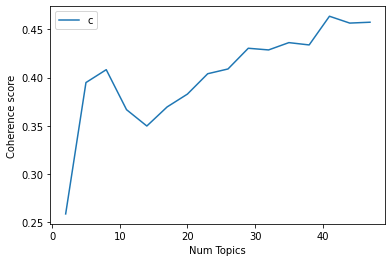

In [10]:
# Show graph
import matplotlib.pyplot as plt
%matplotlib inline
limit=50; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('/Users/SeoyeonHong/Desktop/if_coherence_mallet.pdf',bbox_inches='tight')
plt.show()

In [12]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2586
Num Topics = 5  has Coherence Value of 0.3949
Num Topics = 8  has Coherence Value of 0.4083
Num Topics = 11  has Coherence Value of 0.3667
Num Topics = 14  has Coherence Value of 0.3498
Num Topics = 17  has Coherence Value of 0.3696
Num Topics = 20  has Coherence Value of 0.3829
Num Topics = 23  has Coherence Value of 0.404
Num Topics = 26  has Coherence Value of 0.409
Num Topics = 29  has Coherence Value of 0.4305
Num Topics = 32  has Coherence Value of 0.4287
Num Topics = 35  has Coherence Value of 0.4363
Num Topics = 38  has Coherence Value of 0.4339
Num Topics = 41  has Coherence Value of 0.4637
Num Topics = 44  has Coherence Value of 0.4566
Num Topics = 47  has Coherence Value of 0.4575


In [14]:
# Select the model and print the topics
optimal_model = model_list[13]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(31,
  '0.231*"fast" + 0.088*"data" + 0.069*"show" + 0.068*"fact" + 0.062*"point" + '
  '0.039*"ability" + 0.033*"history" + 0.029*"note" + 0.020*"view" + '
  '0.020*"graph"'),
 (20,
  '0.577*"calorie" + 0.081*"count" + 0.037*"carbs" + 0.031*"counter" + '
  '0.031*"fat" + 0.023*"protein" + 0.023*"ate" + 0.017*"counting" + '
  '0.014*"calculate" + 0.013*"burn"'),
 (30,
  '0.256*"apps" + 0.131*"experience" + 0.101*"download" + 0.084*"ad" + '
  '0.066*"fun" + 0.051*"watch" + 0.044*"apple" + 0.032*"success" + 0.016*"pop" '
  '+ 0.015*"world"'),
 (0,
  '0.222*"people" + 0.145*"support" + 0.081*"issue" + 0.051*"team" + '
  '0.050*"question" + 0.037*"circle" + 0.018*"update" + 0.017*"comment" + '
  '0.016*"alert" + 0.015*"guess"'),
 (25,
  '0.420*"meal" + 0.147*"recipe" + 0.061*"suggestion" + 0.051*"log" + '
  '0.050*"recommendation" + 0.036*"find" + 0.033*"search" + 0.026*"snack" + '
  '0.020*"planning" + 0.017*"input"'),
 (32,
  '0.299*"hour" + 0.167*"version" + 0.132*"fasting" + 0.034*"ke

## (3) Organizing Results

In [15]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts = reviews):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts= reviews)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.0898,"weight, number, stay, shape, method, lose, age...",Weight watchers and Fasting!!! I absolutely lo...
1,1,21.0,0.0528,"thing, phone, window, eating, clock, stop, ala...","Pretty good, but could be awesome I just start..."
2,2,39.0,0.0546,"year, timer, price, payment, check, worth, pro...",Basic Fast Tracking App Been fasting every day...
3,3,32.0,0.0649,"hour, version, fasting, ketosis, fast, customi...",Not For Me This is a nice basic app with some ...
4,4,0.0,0.0829,"people, support, issue, team, question, circle...",Great until Awful This app was wonderful for t...
...,...,...,...,...,...
38078,38078,38.0,0.0427,"workout, home, routine, widget, level, gym, sc...",Great for what I need. Widget would be a nice...
38079,38079,28.0,0.0427,"love, simple, job, record, figure, simplicity,...","Simple and effective, it'll get better with a..."
38080,38080,7.0,0.0411,"feature, user, interface, motivation, function...",Bice app. Can't wait for mire uodates and fea...
38081,38081,6.0,0.0885,"time, start, end, edit, date, forget, frame, d...",Simple and effective. Seems to have difficult...


In [16]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0])], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2003,"people, support, issue, team, question, circle...",This app is not okay. Fasting is a very unhea...
1,0.0,0.1739,"people, support, issue, team, question, circle...",Great app with an excellent library of articl...
2,0.0,0.1697,"people, support, issue, team, question, circle...",Hello everyone! I want to thank the DoFasting...
3,0.0,0.1618,"people, support, issue, team, question, circle...","Advertising to Minors For the past week, my fr..."
4,0.0,0.1555,"people, support, issue, team, question, circle...",There needs to be a health advisory warning p...
...,...,...,...,...
38078,40.0,0.0326,"track, water, intake, food, amount, activity, ...",Very satisfied! It's very good for helps keep ...
38079,40.0,0.0326,"track, water, intake, food, amount, activity, ...",I really love this app that helps me a lot to...
38080,40.0,0.0326,"track, water, intake, food, amount, activity, ...",great way to keep track of your diet plans an...
38081,40.0,0.0326,"track, water, intake, food, amount, activity, ...",Really simple easy to follow & keeps you on t...


In [17]:
# Topic Distribution
topic_numbers = sent_topics_sorteddf_mallet['Topic_Num'].values
topic_numbers = list(dict.fromkeys(topic_numbers))
topic_distribution_df = pd.DataFrame()
topic_distribution_df['Topic_Num'] = topic_numbers
per_topic_keywords = []
topic_counts = []
topic_contribution = []
for item in topic_numbers:
    per_topic_keywords.append(sent_topics_sorteddf_mallet.query('Topic_Num=='+str(item))['Keywords'].iloc[0])
    topic_counts.append((sent_topics_sorteddf_mallet['Topic_Num'] == item).sum())
    # Percentage of Documents for Each Topic
    per_topic_contribution = round((sent_topics_sorteddf_mallet.Topic_Num == item).sum()/len(sent_topics_sorteddf_mallet), 4)
    topic_contribution.append(per_topic_contribution)
topic_distribution_df['Keywords'] = per_topic_keywords
topic_distribution_df['Num_Documents'] = topic_counts
topic_distribution_df['Perc_Documents'] = topic_contribution
#topic_distribution_df.sort_values(by=['Topic_Num'],inplace = True)
#topic_distribution_df.reset_index(drop=True, inplace=True)

topic_distribution_df

,Topic_Num,Keywords,Num_Documents,Perc_Documents
0,0.0,"people, support, issue, team, question, circle...",1802,0.0473
1,1.0,"coach, schedule, pay, offer, benefit, reviewi,...",1280,0.0336
2,2.0,"loss, weight, journey, gain, companion, manage...",1472,0.0387
3,3.0,"subscription, review, month, trial, refund, ch...",845,0.0222
4,4.0,"weight, number, stay, shape, method, lose, age...",931,0.0244
5,5.0,"change, fitness, habit, lifestyle, convenient,...",1314,0.0345
6,6.0,"time, start, end, edit, date, forget, frame, d...",952,0.0250
7,7.0,"feature, user, interface, motivation, function...",1422,0.0373
8,8.0,"work, time, thought, night, load, effect, basi...",1234,0.0324
9,9.0,"track, calorie, tool, helpful, easy, super, ma...",890,0.0234


In [18]:
topic_distribution_df.to_csv('/Users/SeoyeonHong/Desktop/41topics_count_distribution.tsv', sep = '\t')
sent_topics_sorteddf_mallet.to_csv('/Users/SeoyeonHong/Desktop/41topics_representation.tsv', sep = '\t')